<a href="https://colab.research.google.com/github/leydayet/AcademiaIA/blob/main/Taxi_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Taxi Trips



Realizado por:

* Tiara Dominguez Rodriguez
* Leyda Yamilet Estrada Tepec

#Objetivo Principal

Predecir el costo total de un viaje por taxi en la ciudad de Chicago durante dos semnas despues de que hayan terminado los registros que van de las fechas 2023/01/1 al 2023/09/1.

#Información proporcionada por Cliente

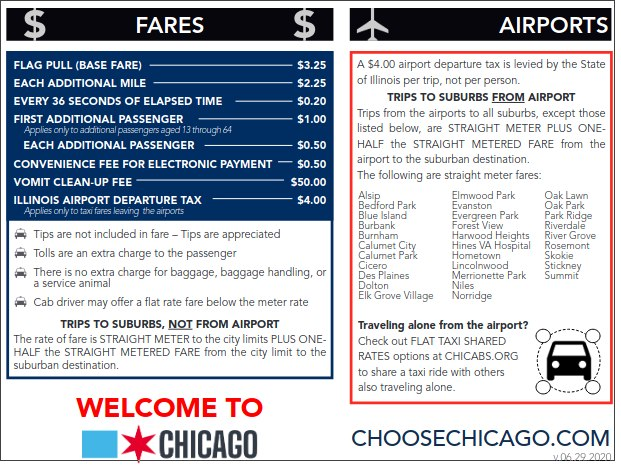

# Dependencias y librerias

In [ ]:
import pandas as pd
import numpy as np

#bibliotecas para  visualización de datos.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import statsmodels.api as sm
from scipy.stats import anderson

#modelos
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Por Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/AI_Academy/Datasets/Taxi_Trips_-_2023.csv')

Mounted at /content/gdrive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834156 entries, 0 to 4337596
Data columns (total 28 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Trip ID                      object        
 1   Taxi ID                      int64         
 2   Trip Start Timestamp         datetime64[ns]
 3   Trip End Timestamp           datetime64[ns]
 4   Trip Seconds                 float64       
 5   Trip Miles                   float64       
 6   Pickup Census Tract          float64       
 7   Dropoff Census Tract         float64       
 8   Pickup Community Area        float64       
 9   Dropoff Community Area       float64       
 10  Fare                         float64       
 11  Tips                         float64       
 12  Tolls                        float64       
 13  Extras                       float64       
 14  Trip Total                   float64       
 15  Payment Type                 object        
 16  

In [ ]:
data.describe()

Taxi ID  Trip Seconds    Trip Miles  Pickup Census Tract  \
count  3.834156e+06  3.767333e+06  3.432605e+06         1.790884e+06   
mean   1.297035e+03  1.215316e+03  6.610847e+00         1.703148e+10   
std    8.185498e+02  1.636142e+03  7.027257e+00         3.680976e+05   
min    0.000000e+00  1.000000e+00  1.000000e-02         1.703101e+10   
25%    5.940000e+02  4.800000e+02  1.210000e+00         1.703108e+10   
50%    1.244000e+03  8.890000e+02  3.280000e+00         1.703132e+10   
75%    1.923000e+03  1.668000e+03  1.161000e+01         1.703184e+10   
max    3.236000e+03  8.638200e+04  9.211000e+02         1.703198e+10   

       Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  \
count          1.790884e+06           3.834156e+06            3.834156e+06   
mean           1.703141e+10           3.291422e+01            2.602082e+01   
std            3.437570e+05           2.507935e+01            2.085980e+01   
min            1.703101e+10           1.000000e+00            1.000000e+00   
25%            1.703108e+10           8.000000e+00            8.000000e+00   
50%            1.703132e+10           3.200000e+01            2.800000e+01   
75%            1.703184e+10           4.700000e+01            3.200000e+01   
max            1.703198e+10           7.700000e+01            7.700000e+01   

               Fare          Tips         Tolls  ...    Trip Total  \
count  3.834069e+06  3.834156e+06  3.834156e+06  ...  3.834156e+06   
mean   2.053111e+01  2.714663e+00  3.905361e-02  ...  2.481842e+01   
std    1.874724e+01  3.828477e+00  1.221221e+01  ...  3.402289e+01   
min    1.000000e-02  0.000000e+00  0.000000e+00  ...  1.000000e-02   
25%    7.750000e+00  0.000000e+00  0.000000e+00  ...  9.750000e+00   
50%    1.313000e+01  1.150000e+00  0.000000e+00  ...  1.575000e+01   
75%    3.200000e+01  4.000000e+00  0.000000e+00  ...  3.660000e+01   
max    8.200000e+03  2.500000e+02  6.466660e+03  ...  9.456400e+03   

       Pickup Centroid Latitude  Pickup Centroid Longitude  \
count              3.834156e+06               3.834156e+06   
mean               4.189894e+01              -8.768855e+01   
std                6.049244e-02               1.048952e-01   
min                4.165192e+01              -8.791362e+01   
25%                4.187887e+01              -8.768383e+01   
50%                4.189251e+01              -8.763331e+01   
75%                4.194423e+01              -8.762519e+01   
max                4.202122e+01              -8.753139e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  Trip Minutes  \
count               3.834156e+06                3.834156e+06  3.834156e+06   
mean                4.189350e+01               -8.766051e+01  1.990226e+01   
std                 5.605120e-02                7.109761e-02  2.716001e+01   
min                 4.166014e+01               -8.791362e+01  0.000000e+00   
25%                 4.187887e+01               -8.766342e+01  7.650000e+00   
50%                 4.189207e+01               -8.763331e+01  1.438333e+01   
75%                 4.192269e+01               -8.762519e+01  2.738333e+01   
max                 4.202122e+01               -8.753490e+01  1.439700e+03   

         Trip Hours  Trip Kilometers    Trip Speed  \
count  3.834156e+06     3.834156e+06  3.770202e+06   
mean   3.317043e-01     9.522856e+00           inf   
std    4.526669e-01     1.118321e+01           NaN   
min    0.000000e+00     0.000000e+00  0.000000e+00   
25%    1.275000e-01     1.448100e+00  1.287200e+01   
50%    2.397222e-01     3.990320e+00  2.018564e+01   
75%    4.563889e-01     1.737720e+01  3.662514e+01   
max    2.399500e+01     1.482050e+03           inf   

       Numero_Semana_Personalizado  
count                 3.834156e+06  
mean                  1.862770e+01  
std                   9.563290e+00  
min                   1.000000e+00  
25%                   1.100000e+01  
50%                   1.900000e+01  
75%                  

In [ ]:
data.shape[0]

3834156

In [ ]:
total_registros = data.shape[0]
print("Cantidad de registros totales:", total_registros)

Cantidad de registros totales: 3834156


In [ ]:
data

Trip ID  \
0        0fca59218b11688279d795c03c4d16f851f13fa0   
1        1e539d6e7501164c6b76b761c3152c235e206d59   
2        2b3c5200439d51f626b60380809bbbcca766a85b   
3        45b2ea39cfff64d61a46ef016e16f8ee74e9ed23   
4        464df6aaaf97ca8745985c2a5b2e481067a2bfb6   
...                                           ...   
4337592  e6ab315e2f20bc99d49ccd40a5d0b7251efc24cb   
4337593  ef9d52205b41f64aa4dc72c2cfa02a3773fe30a7   
4337594  f041306849f597166e95e104f0854cd2aa171af7   
4337595  f651dc1431d3faa17a4e147ba20506274f1eaac4   
4337596  faf85ccdbaedbcee8431bc4070ae2401230e85eb   

                                                   Taxi ID  \
0        e2c349c7cbb608d552aa0b5814031943f13641ef9e50d8...   
1        4ab7a7510c1ebcc9b2e3eaa7bdd6508dbea34da7986aca...   
2        8c76eb82f069c0731a0049cb78898f02cc5ac6990244c9...   
3        a688de71e9eb70603ba839dc7faf949968ae3e971e0575...   
4        8b1a88e5a09cfd55ca72d267f00f56fa50a42aa322bdfe...   
...                                                    ...   
4337592  2780ead18beaa862cc67315ddabd9d1acaadcd6da82eba...   
4337593  6c2706b6e0302b7ac0e10ea44c03a98c0db2151bf5d723...   
4337594  0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...   
4337595  97aa8cc2c0691d3c3b616f9aaad1722d1b46eb1da0c217...   
4337596  c8c3f1713dadc77d30d959755c933092b402d0c3cef08e...   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
0        01/01/2023 12:00:00 AM  01/01/2023 12:15:00 AM        1037.0   
1        01/01/2023 12:00:00 AM  01/01/2023 12:15:00 AM        1341.0   
2        01/01/2023 12:00:00 AM  01/01/2023 12:15:00 AM         844.0   
3        01/01/2023 12:00:00 AM  01/01/2023 12:00:00 AM         361.0   
4        01/01/2023 12:00:00 AM  01/01/2023 12:15:00 AM         704.0   
...                         ...                     ...           ...   
4337592  09/01/2023 12:00:00 AM  09/01/2023 12:30:00 AM        1703.0   
4337593  09/01/2023 12:00:00 AM  09/01/2023 12:00:00 AM         389.0   
4337594  09/01/2023 12:00:00 AM  09/01/2023 12:00:00 AM         180.0   
4337595  09/01/2023 12:00:00 AM  09/01/2023 12:30:00 AM        2017.0   
4337596  09/01/2023 12:00:00 AM  09/01/2023 12:15:00 AM        1389.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
0              4.82                  NaN                   NaN   
1             16.63                  NaN                   NaN   
2              3.84                  NaN                   NaN   
3              0.63                  NaN                   NaN   
4              0.99                  NaN                   NaN   
...             ...                  ...                   ...   
4337592        7.14                  NaN                   NaN   
4337593        0.98                  NaN                   NaN   
4337594        0.00                  NaN                   NaN   
4337595       18.96                  NaN                   NaN   
4337596       13.69                  NaN                   NaN   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
0                          6.0                    32.0  ...     0.0   
1                         76.0                     8.0  ...     6.0   
2                         24.0                     8.0  ...     0.0   
3                         32.0                    32.0  ...     1.0   
4                         14.0                    14.0  ...     0.0   
...                        ...                     ...  ...     ...   
4337592                    3.0                    15.0  ...     0.0   
4337593                    8.0                     8.0  ...     1.0   
4337594                    8.0                    32.0  ...     1.0   
4337595                   76.0                    33.0  ...     4.0   
4337596                   76.0                     6.0  ...     5.0   

         Trip Total  Payment Type                       Company  \
0             19.50   Credit Card  Taxicab Insurance Agency Llc   
1  

#Analisis exploratorio

In [ ]:
#inicio de viaje esté en formato de fecha y hora
data['Trip Start Timestamp'] = pd.to_datetime(data['Trip Start Timestamp'])

#fecha de inicio (la fecha mínima en la columna 'Trip Start Timestamp')
fecha_inicio = data['Trip Start Timestamp'].min()

#final de viaje en formato de fecha y hora
data['Trip End Timestamp'] = pd.to_datetime(data['Trip End Timestamp'])

#fecha final (la fecha máxima en la columna 'Trip End Timestamp')
fecha_final = data['Trip End Timestamp'].max()

print(f'Fecha de inicio: {fecha_inicio}')
print(f'Fecha final: {fecha_final}')


Fecha de inicio: 2023-01-01 01:00:00
Fecha final: 2023-09-01 12:45:00


In [ ]:
data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Trip Minutes', 'Trip Hours',
       'Trip Kilometers', 'Trip Speed'],
      dtype='object')

In [ ]:
# agrupacion por ID del taxista para la cantidad de registros por taxista
viajes_por_taxista = data['Taxi ID'].value_counts()

# promedio de viajes por taxista
promedio_viajes = viajes_por_taxista.mean()

print(f"El promedio de viajes por taxista es: {promedio_viajes:.2f}")


El promedio de viajes por taxista es: 1284.90


In [ ]:
import pandas as pd
# Agrupacion de los datos por el ID del taxista y la cantidad de registros por taxista
viajes_por_taxista = data.groupby('Taxi ID').size().reset_index(name='Cantidad_de_Viajes')

#promedio de viajes por taxista
promedio_viajes = viajes_por_taxista['Cantidad_de_Viajes'].mean()

print(f"El promedio total de viajes por taxista es: {promedio_viajes:.2f}")
print(viajes_por_taxista)


El promedio total de viajes por taxista es: 1284.90
      Taxi ID  Cantidad_de_Viajes
0           0                 861
1           1                1566
2           2                3185
3           3                 736
4           4                1910
...       ...                 ...
2979     3232                   3
2980     3233                   4
2981     3234                   7
2982     3235                   2
2983     3236                   1

[2984 rows x 2 columns]


In [ ]:
#Viajes por taxista por la cantidad de viajes en orden descendente
viajes_por_taxista = viajes_por_taxista.sort_values(by='Cantidad_de_Viajes', ascending=False)

# Los 10 primeros con los promedios más altos
top_10_mas_altos = viajes_por_taxista.head(10)

# Los 10 primeros con los promedios más bajos
top_10_mas_bajos = viajes_por_taxista.tail(10)

print("Los 10 primeros con los promedios más altos:")
print(top_10_mas_altos)

print("\nLos 10 primeros con los promedios más bajos:")
print(top_10_mas_bajos)


Los 10 primeros con los promedios más altos:
      Taxi ID  Cantidad_de_Viajes
469       470                6807
232       232                5731
201       201                5230
472       473                5056
1240     1245                4975
1005     1010                4937
552       554                4542
113       113                4516
977       982                4338
634       636                4333

Los 10 primeros con los promedios más bajos:
      Taxi ID  Cantidad_de_Viajes
2452     2540                   1
2366     2403                   1
2898     3100                   1
2890     3086                   1
2884     3069                   1
2956     3206                   1
2139     2150                   1
2363     2398                   1
2352     2375                   1
2983     3236                   1


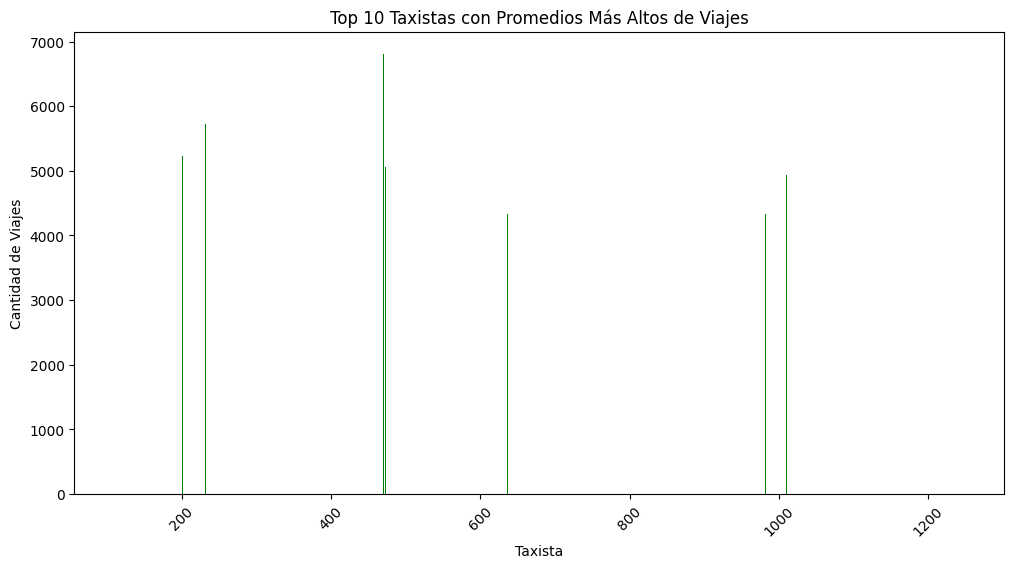

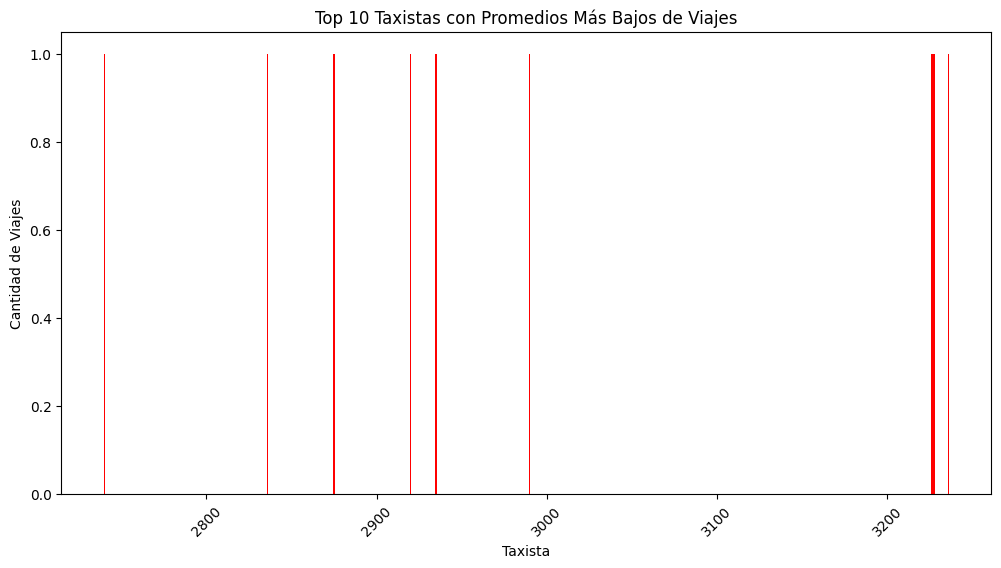

In [ ]:
# DataFrame 'viajes por taxista' por la cantidad de viajes en orden descendente
viajes_por_taxista = viajes_por_taxista.sort_values(by='Cantidad_de_Viajes', ascending=False)

# Los 10 primeros con los promedios más altos
top_10_mas_altos = viajes_por_taxista.head(10)

# Los 10 primeros con los promedios más bajos
top_10_mas_bajos = viajes_por_taxista.tail(10)

#gráfico de barras para los 10 primeros con promedios más altos
plt.figure(figsize=(12, 6))
plt.bar(top_10_mas_altos['Taxi ID'], top_10_mas_altos['Cantidad_de_Viajes'], color='green')
plt.title('Top 10 Taxistas con Promedios Más Altos de Viajes')
plt.xlabel('Taxista')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

#gráfico de barras para los 10 primeros con promedios más bajos
plt.figure(figsize=(12, 6))
plt.bar(top_10_mas_bajos['Taxi ID'], top_10_mas_bajos['Cantidad_de_Viajes'], color='red')
plt.title('Top 10 Taxistas con Promedios Más Bajos de Viajes')
plt.xlabel('Taxista')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Trip_mi=data['Payment Type'].value_counts()
Trip_mi

Credit Card    1487611
Cash           1120492
Mobile          635436
Prcard          401774
Unknown         186630
No Charge         1250
Dispute            963
Name: Payment Type, dtype: int64

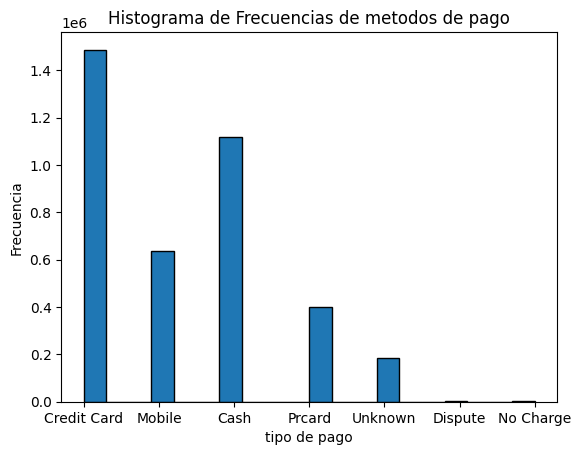

In [ ]:
plt.hist(data['Payment Type'], bins=20, edgecolor='k')
plt.xlabel('tipo de pago')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de metodos de pago')
plt.show()

In [ ]:
company_f=data['Company'].value_counts()
company_f

Taxi Affiliation Services               749683
Flash Cab                               731887
Sun Taxi                                425312
City Service                            402924
Taxicab Insurance Agency Llc            359892
Chicago Independents                    219300
5 Star Taxi                             164100
Globe Taxi                              140525
Medallion Leasin                        136101
Blue Ribbon Taxi Association            120583
Star North Taxi Management Llc           95655
Taxicab Insurance Agency, LLC            78304
Choice Taxi Association                  62550
U Taxicab                                24997
Top Cab Affiliation                      23488
Chicago City Taxi Association            19717
Choice Taxi Association Inc              16912
Koam Taxi Association                    11894
Patriot Taxi Dba Peace Taxi Associat     11626
Chicago Taxicab                           9584
Top Cab                                   7383
312 Medallion

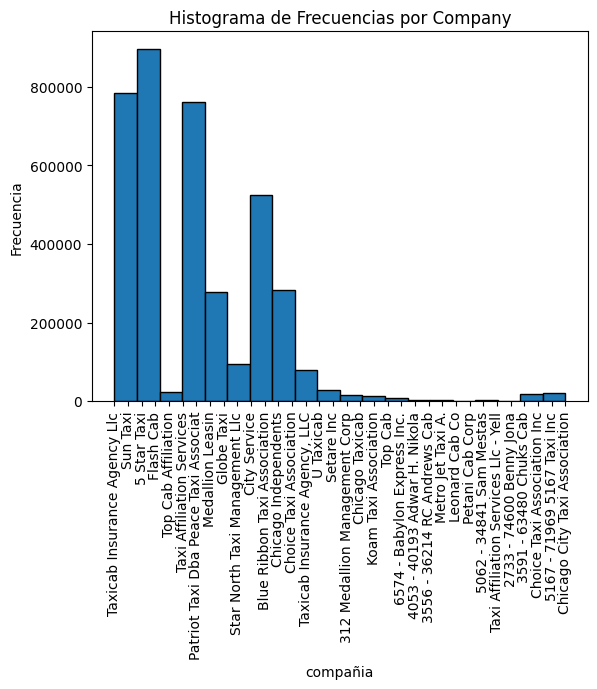

In [ ]:
plt.hist(data['Company'], bins=20, edgecolor='k')
plt.xlabel('compañia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias por Company')
plt.xticks(rotation=90)
plt.show()

In [ ]:
area_f=data['Pickup Community Area'].value_counts()
area_f

8.0     922891
32.0    689975
76.0    652662
28.0    385491
33.0    158078
         ...  
9.0        810
20.0       779
63.0       733
74.0       536
18.0       317
Name: Pickup Community Area, Length: 77, dtype: int64

In [ ]:
area_f=data['Dropoff Community Area'].value_counts()
area_f

8.0     979972
32.0    674538
28.0    392302
76.0    230913
6.0     194701
         ...  
52.0      1301
55.0      1001
47.0       998
18.0       987
74.0       605
Name: Dropoff Community Area, Length: 77, dtype: int64

In [ ]:
def unique_value_counts(data):
    unique_counts = []
    for column in data.columns:
        variable_name = column
        unique_count = len(data[column].unique())
        unique_counts.append([variable_name, unique_count])

    result_df = pd.DataFrame(unique_counts, columns=['Variable', 'Unique Values'])
    return result_df

In [ ]:
result = unique_value_counts(data)
result

Variable  Unique Values
0                      Trip ID        3834156
1                      Taxi ID           2984
2         Trip Start Timestamp          11665
3           Trip End Timestamp          11675
4                 Trip Seconds          11696
5                   Trip Miles           4835
6          Pickup Census Tract            465
7         Dropoff Census Tract            534
8        Pickup Community Area             77
9       Dropoff Community Area             77
10                        Fare           6405
11                        Tips           2405
12                       Tolls            211
13                      Extras           1166
14                  Trip Total           9555
15                Payment Type              7
16                     Company             34
17    Pickup Centroid Latitude            540
18   Pickup Centroid Longitude            540
19    Pickup Centroid Location            541
20   Dropoff Centroid Latitude            609
21  Dropoff Centroid Longitude            609
22  Dropoff Centroid  Location            610
23                Trip Minutes          11696
24                  Trip Hours          11696
25             Trip Kilometers           4835
26                  Trip Speed        1049434

In [ ]:
data.describe()

Taxi ID  Trip Seconds    Trip Miles  Pickup Census Tract  \
count  3.834156e+06  3.767333e+06  3.432605e+06         1.790884e+06   
mean   1.297035e+03  1.215316e+03  6.610847e+00         1.703148e+10   
std    8.185498e+02  1.636142e+03  7.027257e+00         3.680976e+05   
min    0.000000e+00  1.000000e+00  1.000000e-02         1.703101e+10   
25%    5.940000e+02  4.800000e+02  1.210000e+00         1.703108e+10   
50%    1.244000e+03  8.890000e+02  3.280000e+00         1.703132e+10   
75%    1.923000e+03  1.668000e+03  1.161000e+01         1.703184e+10   
max    3.236000e+03  8.638200e+04  9.211000e+02         1.703198e+10   

       Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  \
count          1.790884e+06           3.834156e+06            3.834156e+06   
mean           1.703141e+10           3.291422e+01            2.602082e+01   
std            3.437570e+05           2.507935e+01            2.085980e+01   
min            1.703101e+10           1.000000e+00            1.000000e+00   
25%            1.703108e+10           8.000000e+00            8.000000e+00   
50%            1.703132e+10           3.200000e+01            2.800000e+01   
75%            1.703184e+10           4.700000e+01            3.200000e+01   
max            1.703198e+10           7.700000e+01            7.700000e+01   

               Fare          Tips         Tolls        Extras    Trip Total  \
count  3.834069e+06  3.834156e+06  3.834156e+06  3.834156e+06  3.834156e+06   
mean   2.053111e+01  2.714663e+00  3.905361e-02  1.379133e+00  2.481842e+01   
std    1.874724e+01  3.828477e+00  1.221221e+01  1.836634e+01  3.402289e+01   
min    1.000000e-02  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e-02   
25%    7.750000e+00  0.000000e+00  0.000000e+00  0.000000e+00  9.750000e+00   
50%    1.313000e+01  1.150000e+00  0.000000e+00  0.000000e+00  1.575000e+01   
75%    3.200000e+01  4.000000e+00  0.000000e+00  1.000000e+00  3.660000e+01   
max    8.200000e+03  2.500000e+02  6.466660e+03  9.446650e+03  9.456400e+03   

       Pickup Centroid Latitude  Pickup Centroid Longitude  \
count              3.834156e+06               3.834156e+06   
mean               4.189894e+01              -8.768855e+01   
std                6.049244e-02               1.048952e-01   
min                4.165192e+01              -8.791362e+01   
25%                4.187887e+01              -8.768383e+01   
50%                4.189251e+01              -8.763331e+01   
75%                4.194423e+01              -8.762519e+01   
max                4.202122e+01              -8.753139e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  Trip Minutes  \
count               3.834156e+06                3.834156e+06  3.834156e+06   
mean                4.189350e+01               -8.766051e+01  1.990226e+01   
std                 5.605120e-02                7.109761e-02  2.716001e+01   
min                 4.166014e+01               -8.791362e+01  0.000000e+00   
25%                 4.187887e+01               -8.766342e+01  7.650000e+00   
50%                 4.189207e+01               -8.763331e+01  1.438333e+01   
75%                 4.192269e+01               -8.762519e+01  2.738333e+01   
max                 4.202122e+01               -8.753490e+01  1.439700e+03   

         Trip Hours  Trip Kilometers    Trip Speed  
count  3.834156e+06     3.834156e+06  3.770202e+06  
mean   3.317043e-01     9.522856e+00           inf  
std    4.526669e-01     1.118321e+01           NaN  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    1.275000e-01     1.448100e+00  1.287200e+01  
50%    2.397222e-01     3.990320e+00  2.018564e+01  
75%    4.563889e-01     1.737720e+01  3.662514e+01  
max    2.399500e+01     1.482050e+03           inf

In [ ]:
#numeric_variables = data.select_dtypes(include=['number'])
numeric_variables= ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras']
numeric_data = data[numeric_variables]

#matriz de gráficos de dispersión con Seaborn
sns.pairplot(data=numeric_data, kind='scatter')
plt.show()





In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".4g");
plt.show()

In [ ]:
#correlación de valores nulos con otras columnas
#1 correlacionados
#cercanos a -1 anticorrelacion
#0 cercana  correlacion baja
msno.heatmap(data)

Gracias a las correlaciones entre variables y el apoyo visual del mapa de calor, nos percatamos de la correlación positiva que existe entre "Trip Total" y "Fare" (0.69), así como "Trip Total" con "Trip Miles" (0.49). De aquí se puede deducir que, en efecto, no podemos contar con valores en 0 en algunas de estas variables, por lo que se procede a reconocer a nuestros valores 0's como outliers o NA's para posteriormente ser tratados como tal.

In [ ]:
# Filtrar columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Iterar a través de las columnas numéricas
for column in numeric_cols:
    # Mostrar título para la variable actual
    print(f"\nAnálisis de normalidad para la variable '{column}':")

    # Configurar un espacio de gráfico de 2x2
    plt.figure(figsize=(12, 8))

    # Histograma
    plt.subplot(2, 2, 1)
    plt.hist(data[column], bins=20, color='blue', alpha=0.5)
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

    # Gráfico QQ
    import pylab
    plt.subplot(2, 2, 2)
    stats.probplot(data[column], dist="norm", plot=pylab)
    plt.title(f"Gráfico QQ de {column}")

    # # Boxplot
    # plt.figure(figsize = (5,5))
    # plt.boxplot(data[column])
    # plt.title(f"Boxplot de {column}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data[column], 'norm')
    print("\nPrueba de Kolmogorov-Smirnov:")
    print("Estadística de prueba:", ks_test.statistic)
    print("Valor p:", ks_test.pvalue)
    if ks_test.pvalue > 0.05:
        print(f"Los datos de {column} se distribuyen normalmente según la prueba de Kolmogorov-Smirnov.")
    else:
        print(f"Los datos de {column} no se distribuyen normalmente según la prueba de Kolmogorov-Smirnov.")

    # Prueba de Anderson
    anderson_test = anderson(data[column], dist='norm')
    print("\nPrueba de Anderson:")
    print("Estadística de prueba:", anderson_test.statistic)
    print("Valores críticos:", anderson_test.critical_values)
    if anderson_test.statistic < anderson_test.critical_values[2]:
        print(f"Los datos de {column} se distribuyen normalmente según la prueba de Anderson.")
    else:
        print(f"Los datos de {column} no se distribuyen normalmente según la prueba de Anderson.")

    # Mostrar todos los gráficos y análisis
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables
variables_a_analizar = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total','Pickup Centroid Longitude','Pickup Centroid Latitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude']

#subtramas para los gráficos de caja
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
fig.suptitle('Análisis de Outliers', fontsize=16)

#bucle para generar los boxplots para cada variable
for i, variable in enumerate(variables_a_analizar):
    row = i // 4  # Fila de la subtrama
    col = i % 4   # Columna de la subtrama

    sns.boxplot(x=data[variable], ax=axes[row, col])
    axes[row, col].set_title(f'{variable}')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
data.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables para analizar
variables = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total',
             'Pickup Centroid Longitude', 'Pickup Centroid Latitude',
             'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']

# Definir un umbral visual para valores atípicos
umbral_superior = 200

# Iterar a través de cada variable y generar los gráficos
for variable in variables:
    plt.figure(figsize=(8, 6))

    # Crear un gráfico de dispersión
    plt.scatter(data[variable], data[variable], alpha=0.5)  # Usamos la misma variable para comparar
    plt.title(f'Gráfico de Dispersión para {variable}')
    plt.xlabel(variable)
    plt.ylabel(variable)

    # Resaltar valores atípicos
    valores_atipicos = data[data[variable] > umbral_superior]
    plt.scatter(valores_atipicos[variable], valores_atipicos[variable], color='red', label='Valores Atípicos')
    plt.legend()

    plt.show()

    # Crear un histograma
    plt.figure(figsize=(8, 6))
    plt.hist(data[variable], bins=20)  # Puedes ajustar el número de bins según tus necesidades
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Resaltar barras de valores atípicos
    plt.axvline(umbral_superior, color='red', linestyle='--', label='Umbral Atípico')
    plt.legend()

    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Lista de variables para analizar
variables = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total',
             'Pickup Centroid Longitude', 'Pickup Centroid Latitude',
             'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']

# Calcular el IQR y el Z-Score para cada variable
iqr_values = {}
z_score_values = {}

for variable in variables:
    # IQR
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    iqr_values[variable] = IQR

    # Z-Score
    z_scores = np.abs(stats.zscore(data[variable]))
    z_score_values[variable] = z_scores

# Crear DataFrames para los resultados
iqr_df = pd.DataFrame(iqr_values, index=['IQR']).T
z_score_df = pd.DataFrame(z_score_values, index=['Z-Score']).T

# Mostrar los resultados ordenados
print("Resultados del método del Rango Intercuartil (IQR):")
print(iqr_df)

print("\nResultados del método del Z-Score:")
print(z_score_df)


#Analisis vibariado

#Ingenieria de variables

##Transformaciones para el dataset

In [ ]:
data['Trip Start Timestamp'] = pd.to_datetime(data['Trip Start Timestamp'], format='%m/%d/%Y %H:%M:%S %p')
data['Trip End Timestamp'] = pd.to_datetime(data['Trip End Timestamp'], format='%m/%d/%Y %H:%M:%S %p')

In [ ]:
data['Trip Minutes'] = data['Trip Seconds'] / 60

data['Trip Hours'] = data['Trip Minutes'] / 60

data['Trip Kilometers'] = data['Trip Miles'] * 1.609

data['Trip Speed'] = data['Trip Kilometers'] / data['Trip Hours']

In [ ]:
# Crear un mapeo de valores únicos a enteros únicos para 'Taxi ID'
unique_taxi_ids = data['Taxi ID'].unique()
id_mapping = {taxi_id: i for i, taxi_id in enumerate(unique_taxi_ids)}

# Aplicardo la transformación al DataFrame
data['Taxi ID'] = data['Taxi ID'].map(id_mapping)

In [ ]:
data['Taxi ID'].count()#numero de taxistas unicos

4337597

In [ ]:
cantidad_ids_unicos = data['Taxi ID'].nunique()
print(f'Cantidad de IDs únicos en la columna "Taxi ID": {cantidad_ids_unicos}')

Cantidad de IDs únicos en la columna "Taxi ID": 3237


In [ ]:
data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Trip Minutes', 'Trip Hours',
       'Trip Kilometers', 'Trip Speed'],
      dtype='object')

## valores atipicos

In [ ]:
#cantidad de valores faltantes por columna
valores_faltantes_por_columna = data.isnull().sum()

# Muestra de la cantidad de valores faltantes por columna
print(valores_faltantes_por_columna)

Trip ID                             0
Taxi ID                             0
Trip Start Timestamp                0
Trip End Timestamp                 50
Trip Seconds                      818
Trip Miles                         14
Pickup Census Tract           2439216
Dropoff Census Tract          2479891
Pickup Community Area          184090
Dropoff Community Area         417783
Fare                             6793
Tips                             6793
Tolls                            6793
Extras                           6793
Trip Total                       6793
Payment Type                        0
Company                             0
Pickup Centroid Latitude       182496
Pickup Centroid Longitude      182496
Pickup Centroid Location       182496
Dropoff Centroid Latitude      391331
Dropoff Centroid Longitude     391331
Dropoff Centroid  Location     391331
Trip Minutes                      818
Trip Hours                        818
Trip Kilometers                    14
Trip Speed  

Se convierten ceros a NAN para aquellas columnas específicas donde no consideramos aceptable el mantener 0's:

In [ ]:
#Esto es solo como ejemplo aislado para corroborar
cantidad_de_ceros = (data['Trip Total'] == 0).sum()
cantidad_de_ceros

3359

In [ ]:
#Porcentaje de datos faltantes por variable antes de transformación
na = pd.DataFrame(data.isna().sum(), columns = ['na'])
na = na[na.na >0]
na['%'] = (na.na/len(data))*100
na

na          %
Trip End Timestamp               50   0.001153
Trip Seconds                    818   0.018858
Trip Miles                       14   0.000323
Pickup Census Tract         2439216  56.234270
Dropoff Census Tract        2479891  57.172001
Pickup Community Area        184090   4.244055
Dropoff Community Area       417783   9.631669
Fare                           6793   0.156607
Tips                           6793   0.156607
Tolls                          6793   0.156607
Extras                         6793   0.156607
Trip Total                     6793   0.156607
Pickup Centroid Latitude     182496   4.207306
Pickup Centroid Longitude    182496   4.207306
Pickup Centroid Location     182496   4.207306
Dropoff Centroid Latitude    391331   9.021839
Dropoff Centroid Longitude   391331   9.021839
Dropoff Centroid  Location   391331   9.021839
Trip Minutes                    818   0.018858
Trip Hours                      818   0.018858
Trip Kilometers                  14   0.000323
Trip Speed                    83592   1.927150

objetivo es predecir el "trip total", es importante considerar cómo manejar los valores faltantes en las variables relevantes para el análisis.

Opciones:

* Eliminar las filas con valores faltantes si la cantidad de valores faltantes es pequeña y no afecta significativamente al conjunto de datos.
* Imputar los valores faltantes utilizando técnicas de imputación, como el promedio, la mediana o modelos de imputación más avanzados, si las variables con valores faltantes son importantes para el modelo de predicción.
* Examinar más detenidamente la calidad de los datos y, si es posible, corregir los valores faltantes a partir de fuentes adicionales o registros duplicados si están disponibles.

In [ ]:
# Lista de columnas a procesar para reducir los NAN
columnas_a_procesar = ['Trip Seconds', 'Trip Miles', 'Fare', 'Trip Total']

# Iteramos a través de cada fila y columna del DataFrame
for columna in columnas_a_procesar:
    for indice, valor in enumerate(data[columna]):
        if valor == 0:
            data.at[indice, columna] = np.nan

In [ ]:
#Porcentaje de datos faltantes despues de quitar los 0 en las varibales'Trip Seconds', 'Trip Miles', 'Fare', 'Trip Total' y poner NAN
#Trip Seconds'----- %1.989766
#'Trip Miles'------%10.633537
#'Fare' ---------- % 0.079814
#'Trip Total'------ % 0.07744

na = pd.DataFrame(data.isna().sum(), columns = ['na'])
na = na[na.na >0]
na['%'] = (na.na/len(data))*100
na

na          %
Trip End Timestamp               50   0.001153
Trip Seconds                  87126   2.008624
Trip Miles                   461254  10.633860
Pickup Census Tract         2439216  56.234270
Dropoff Census Tract        2479891  57.172001
Pickup Community Area        184090   4.244055
Dropoff Community Area       417783   9.631669
Fare                          10255   0.236421
Tips                           6793   0.156607
Tolls                          6793   0.156607
Extras                         6793   0.156607
Trip Total                    10152   0.234047
Pickup Centroid Latitude     182496   4.207306
Pickup Centroid Longitude    182496   4.207306
Pickup Centroid Location     182496   4.207306
Dropoff Centroid Latitude    391331   9.021839
Dropoff Centroid Longitude   391331   9.021839
Dropoff Centroid  Location   391331   9.021839
Trip Minutes                    818   0.018858
Trip Hours                      818   0.018858
Trip Kilometers                  14   0.000323
Trip Speed                    83592   1.927150

## Manejo de valores faltantes (NAN)
mputar los valores faltantes (rellenarlos con valores estimados) o eliminar las filas o columnas con valores faltantes, según la cantidad y la importancia de los datos faltantes.

Analizando la existencia de valores nulos junto a nuestro mapa de calor, concluimos que era viable eliminar los NA's de las siguientes columnas debido al porcentaje de los mismos, así como la relación con la variable más importante para poder crear nuestra variable objetivo a largo plazo.

In [ ]:
data_sin_na = data

In [ ]:
from pandas.core.internals.blocks import missing
data = data.dropna (subset=['Taxi ID','Trip End Timestamp','Pickup Centroid Latitude','Pickup Centroid Longitude','Pickup Centroid Location',
                           'Dropoff Centroid Latitude','Dropoff Centroid Longitude','Dropoff Centroid  Location', 'Pickup Community Area',
                      'Dropoff Community Area', 'Tips', 'Tolls', 'Trip Minutes', 'Trip Hours', 'Trip Kilometers','Trip Total'], how='any')


## Analisis por percentil

**Trip Seconds**

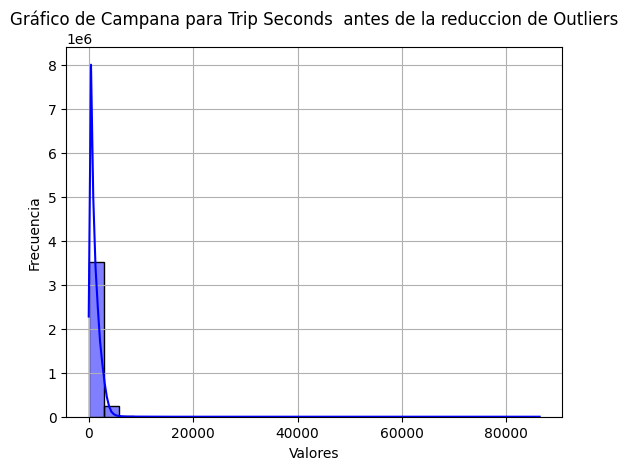

In [ ]:
#histograma para visualizar la distribución
sns.histplot(data['Trip Seconds'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Seconds  antes de la reduccion de Outliers')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
data.describe()

Taxi ID  Trip Seconds    Trip Miles  Pickup Census Tract  \
count  3.834156e+06  3.767333e+06  3.432605e+06         1.790884e+06   
mean   1.297035e+03  1.215316e+03  6.610847e+00         1.703148e+10   
std    8.185498e+02  1.636142e+03  7.027257e+00         3.680976e+05   
min    0.000000e+00  1.000000e+00  1.000000e-02         1.703101e+10   
25%    5.940000e+02  4.800000e+02  1.210000e+00         1.703108e+10   
50%    1.244000e+03  8.890000e+02  3.280000e+00         1.703132e+10   
75%    1.923000e+03  1.668000e+03  1.161000e+01         1.703184e+10   
max    3.236000e+03  8.638200e+04  9.211000e+02         1.703198e+10   

       Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  \
count          1.790884e+06           3.834156e+06            3.834156e+06   
mean           1.703141e+10           3.291422e+01            2.602082e+01   
std            3.437570e+05           2.507935e+01            2.085980e+01   
min            1.703101e+10           1.000000e+00            1.000000e+00   
25%            1.703108e+10           8.000000e+00            8.000000e+00   
50%            1.703132e+10           3.200000e+01            2.800000e+01   
75%            1.703184e+10           4.700000e+01            3.200000e+01   
max            1.703198e+10           7.700000e+01            7.700000e+01   

               Fare          Tips         Tolls        Extras    Trip Total  \
count  3.834069e+06  3.834156e+06  3.834156e+06  3.834156e+06  3.834156e+06   
mean   2.053111e+01  2.714663e+00  3.905361e-02  1.379133e+00  2.481842e+01   
std    1.874724e+01  3.828477e+00  1.221221e+01  1.836634e+01  3.402289e+01   
min    1.000000e-02  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e-02   
25%    7.750000e+00  0.000000e+00  0.000000e+00  0.000000e+00  9.750000e+00   
50%    1.313000e+01  1.150000e+00  0.000000e+00  0.000000e+00  1.575000e+01   
75%    3.200000e+01  4.000000e+00  0.000000e+00  1.000000e+00  3.660000e+01   
max    8.200000e+03  2.500000e+02  6.466660e+03  9.446650e+03  9.456400e+03   

       Pickup Centroid Latitude  Pickup Centroid Longitude  \
count              3.834156e+06               3.834156e+06   
mean               4.189894e+01              -8.768855e+01   
std                6.049244e-02               1.048952e-01   
min                4.165192e+01              -8.791362e+01   
25%                4.187887e+01              -8.768383e+01   
50%                4.189251e+01              -8.763331e+01   
75%                4.194423e+01              -8.762519e+01   
max                4.202122e+01              -8.753139e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  Trip Minutes  \
count               3.834156e+06                3.834156e+06  3.834156e+06   
mean                4.189350e+01               -8.766051e+01  1.990226e+01   
std                 5.605120e-02                7.109761e-02  2.716001e+01   
min                 4.166014e+01               -8.791362e+01  0.000000e+00   
25%                 4.187887e+01               -8.766342e+01  7.650000e+00   
50%                 4.189207e+01               -8.763331e+01  1.438333e+01   
75%                 4.192269e+01               -8.762519e+01  2.738333e+01   
max                 4.202122e+01               -8.753490e+01  1.439700e+03   

         Trip Hours  Trip Kilometers    Trip Speed  
count  3.834156e+06     3.834156e+06  3.770202e+06  
mean   3.317043e-01     9.522856e+00           inf  
std    4.526669e-01     1.118321e+01           NaN  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    1.275000e-01     1.448100e+00  1.287200e+01  
50%    2.397222e-01     3.990320e+00  2.018564e+01  
75%    4.563889e-01     1.737720e+01  3.662514e+01  
max    2.399500e+01     1.482050e+03           inf

In [ ]:
# Obtener el percentil 98 de Trip Seconds
percentil98_tripseconds = data['Trip Seconds'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Trip Seconds'] if x <= percentil98_tripseconds]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Trip Seconds'])) * 100

# Imprimir
print(percentil98_tripseconds)
porcentaje98

3725.0


96.29383885267058

In [ ]:
# Calcular el percentil 99 para una columna específica
percentil99_tripseconds = data['Trip Seconds'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Trip Seconds'] if x <= percentil99_tripseconds]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje99 = (len(datos_debajo99) / len(data['Trip Seconds'])) * 100

# Imprimir
print(percentil99_tripseconds)
porcentaje99

4254.0


97.2746544480715

In [ ]:
 # Calcular el percentil 100 para una columna específica
percentil100_tripseconds = data['Trip Seconds'].quantile(1)

# Imprimir
print(percentil100_tripseconds)

86382.0


Gracias al análisis por los últimos tres percentiles de la variable, optamos por realizar el corte en el percentil 99.

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Trip Seconds'] <= percentil99_tripseconds]

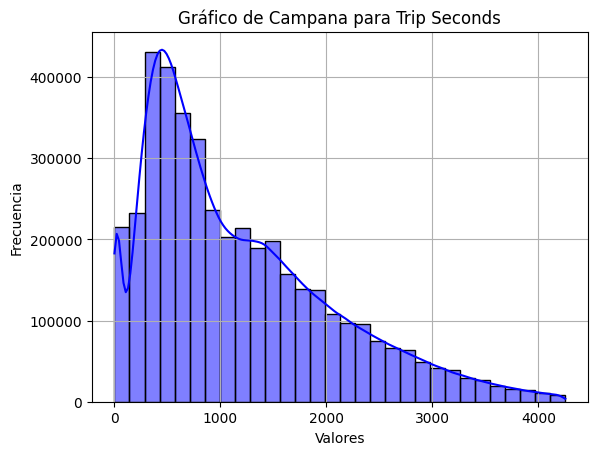

In [ ]:
# Crea un histograma de tus datos para visualizar la distribución
sns.histplot(data_sin_na['Trip Seconds'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Seconds')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

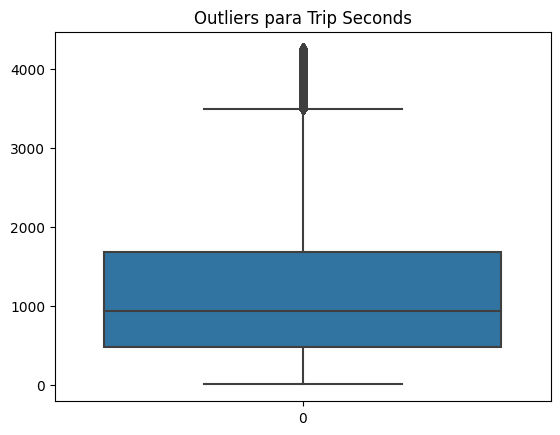

In [ ]:
# despues de imputación
sns.boxplot(data_sin_na['Trip Seconds'])
plt.title('Outliers para Trip Seconds')
plt.show()

****

**Trip Miles**

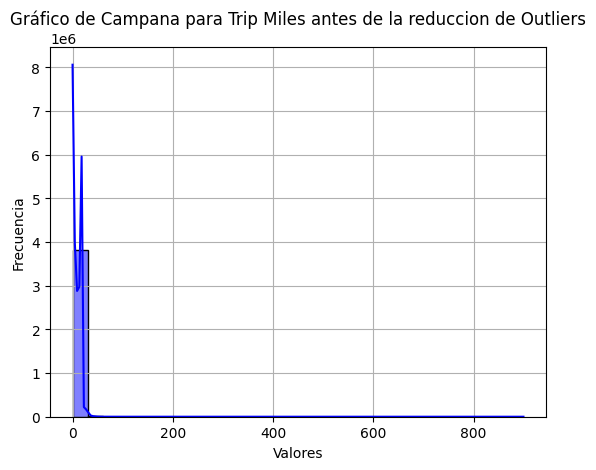

In [ ]:
#histograma para visualizar la distribución
sns.histplot(data_sin_na['Trip Miles'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Miles antes de la reduccion de Outliers' )
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Obtener el percentil 98 de Trip Miles
percentil98_tripmiles = data['Trip Miles'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Trip Miles'] if x <= percentil98_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Trip Miles'])) * 100

# Imprimir
print(percentil98_tripmiles)
porcentaje98

19.94


87.73722300292425

In [ ]:
# Obtener el percentil 98 de Trip Miles
percentil99_tripmiles = data['Trip Miles'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Trip Miles'] if x <= percentil99_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo99) / len(data['Trip Miles'])) * 100

# Imprimir
print(percentil99_tripmiles)
porcentaje98


22.02


88.632100519645

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Trip Miles'] <= percentil99_tripmiles]

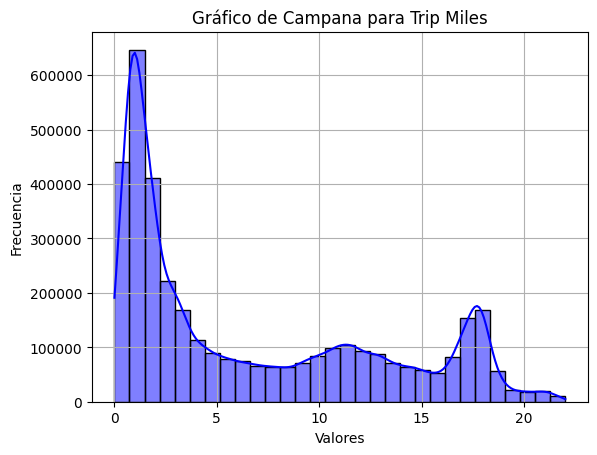

In [ ]:
#histograma para visualizar la distribución
sns.histplot(data_sin_na['Trip Miles'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Miles')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

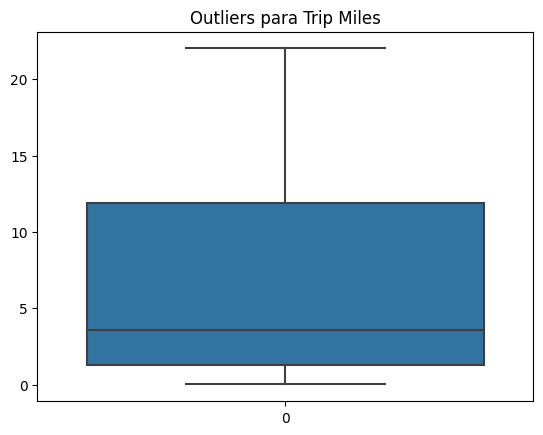

In [ ]:
# despues de la imputacion
sns.boxplot(data_sin_na['Trip Miles'])
plt.title('Outliers para Trip Miles')
plt.show()

**Fare**

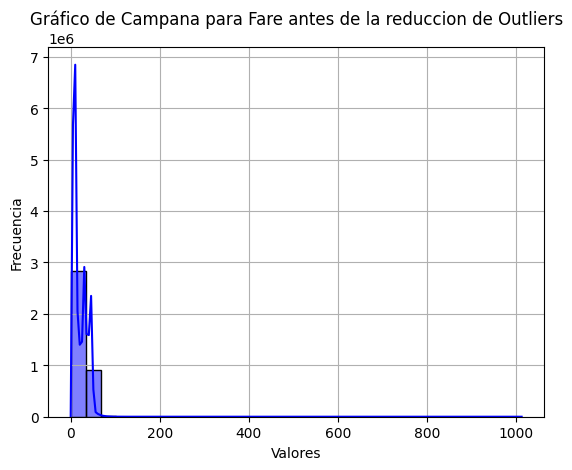

In [ ]:
#histograma de datos para visualizar la distribución
sns.histplot(data_sin_na['Fare'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Fare antes de la reduccion de Outliers' )
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Obtener el percentil 98 de Fare
percentil98_tripmiles = data['Fare'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Fare'] if x <= percentil98_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Fare'])) * 100

# Imprimir
print(percentil98_tripmiles)
porcentaje98

55.0


98.070057660669

In [ ]:
# Obtener el percentil 98 de fare
percentil99_tripmiles = data['Fare'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Fare'] if x <= percentil99_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo99) / len(data['Fare'])) * 100

# Imprimir
print(percentil99_tripmiles)
porcentaje98


63.48


99.00095353449365

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Fare'] <= percentil99_tripmiles]

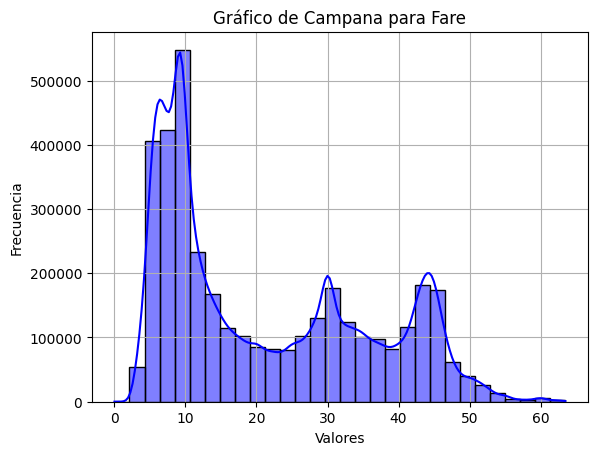

In [ ]:
#histograma de datos para visualizar la distribución
sns.histplot(data_sin_na['Fare'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Fare')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

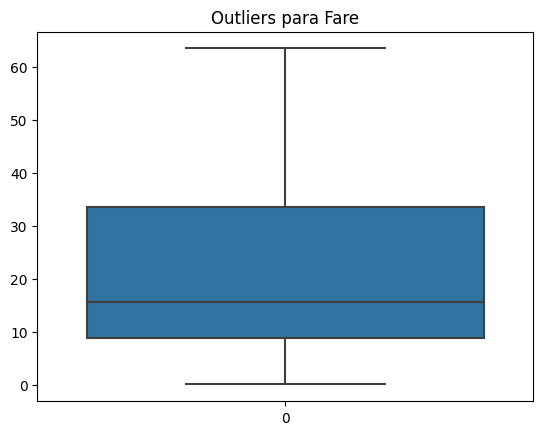

In [ ]:
# despues de la imputacion
sns.boxplot(data_sin_na['Fare'])
plt.title('Outliers para Fare')
plt.show()

**Trip Total**

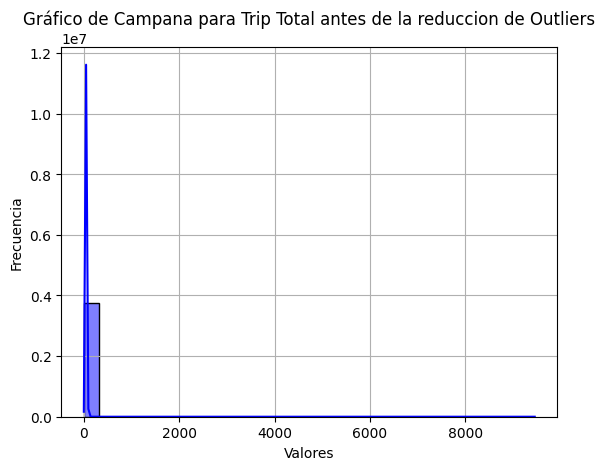

In [ ]:
#histograma para visualizar la distribución
sns.histplot(data_sin_na['Trip Total'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Total antes de la reduccion de Outliers' )
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Obtener el percentil 98 de 'Trip Total'
percentil98_tripmiles = data['Trip Total'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Trip Total'] if x <= percentil98_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Trip Total'])) * 100

# Imprimir
print(percentil98_tripmiles)
porcentaje98

68.0


98.00208963850193

In [ ]:
# Obtener el percentil 98 de Trip Total
percentil99_tripmiles = data['Trip Total'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Trip Total'] if x <= percentil99_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo99) / len(data['Trip Total'])) * 100

# Imprimir
print(percentil99_tripmiles)
porcentaje98


76.2


99.00244017197005

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Trip Total'] <= percentil99_tripmiles]

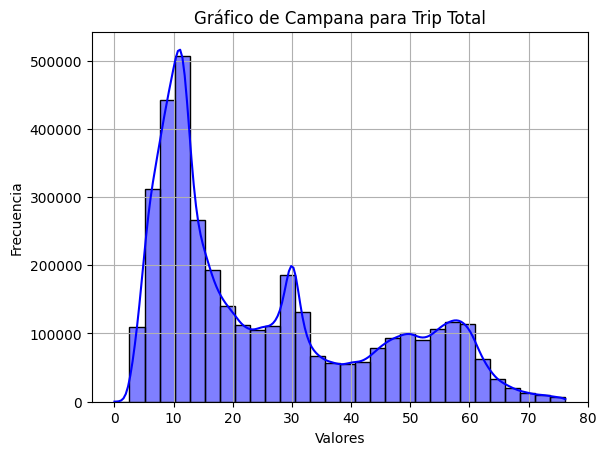

In [ ]:
#histograma para visualizar la distribución
sns.histplot(data_sin_na['Trip Total'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Total')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

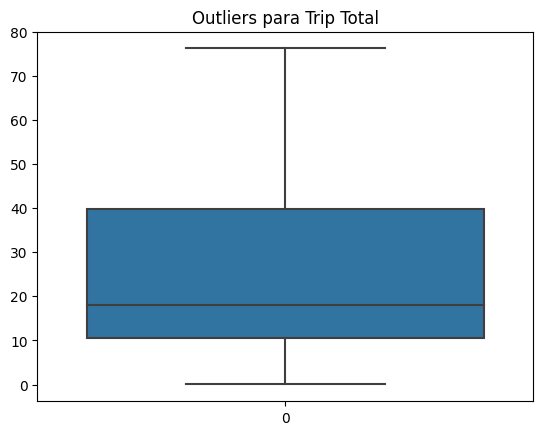

In [ ]:
# despues de la imputacion
sns.boxplot(data_sin_na['Trip Total'])
plt.title('Outliers para Trip Total')
plt.show()

**Trip Speed**

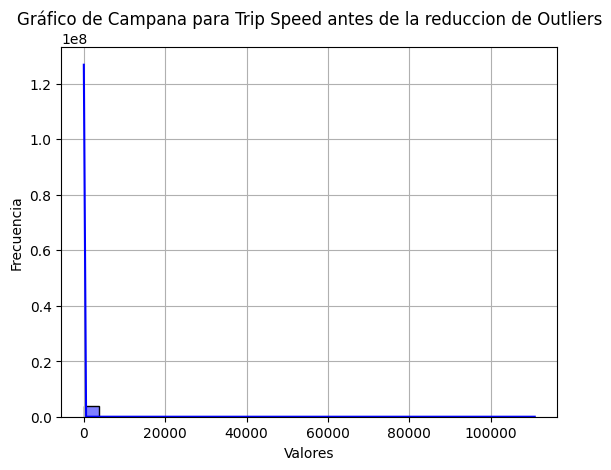

In [ ]:
#histograma datos para visualizar la distribución
sns.histplot(data_sin_na['Trip Speed'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Speed antes de la reduccion de Outliers' )
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Obtener el percentil 98 de 'Trip Speed'
percentil98_tripmiles = data['Trip Speed'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Trip Total'] if x <= percentil98_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Trip Speed'])) * 100

# Imprimir
print(percentil98_tripmiles)
porcentaje98

74.3358


98.82889480761868

In [ ]:
# Obtener el percentil 98 de Trip Speed
percentil99_tripmiles = data['Trip Speed'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Trip Speed'] if x <= percentil99_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo99) / len(data['Trip Speed'])) * 100

# Imprimir
print(percentil99_tripmiles)
porcentaje98


81.09360000000001


97.34956011179514

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Trip Speed'] <= percentil99_tripmiles]

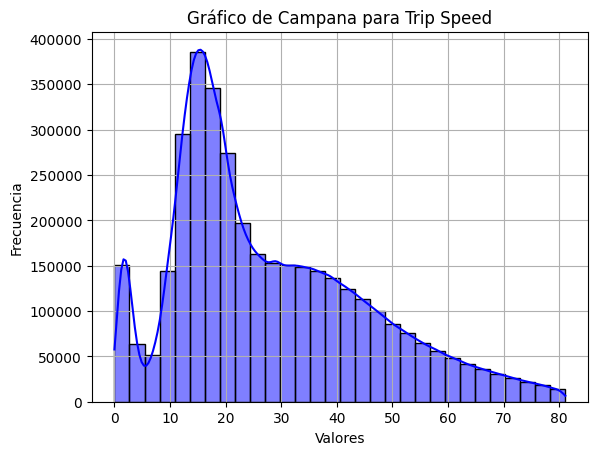

In [ ]:
#histograma de datos para visualizar la distribución
sns.histplot(data_sin_na['Trip Speed'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Trip Speed')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

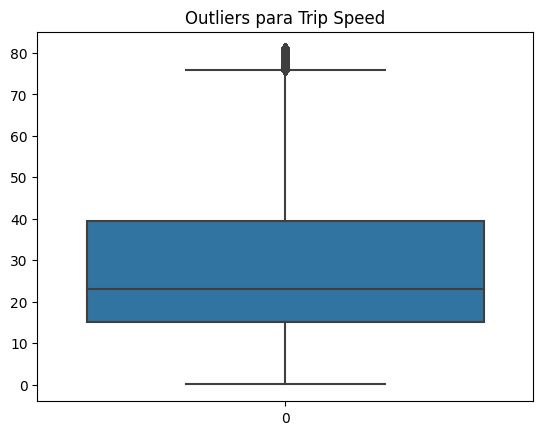

In [ ]:
# despues de la imputacion
sns.boxplot(data_sin_na['Trip Speed'])
plt.title('Outliers para Trip Speed')
plt.show()

**Extras**

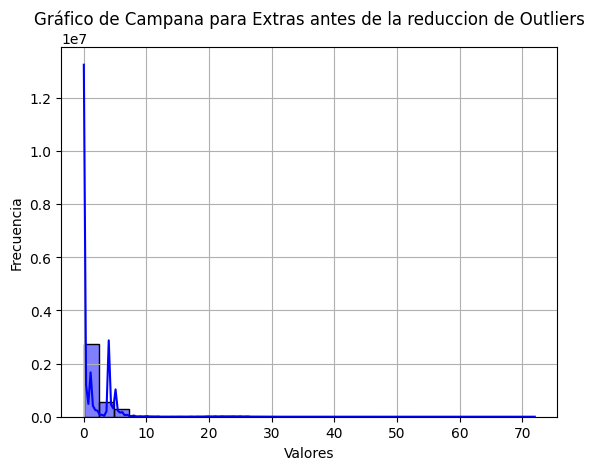

In [ ]:
#histograma de datos para visualizar la distribución
sns.histplot(data_sin_na['Extras'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Extras antes de la reduccion de Outliers' )
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Obtener el percentil 98 de 'Trip Speed'
percentil98_tripmiles = data['Extras'].quantile(0.98)
# Filtrar los datos que son menores o iguales al percentil 98
datos_debajo98 = [x for x in data['Extras'] if x <= percentil98_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo98) / len(data['Extras'])) * 100

# Imprimir
print(percentil98_tripmiles)
porcentaje98

6.0


98.17088819547249

In [ ]:
# Obtener el percentil 98 de Trip Speed
percentil99_tripmiles = data['Extras'].quantile(0.99)
# Filtrar los datos que son menores o iguales al percentil 99
datos_debajo99 = [x for x in data['Extras'] if x <= percentil99_tripmiles]
# Obtener el porcentaje de datos si hacemos el corte en este percentil
porcentaje98 = (len(datos_debajo99) / len(data['Extras'])) * 100

# Imprimir
print(percentil99_tripmiles)
porcentaje98


8.5


99.00345734498023

In [ ]:
# Eliminar na's conforme al análisis x percentil
data_sin_na = data_sin_na[data_sin_na['Extras'] <= percentil99_tripmiles]

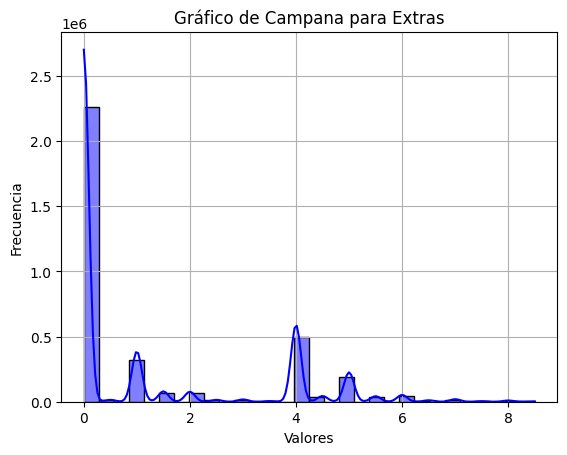

In [ ]:
#histograma de datos para visualizar la distribución
sns.histplot(data_sin_na['Extras'], kde=True, color='blue', bins=30)  # kde=True agrega la estimación de densidad
plt.title('Gráfico de Campana para Extras')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()

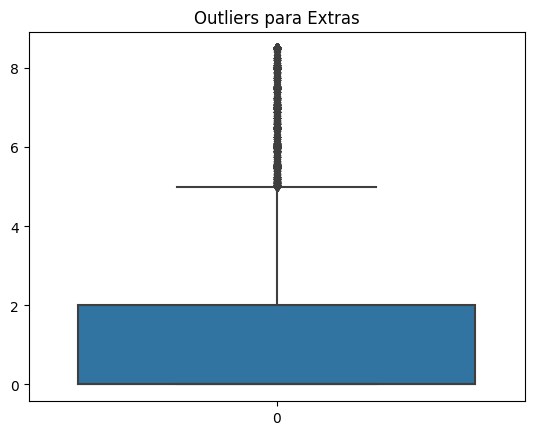

In [ ]:
# despues de la imputacion
sns.boxplot(data_sin_na['Extras'])
plt.title('Outliers para Extras')
plt.show()

In [ ]:

total_registros = data_sin_na.shape[0]
print("Cantidad de registros totales:", total_registros)
#porcentaje de datos perdidos, lo cual no hace mucha diferencia 6,26%

Cantidad de registros totales: 3593912


## **Análisis por agrupaciones**

Gracias al cliente, sabemos que es necesario predecir las próximas dos semanas desde la última semana de nuestro dataset, por lo que decidimos utilizar nuestra columna de "Trip Start Timestamp" para agrupar nuestras fechas diarias a eventos semanales con el fin de crear nuestras ventanas de tiempo semanales.

**signar un número de semana a cada registro del conjunto de datos.**


Se valida que el número de semana coincide ya que el 1 de Enero de 2023 cayó en un día domingo, por lo que el mismo sistema lo agrupa en la última semana de 2022 (semana 52), mientras que el 2 de Enero, al ser lunes y una nueva semana, ya la indica como semana 1.

Al contar ya con el número de semanas, consideramos válido el eliminar la columna "Trip Start Timestamp" para facilitar la escritura del código y simplificar la tabla a ingresar a nuestros modelos

In [ ]:
from datetime import datetime

# Definir las fechas de inicio y final de tu dataset (reemplaza estas fechas con las tuyas)
fecha_inicio = datetime(2023, 1, 1)
fecha_final = datetime(2023, 9, 1)

# Calcular la diferencia entre las dos fechas
diferencia = fecha_final - fecha_inicio

# Obtener el número de semanas
numero_de_semanas = diferencia.days // 7

# Imprimir el resultado
print(f'Número de semanas entre las fechas: {numero_de_semanas} semanas')
numero_de_semanas

Número de semanas entre las fechas: 34 semanas


34

In [ ]:
from datetime import datetime

# Definir las fechas de inicio y final de tu dataset
fecha_inicio = datetime(2023, 1, 1)
fecha_final = datetime(2023, 9, 1)

# Calcular la diferencia entre las dos fechas
diferencia = fecha_final - fecha_inicio

# Obtener el número de semanas personalizado
data_sin_na['Numero_Semana_Personalizado'] = data_sin_na['Trip Start Timestamp'].apply(lambda x: (x - fecha_inicio).days // 7+1 )

In [ ]:
data_sin_na

Trip ID  Taxi ID  \
0        0fca59218b11688279d795c03c4d16f851f13fa0        0   
1        1e539d6e7501164c6b76b761c3152c235e206d59        1   
2        2b3c5200439d51f626b60380809bbbcca766a85b        2   
3        45b2ea39cfff64d61a46ef016e16f8ee74e9ed23        3   
4        464df6aaaf97ca8745985c2a5b2e481067a2bfb6        4   
...                                           ...      ...   
4337591  e65ec9dcd2fda48eae02364b17ce8971ad073646      289   
4337592  e6ab315e2f20bc99d49ccd40a5d0b7251efc24cb      201   
4337593  ef9d52205b41f64aa4dc72c2cfa02a3773fe30a7     2682   
4337595  f651dc1431d3faa17a4e147ba20506274f1eaac4      548   
4337596  faf85ccdbaedbcee8431bc4070ae2401230e85eb      141   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
0        2023-01-01 12:00:00 2023-01-01 12:15:00        1037.0        4.82   
1        2023-01-01 12:00:00 2023-01-01 12:15:00        1341.0       16.63   
2        2023-01-01 12:00:00 2023-01-01 12:15:00         844.0        3.84   
3        2023-01-01 12:00:00 2023-01-01 12:00:00         361.0        0.63   
4        2023-01-01 12:00:00 2023-01-01 12:15:00         704.0        0.99   
...                      ...                 ...           ...         ...   
4337591  2023-09-01 12:00:00 2023-09-01 12:00:00         110.0        0.51   
4337592  2023-09-01 12:00:00 2023-09-01 12:30:00        1703.0        7.14   
4337593  2023-09-01 12:00:00 2023-09-01 12:00:00         389.0        0.98   
4337595  2023-09-01 12:00:00 2023-09-01 12:30:00        2017.0       18.96   
4337596  2023-09-01 12:00:00 2023-09-01 12:15:00        1389.0       13.69   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
0                        NaN                   NaN                    6.0   
1                        NaN                   NaN                   76.0   
2                        NaN                   NaN                   24.0   
3                        NaN                   NaN                   32.0   
4                        NaN                   NaN                   14.0   
...                      ...                   ...                    ...   
4337591                  NaN                   NaN                   51.0   
4337592                  NaN                   NaN                    3.0   
4337593                  NaN                   NaN                    8.0   
4337595                  NaN                   NaN                   76.0   
4337596                  NaN                   NaN                   76.0   

         Dropoff Community Area  ...  Pickup Centroid Longitude  \
0                          32.0  ...                 -87.655998   
1                           8.0  ...                 -87.913625   
2                           8.0  ...                 -87.676356   
3                          32.0  ...                 -87.625192   
4                          14.0  ...                 -87.721559   
...                         ...  ...                        ...   
4337591                    51.0  ...                 -87.570058   
4337592                    15.0  ...                 -87.655879   
4337593                     8.0  ...                 -87.633308   
4337595                    33.0  ...                 -87.913625   
4337596                     6.0  ...                 -87.913625   

                     Pickup Centroid Location  Dropoff Centroid Latitude  \
0        POINT (-87.6559981815 41.9442266014)                  41.878866   
1         POINT (-87.913624596 41.9802643146)                  41.899602   
2        POINT (-87.6763559892 41.9012069941)                  41.899602   
3        POINT (-87.6251921424 41.8788655841)                  41.878866   
4            POINT (-87.7215590627 41.968069)                  41.968069   
...                                       ...                        ...   
4337591  POINT (-87.5700582686 41.6906333472)                  41.690633   
4337592    POINT (-87.

## Análisis de viajes hechos por día

Decidimos agrupar por la fecha y hora de inicio de cada viaje, obteniendo también la cantidad de viajes realizados así como el total de ese mismo conjunto de viajes.

In [ ]:
#Agrupar por Fecha
viajes_por_dia = data_sin_na.groupby(['Trip Start Timestamp']).agg({
    'Trip ID':'count',
    'Trip Total': 'sum',
}).sort_values(by="Trip Start Timestamp", ascending=True).reset_index()

# Renombrar columnas
viajes_por_dia.columns = ['Fecha', 'Cantidad de Viajes', 'Monto Total']

print(viajes_por_dia)

                    Fecha  Cantidad de Viajes  Monto Total
0     2023-01-01 01:00:00                 245      5097.12
1     2023-01-01 01:15:00                 233      5160.24
2     2023-01-01 01:30:00                 241      5454.26
3     2023-01-01 01:45:00                 236      5343.01
4     2023-01-01 02:00:00                 228      4685.57
...                   ...                 ...          ...
11660 2023-08-31 12:00:00                 326      8159.45
11661 2023-08-31 12:15:00                 292      6676.64
11662 2023-08-31 12:30:00                 312      7749.99
11663 2023-08-31 12:45:00                 259      6730.67
11664 2023-09-01 12:00:00                  31       977.16

[11665 rows x 3 columns]


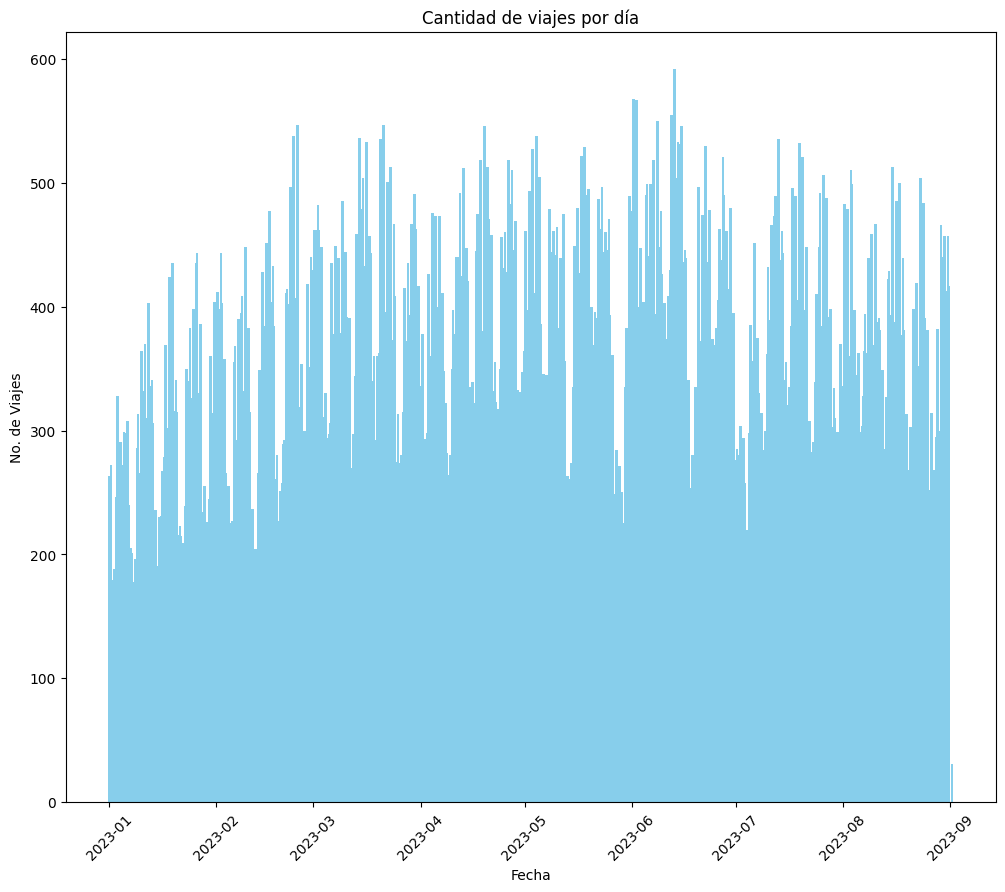

In [ ]:
# Creacion de la gráfica
plt.figure(figsize=(12, 10))
plt.bar(viajes_por_dia['Fecha'], viajes_por_dia['Cantidad de Viajes'], color='skyblue')
plt.title("Cantidad de viajes por día")
plt.xlabel("Fecha")
plt.ylabel("No. de Viajes")
plt.xticks(rotation=45)
plt.show()

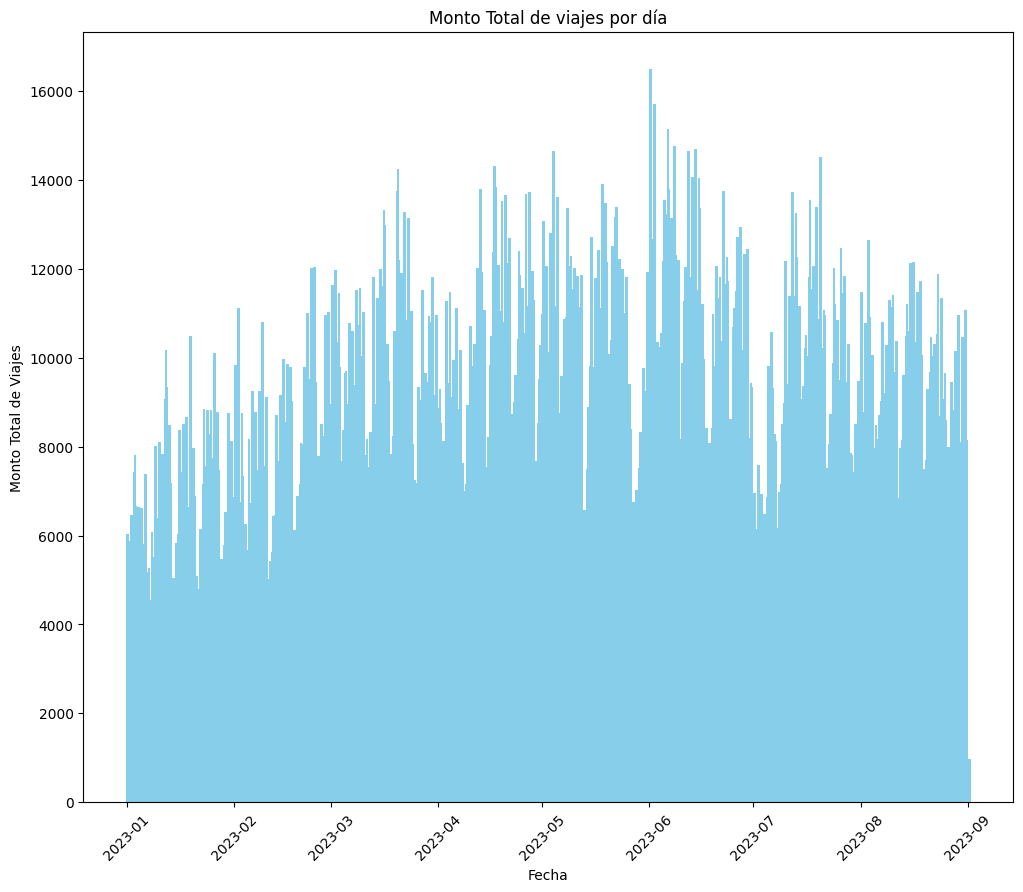

In [ ]:
# Creacion de la gráfica
plt.figure(figsize=(12, 10))
plt.bar(viajes_por_dia['Fecha'], viajes_por_dia['Monto Total'], color='skyblue')
plt.title("Monto Total de viajes por día")
plt.xlabel("Fecha")
plt.ylabel("Monto Total de Viajes")
plt.xticks(rotation=45)
plt.show()

In [ ]:
viajes_por_dia['Fecha'] = pd.to_datetime(viajes_por_dia['Fecha'])

In [ ]:
viajes_por_dia['DiaSemana'] = viajes_por_dia['Fecha'].dt.day_name()

In [ ]:
viajes_por_dia

Fecha  Cantidad de Viajes  Monto Total DiaSemana
0     2023-01-01 01:00:00                 245      5097.12    Sunday
1     2023-01-01 01:15:00                 233      5160.24    Sunday
2     2023-01-01 01:30:00                 241      5454.26    Sunday
3     2023-01-01 01:45:00                 236      5343.01    Sunday
4     2023-01-01 02:00:00                 228      4685.57    Sunday
...                   ...                 ...          ...       ...
11660 2023-08-31 12:00:00                 326      8159.45  Thursday
11661 2023-08-31 12:15:00                 292      6676.64  Thursday
11662 2023-08-31 12:30:00                 312      7749.99  Thursday
11663 2023-08-31 12:45:00                 259      6730.67  Thursday
11664 2023-09-01 12:00:00                  31       977.16    Friday

[11665 rows x 4 columns]

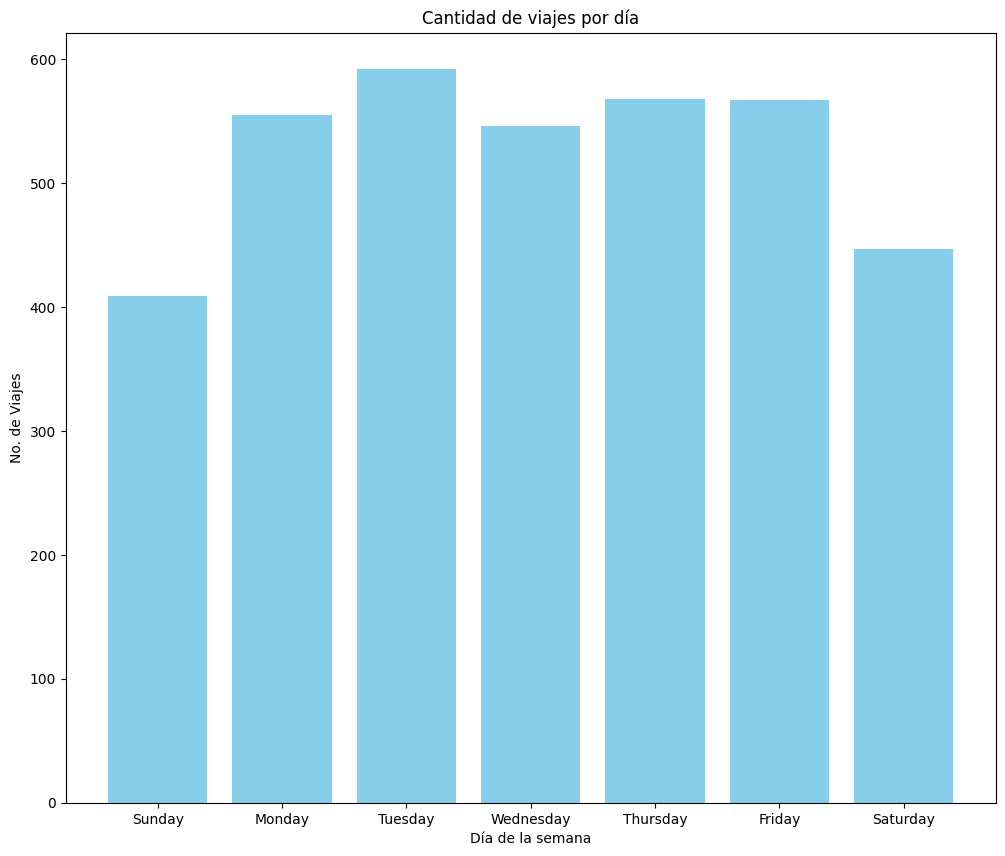

In [ ]:
# Creacion de la gráfica
plt.figure(figsize=(12, 10))
plt.bar(viajes_por_dia['DiaSemana'], viajes_por_dia['Cantidad de Viajes'], color='skyblue')
plt.title("Cantidad de viajes por día")
plt.xlabel("Día de la semana")
plt.ylabel("No. de Viajes")
plt.show()

## **Análisis de viajes por horas del día**

In [ ]:
datacopy = data_sin_na

In [ ]:
# Extraer la hora del día de la columna de fecha y hora
datacopy['Hora'] = datacopy['Trip Start Timestamp'].dt.hour

In [ ]:
datacopy

Trip ID  Taxi ID  \
0        0fca59218b11688279d795c03c4d16f851f13fa0        0   
1        1e539d6e7501164c6b76b761c3152c235e206d59        1   
2        2b3c5200439d51f626b60380809bbbcca766a85b        2   
3        45b2ea39cfff64d61a46ef016e16f8ee74e9ed23        3   
4        464df6aaaf97ca8745985c2a5b2e481067a2bfb6        4   
...                                           ...      ...   
4337591  e65ec9dcd2fda48eae02364b17ce8971ad073646      289   
4337592  e6ab315e2f20bc99d49ccd40a5d0b7251efc24cb      201   
4337593  ef9d52205b41f64aa4dc72c2cfa02a3773fe30a7     2682   
4337595  f651dc1431d3faa17a4e147ba20506274f1eaac4      548   
4337596  faf85ccdbaedbcee8431bc4070ae2401230e85eb      141   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
0        2023-01-01 12:00:00 2023-01-01 12:15:00        1037.0        4.82   
1        2023-01-01 12:00:00 2023-01-01 12:15:00        1341.0       16.63   
2        2023-01-01 12:00:00 2023-01-01 12:15:00         844.0        3.84   
3        2023-01-01 12:00:00 2023-01-01 12:00:00         361.0        0.63   
4        2023-01-01 12:00:00 2023-01-01 12:15:00         704.0        0.99   
...                      ...                 ...           ...         ...   
4337591  2023-09-01 12:00:00 2023-09-01 12:00:00         110.0        0.51   
4337592  2023-09-01 12:00:00 2023-09-01 12:30:00        1703.0        7.14   
4337593  2023-09-01 12:00:00 2023-09-01 12:00:00         389.0        0.98   
4337595  2023-09-01 12:00:00 2023-09-01 12:30:00        2017.0       18.96   
4337596  2023-09-01 12:00:00 2023-09-01 12:15:00        1389.0       13.69   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
0                        NaN                   NaN                    6.0   
1                        NaN                   NaN                   76.0   
2                        NaN                   NaN                   24.0   
3                        NaN                   NaN                   32.0   
4                        NaN                   NaN                   14.0   
...                      ...                   ...                    ...   
4337591                  NaN                   NaN                   51.0   
4337592                  NaN                   NaN                    3.0   
4337593                  NaN                   NaN                    8.0   
4337595                  NaN                   NaN                   76.0   
4337596                  NaN                   NaN                   76.0   

         Dropoff Community Area  ...              Pickup Centroid Location  \
0                          32.0  ...  POINT (-87.6559981815 41.9442266014)   
1                           8.0  ...   POINT (-87.913624596 41.9802643146)   
2                           8.0  ...  POINT (-87.6763559892 41.9012069941)   
3                          32.0  ...  POINT (-87.6251921424 41.8788655841)   
4                          14.0  ...      POINT (-87.7215590627 41.968069)   
...                         ...  ...                                   ...   
4337591                    51.0  ...  POINT (-87.5700582686 41.6906333472)   
4337592                    15.0  ...    POINT (-87.6558787862 41.96581197)   
4337593                     8.0  ...   POINT (-87.6333080367 41.899602111)   
4337595                    33.0  ...   POINT (-87.913624596 41.9802643146)   
4337596                     6.0  ...   POINT (-87.913624596 41.9802643146)   

         Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
0                        41.878866                  -87.625192   
1                        41.899602                  -87.633308   
2                        41.899602                  -87.633308   
3                        41.878866                  -87.625192   
4                        41.968069                  -87.721559   
...                            ...                         ...   
4337591                  41.690633  

In [ ]:
# Agrupacion de los datos por hora del día y cuenta la cantidad de viajes en cada grupo
viajes_por_hora = datacopy.groupby('Hora')['Taxi ID'].count().reset_index()

# Renombramiento de columnas
viajes_por_hora.columns = ['Hora', 'Cantidad de Viajes']

# Muestra el resultado
print(viajes_por_hora)

    Hora  Cantidad de Viajes
0      1              273415
1      2              258567
2      3              256362
3      4              266025
4      5              289210
5      6              310235
6      7              339155
7      8              355425
8      9              339397
9     10              313607
10    11              299479
11    12              293035


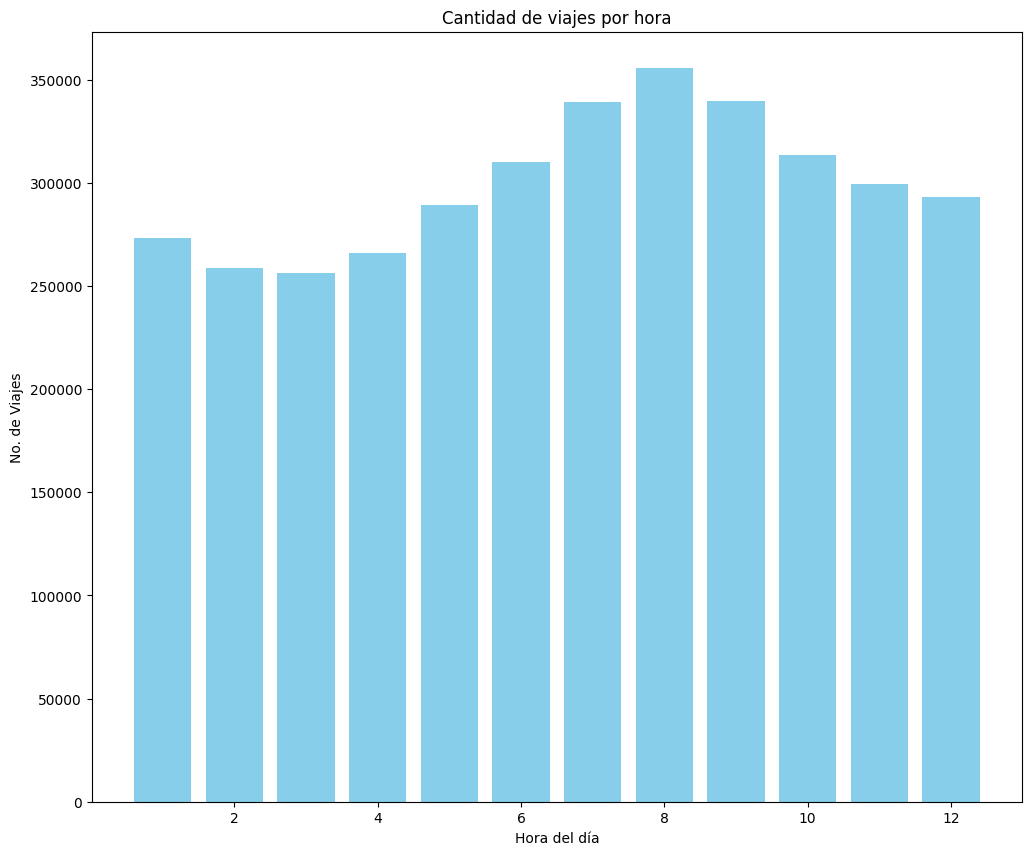

In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 10))
plt.bar(viajes_por_hora['Hora'], viajes_por_hora['Cantidad de Viajes'], color='skyblue')
plt.title("Cantidad de viajes por hora")
plt.xlabel("Hora del día")
plt.ylabel("No. de Viajes")
plt.show()

## **Análisis de viajes por compañía**

In [ ]:
# agrupacion de datos por compañía y la cantidad de viajes en cada grupo
viajes_por_compañia = data_sin_na.groupby(data_sin_na['Company'])['Trip ID'].count().reset_index()

# Renombrar columnas
viajes_por_compañia.columns = ['Compañia', 'Cantidad de Viajes']

print(viajes_por_compañia)

                                Compañia  Cantidad de Viajes
0                2733 - 74600 Benny Jona                 739
1          312 Medallion Management Corp                5254
2            3556 - 36214 RC Andrews Cab                1267
3                 3591 - 63480 Chuks Cab                1796
4           4053 - 40193 Adwar H. Nikola                 492
5                   4623 - 27290 Jay Kim                 897
6               4787 - 56058 Reny Cab Co                 460
7                            5 Star Taxi              154776
8                5062 - 34841 Sam Mestas                  29
9             5167 - 71969 5167 Taxi Inc                1190
10           6574 - Babylon Express Inc.                1152
11          Blue Ribbon Taxi Association              119141
12         Chicago City Taxi Association               22104
13                  Chicago Independents              221074
14                       Chicago Taxicab                9441
15               Choice 

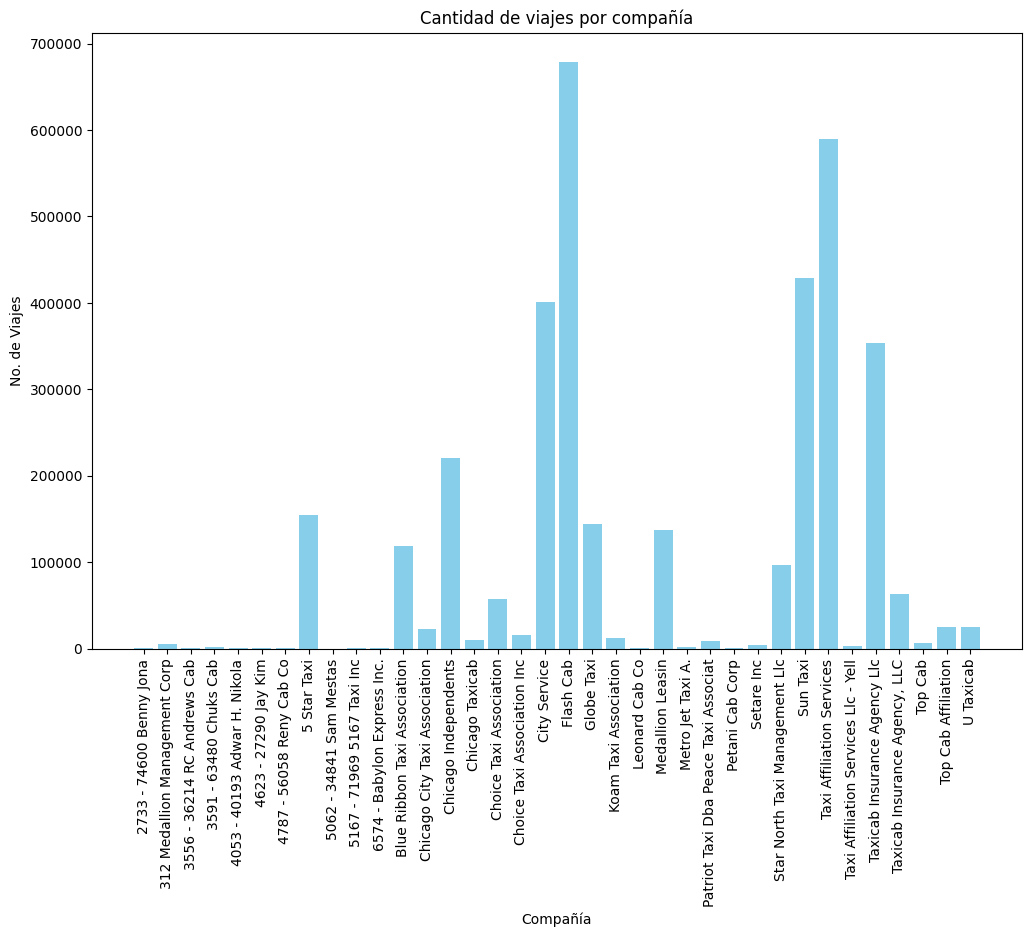

In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.bar(viajes_por_compañia['Compañia'], viajes_por_compañia['Cantidad de Viajes'], color='skyblue')
plt.title("Cantidad de viajes por compañía")
plt.xlabel("Compañía")
plt.ylabel("No. de Viajes")
plt.xticks(rotation=90)
plt.show()

Se observa que las compañías "Flash Cab" y "Taxi Affiliation Services" son las que cuentan con mayor número de viajes, sobrepasando los 600,000 viajes c/u, por lo que decidimos proceder con un análisis más específico al respecto para validar por qué y si esto influye de alguna manera con nuestro Trip Total.

In [ ]:
#Agrupar por Fecha
viajes_por_compañia_triptotal = data_sin_na.groupby(['Company']).agg({
    'Trip ID':'count',
    'Trip Total': 'mean',
}).sort_values(by="Company", ascending=True).reset_index()

# Renombrar columnas
viajes_por_compañia_triptotal.columns = ['Compañía', 'Cantidad de Viajes', 'Monto Total']

print(viajes_por_compañia_triptotal)

                                Compañía  Cantidad de Viajes  Monto Total
0                2733 - 74600 Benny Jona                 739    37.299256
1          312 Medallion Management Corp                5254    32.009543
2            3556 - 36214 RC Andrews Cab                1267    17.347853
3                 3591 - 63480 Chuks Cab                1796    12.970874
4           4053 - 40193 Adwar H. Nikola                 492    43.926809
5                   4623 - 27290 Jay Kim                 897    34.370424
6               4787 - 56058 Reny Cab Co                 460    13.547739
7                            5 Star Taxi              154776    28.736327
8                5062 - 34841 Sam Mestas                  29     8.866897
9             5167 - 71969 5167 Taxi Inc                1190    26.904849
10           6574 - Babylon Express Inc.                1152    28.436085
11          Blue Ribbon Taxi Association              119141    21.142407
12         Chicago City Taxi Associati

In [ ]:
#Agrupar por Fecha
viajes_por_compañia_triptotal = data_sin_na.groupby(['Company']).agg({
    'Trip ID':'count',
    'Trip Total': 'min',
}).sort_values(by="Company", ascending=True).reset_index()

# Renombrar columnas
viajes_por_compañia_triptotal.columns = ['Compañía', 'Cantidad de Viajes', 'Monto Total']

print(viajes_por_compañia_triptotal)

                                Compañía  Cantidad de Viajes  Monto Total
0                2733 - 74600 Benny Jona                 739         4.00
1          312 Medallion Management Corp                5254         3.50
2            3556 - 36214 RC Andrews Cab                1267         3.50
3                 3591 - 63480 Chuks Cab                1796         3.25
4           4053 - 40193 Adwar H. Nikola                 492         5.50
5                   4623 - 27290 Jay Kim                 897         4.25
6               4787 - 56058 Reny Cab Co                 460         3.50
7                            5 Star Taxi              154776         3.25
8                5062 - 34841 Sam Mestas                  29         4.75
9             5167 - 71969 5167 Taxi Inc                1190         3.50
10           6574 - Babylon Express Inc.                1152         3.25
11          Blue Ribbon Taxi Association              119141         1.50
12         Chicago City Taxi Associati

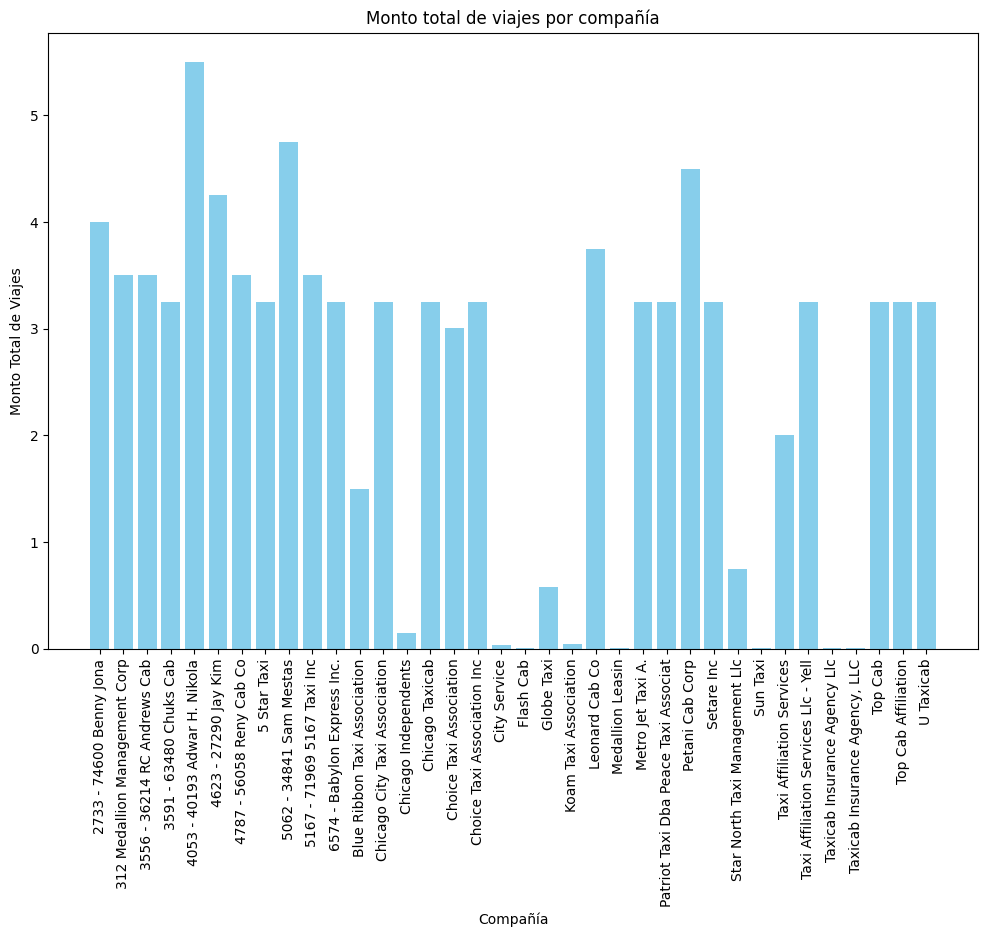

In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.bar(viajes_por_compañia_triptotal['Compañía'], viajes_por_compañia_triptotal['Monto Total'], color='skyblue')
plt.title("Monto total de viajes por compañía")
plt.xlabel("Compañía")
plt.ylabel("Monto Total de Viajes")
plt.xticks(rotation=90)
plt.show()

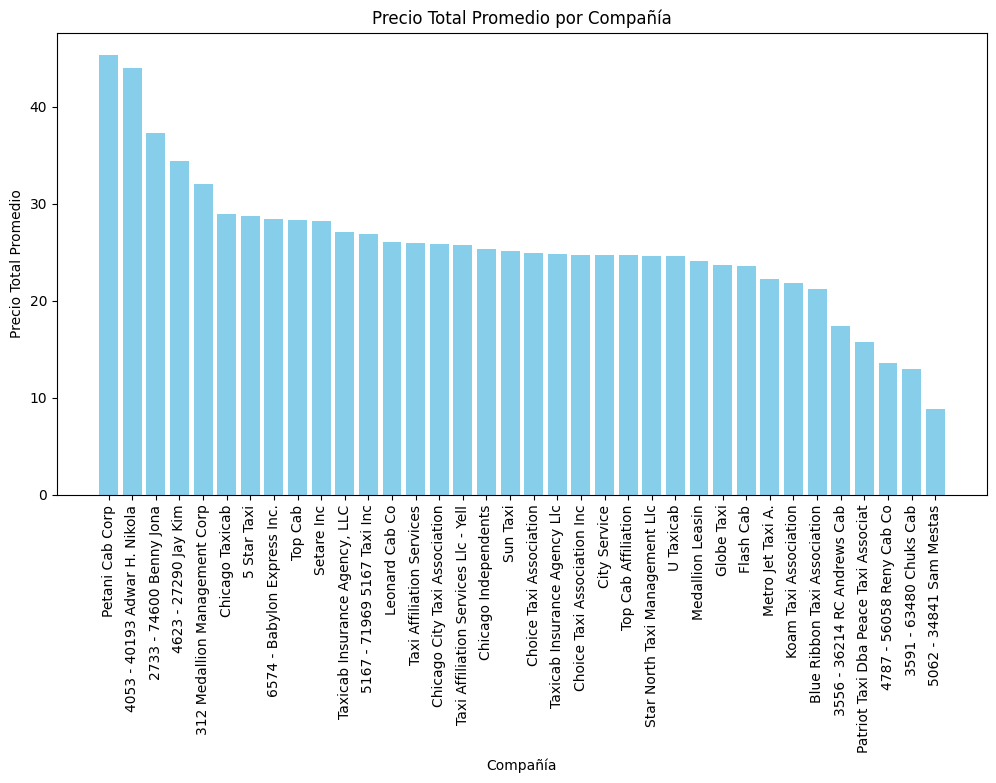

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupacion por compañía y calculo del promedio de precio total
company_stats = data_sin_na.groupby('Company')['Trip Total'].mean().reset_index()

# Ordenamiento de compañías por el promedio del precio total de forma descendente
company_stats = company_stats.sort_values(by='Trip Total', ascending=False)

#gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(company_stats['Company'], company_stats['Trip Total'], color='skyblue')
plt.xlabel('Compañía')
plt.ylabel('Precio Total Promedio')
plt.title('Precio Total Promedio por Compañía')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.show()


El análisis de varianza permite comparar si existen diferencias significativas en el precio total entre diferentes compañías. El ANOVA evalúa si la media de los precios totales es igual en todas las compañías o si al menos una compañía es significativamente diferente

In [ ]:
from statsmodels.formula.api import ols

model = ols('Q("Trip Total") ~ C(Company)', data=data_sin_na).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir la tabla ANOVA
print(anova_table)
#Estos resultados sugieren que la compañía tiene un efecto significativo en el precio total de los viajes
# F es bastante alto (798.79), lo que indica que existe una diferencia significativa entre los grupos
#(en este caso, las diferentes compañías)

#(PR(>F)) es prácticamente cero (0.0), lo que significa que la probabilidad de obtener este
#resultado debido al azar es extremadamente baja

                  sum_sq         df           F  PR(>F)
C(Company)  8.950066e+06       35.0  798.786829     0.0
Residual    1.150510e+09  3593876.0         NaN     NaN


In [ ]:
import pandas as pd

# Agrupacion por compañía y el promedio del precio total
company_stats = data_sin_na.groupby('Company')['Trip Total'].mean().reset_index()

# porcentaje del precio total promedio en relación al precio total promedio total
company_stats['Porcentaje'] = (company_stats['Trip Total'] / company_stats['Trip Total'].sum()) * 100

#compañías por el porcentaje de precio total promedio de forma descendente
company_stats = company_stats.sort_values(by='Porcentaje', ascending=False)
company_stats

#El porcentaje indica la contribución de cada compañía al precio total promedio total en el conjunto de datos.
#En otras palabras,muestra qué parte del precio total promedio total es atribuible a cada compañía en función de los viajes registrados en los datos.
#por ejemplo %4.921550 significa que Petani Cab Corp es responsable de de ese 4.921550 del precio total promedio
#variabilidad en los precios totales de una compañía

Company  Trip Total  Porcentaje
25                       Petani Cab Corp   45.355448    4.921550
4           4053 - 40193 Adwar H. Nikola   43.926809    4.766527
0                2733 - 74600 Benny Jona   37.299256    4.047367
5                   4623 - 27290 Jay Kim   34.370424    3.729558
1          312 Medallion Management Corp   32.009543    3.473377
14                       Chicago Taxicab   28.916219    3.137718
7                            5 Star Taxi   28.736327    3.118198
10           6574 - Babylon Express Inc.   28.436085    3.085619
33                               Top Cab   28.254418    3.065906
26                            Setare Inc   28.175282    3.057319
32         Taxicab Insurance Agency, LLC   27.084685    2.938977
9             5167 - 71969 5167 Taxi Inc   26.904849    2.919463
21                        Leonard Cab Co   26.086489    2.830662
29             Taxi Affiliation Services   25.937202    2.814463
12         Chicago City Taxi Association   25.850877    2.805096
30  Taxi Affiliation Services Llc - Yell   25.754364    2.794623
13                  Chicago Independents   25.356963    2.751501
28                              Sun Taxi   25.081763    2.721639
15               Choice Taxi Association   24.934388    2.705647
31          Taxicab Insurance Agency Llc   24.783144    2.689235
16           Choice Taxi Association Inc   24.697919    2.679988
17                          City Service   24.694549    2.679622
34                   Top Cab Affiliation   24.665042    2.676420
27        Star North Taxi Management Llc   24.620287    2.671564
35                             U Taxicab   24.598705    2.669222
22                      Medallion Leasin   24.050572    2.609744
19                            Globe Taxi   23.697079    2.571386
18                             Flash Cab   23.608819    2.561809
23                     Metro Jet Taxi A.   22.236300    2.412876
20                 Koam Taxi Association   21.817641    2.367447
11          Blue Ribbon Taxi Association   21.142407    2.294177
2            3556 - 36214 RC Andrews Cab   17.347853    1.882427
24  Patriot Taxi Dba Peace Taxi Associat   15.751151    1.709168
6               4787 - 56058 Reny Cab Co   13.547739    1.470074
3                 3591 - 63480 Chuks Cab   12.970874    1.407478
8                5062 - 34841 Sam Mestas    8.866897    0.962153

In [ ]:
data_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593912 entries, 0 to 4337596
Data columns (total 29 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Trip ID                      object        
 1   Taxi ID                      int64         
 2   Trip Start Timestamp         datetime64[ns]
 3   Trip End Timestamp           datetime64[ns]
 4   Trip Seconds                 float64       
 5   Trip Miles                   float64       
 6   Pickup Census Tract          float64       
 7   Dropoff Census Tract         float64       
 8   Pickup Community Area        float64       
 9   Dropoff Community Area       float64       
 10  Fare                         float64       
 11  Tips                         float64       
 12  Tolls                        float64       
 13  Extras                       float64       
 14  Trip Total                   float64       
 15  Payment Type                 object        
 16  

## **Análisis de frecuencia por métodos de pago**

In [ ]:
# Calculo de la frecuencia de cada método de pago en el DataFrame
frecuencia_metodos_pago = data_sin_na['Payment Type'].value_counts()

frecuencia_metodos_pago

Credit Card    1442534
Cash           1002859
Mobile          556003
Prcard          413530
Unknown         177588
No Charge          740
Dispute            658
Name: Payment Type, dtype: int64

In [ ]:
# Agrupacion de los datos por tipo de pago y  la cantidad de viajes en cada grupo
frecuencia_metodos_pago = data_sin_na.groupby(data_sin_na['Payment Type'])['Trip ID'].count().reset_index()

# Renombrar columnas
frecuencia_metodos_pago.columns = ['Metodo', 'Cantidad']

frecuencia_metodos_pago

Metodo  Cantidad
0         Cash   1002859
1  Credit Card   1442534
2      Dispute       658
3       Mobile    556003
4    No Charge       740
5       Prcard    413530
6      Unknown    177588

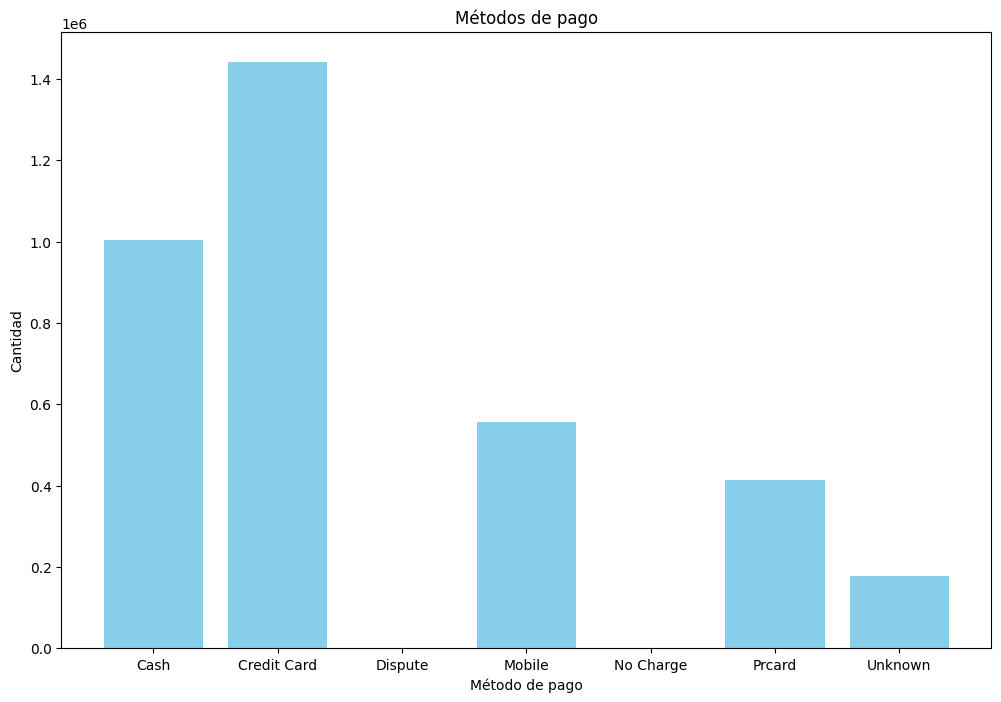

In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.bar(frecuencia_metodos_pago['Metodo'], frecuencia_metodos_pago['Cantidad'], color='skyblue')
plt.title("Métodos de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
data_sin_na['Payment Type'].isnull().sum()

0

<Figure size 1000x600 with 0 Axes>

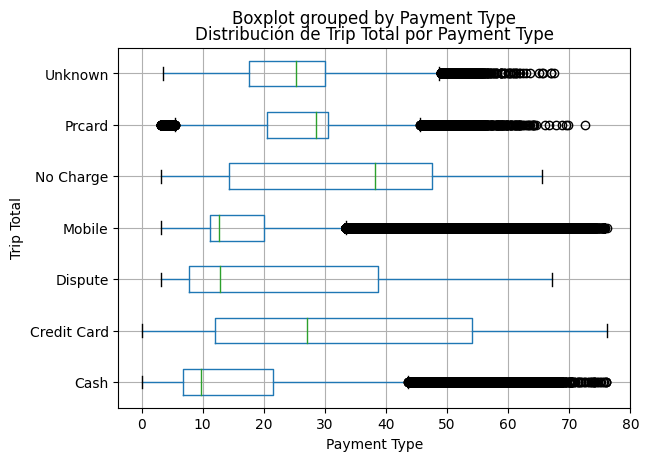

In [ ]:
import matplotlib.pyplot as plt

#box plot por categoría de Payment Type
plt.figure(figsize=(10, 6))
data_sin_na.boxplot(column='Trip Total', by='Payment Type', vert=False)
plt.xlabel('Payment Type')
plt.ylabel('Trip Total')
plt.title('Distribución de Trip Total por Payment Type')
plt.show()


In [ ]:
from scipy.stats import kruskal

# Realizar la prueba de Kruskal-Wallis
result = kruskal(*[data_sin_na['Trip Total'][data_sin_na['Payment Type'] == pt] for pt in data_sin_na['Payment Type'].unique()])

print('Valor p de Kruskal-Wallis:', result.pvalue)

Valor p de Kruskal-Wallis: 0.0


In [ ]:
viajes_por_payment_type_triptotal = data_sin_na.groupby(['Payment Type']).agg({
    'Trip ID': 'count',
    'Trip Total': 'mean',
}).sort_values(by="Payment Type", ascending=True).reset_index()

# Renombrar columnas
viajes_por_payment_type_triptotal.columns = ['Tipo de Pago', 'Cantidad de Viajes', 'Monto Total Promedio']

print(viajes_por_payment_type_triptotal)


  Tipo de Pago  Cantidad de Viajes  Monto Total Promedio
0         Cash             1002859             16.775710
1  Credit Card             1442534             32.575937
2      Dispute                 658             21.916033
3       Mobile              556003             19.194545
4    No Charge                 740             32.330743
5       Prcard              413530             25.470453
6      Unknown              177588             23.622485


In [ ]:
import pandas as pd

# Agrupacion por compañía y el promedio del precio total
company_stats = data_sin_na.groupby('Payment Type')['Trip Total'].mean().reset_index()

# porcentaje del precio total promedio en relación al precio total promedio total
company_stats['Porcentaje'] = (company_stats['Trip Total'] / company_stats['Trip Total'].sum()) * 100

#Payment Type por el porcentaje de precio total promedio de forma descendente
company_stats = company_stats.sort_values(by='Porcentaje', ascending=False)
company_stats

Payment Type  Trip Total  Porcentaje
1  Credit Card   32.575937   18.952070
4    No Charge   32.330743   18.809421
5       Prcard   25.470453   14.818232
6      Unknown   23.622485   13.743119
2      Dispute   21.916033   12.750338
3       Mobile   19.194545   11.167027
0         Cash   16.775710    9.759794

In [ ]:
data_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593912 entries, 0 to 4337596
Data columns (total 29 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Trip ID                      object        
 1   Taxi ID                      int64         
 2   Trip Start Timestamp         datetime64[ns]
 3   Trip End Timestamp           datetime64[ns]
 4   Trip Seconds                 float64       
 5   Trip Miles                   float64       
 6   Pickup Census Tract          float64       
 7   Dropoff Census Tract         float64       
 8   Pickup Community Area        float64       
 9   Dropoff Community Area       float64       
 10  Fare                         float64       
 11  Tips                         float64       
 12  Tolls                        float64       
 13  Extras                       float64       
 14  Trip Total                   float64       
 15  Payment Type                 object        
 16  

In [ ]:
#Agrupar por Fecha
metodos_pago = data_sin_na.groupby(['Company', 'Payment Type']).agg({
    'Trip ID':'count',
    'Trip Total': 'sum',
}).sort_values(by='Company', ascending=True).reset_index()

# Renombrar columnas
metodos_pago.columns = ['Compañía', 'Tipo de Pago', 'Cantidad de Viajes', 'Monto Total']

metodos_pago

Compañía Tipo de Pago  Cantidad de Viajes  \
0          2733 - 74600 Benny Jona         Cash                 208   
1          2733 - 74600 Benny Jona  Credit Card                 529   
2          2733 - 74600 Benny Jona      Unknown                   2   
3    312 Medallion Management Corp         Cash                1626   
4    312 Medallion Management Corp  Credit Card                3462   
..                             ...          ...                 ...   
137                      U Taxicab      Dispute                 254   
138                      U Taxicab    No Charge                  13   
139                      U Taxicab         Cash                8691   
140                      U Taxicab  Credit Card               15158   
141                      U Taxicab      Unknown                1145   

     Monto Total  
0        4703.75  
1       22828.40  
2          32.00  
3       32558.00  
4      132340.89  
..           ...  
137      4660.25  
138       240.50  
139    138771.00  
140    457831.63  
141     19884.50  

[142 rows x 4 columns]

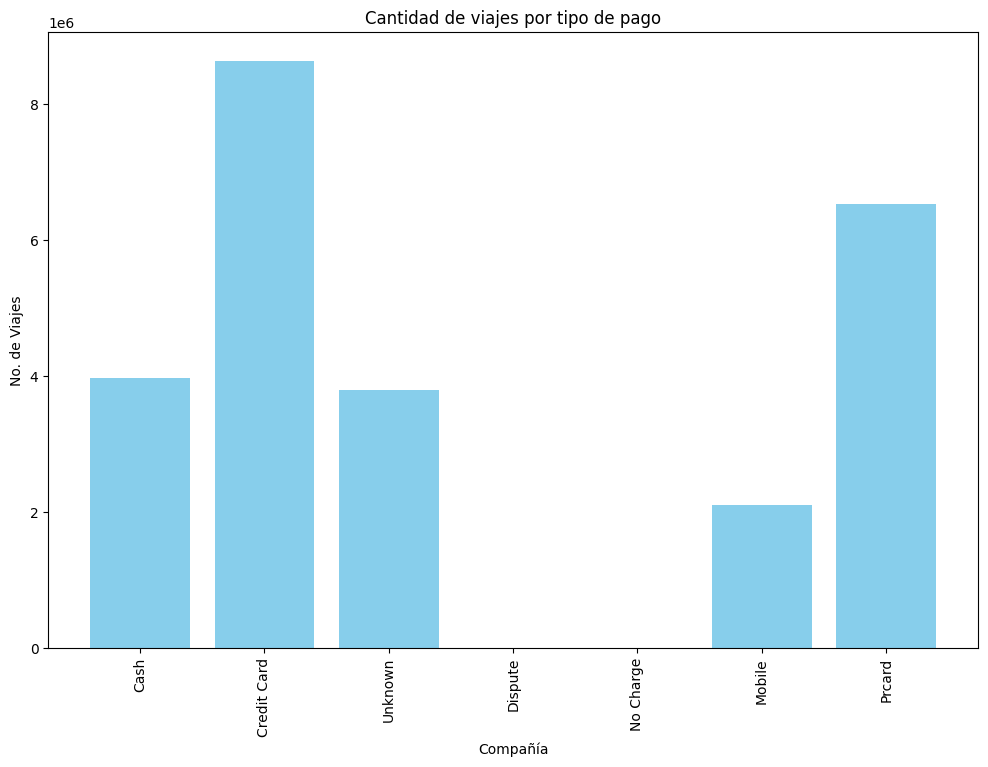

In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.bar(metodos_pago['Tipo de Pago'], metodos_pago['Monto Total'], color='skyblue')
plt.title("Cantidad de viajes por tipo de pago")
plt.xlabel("Compañía")
plt.ylabel("No. de Viajes")
plt.xticks(rotation=90)
plt.show()

Consideramos razonable que, al necesitar predecir dos semanas completas, utilicemos tres semanas anteriores para crear nuestras ventanas de tiempo.

##Agrupacion por taxi

In [ ]:
group_taxi= data_sin_na.groupby(['Taxi ID','Numero_Semana_Personalizado']).agg({
    'Trip Seconds':'mean',
    'Trip Miles':'mean',
    'Fare':'mean',
    'Extras':'mean',
    'Trip Speed':'mean',
    'Tips':'mean',
    'Trip Total':'mean'}).sort_values(by='Numero_Semana_Personalizado',ascending=True).reset_index()

In [ ]:
data_sin_na

Trip ID  Taxi ID  \
0        0fca59218b11688279d795c03c4d16f851f13fa0        0   
1        1e539d6e7501164c6b76b761c3152c235e206d59        1   
2        2b3c5200439d51f626b60380809bbbcca766a85b        2   
3        45b2ea39cfff64d61a46ef016e16f8ee74e9ed23        3   
4        464df6aaaf97ca8745985c2a5b2e481067a2bfb6        4   
...                                           ...      ...   
4337591  e65ec9dcd2fda48eae02364b17ce8971ad073646      289   
4337592  e6ab315e2f20bc99d49ccd40a5d0b7251efc24cb      201   
4337593  ef9d52205b41f64aa4dc72c2cfa02a3773fe30a7     2682   
4337595  f651dc1431d3faa17a4e147ba20506274f1eaac4      548   
4337596  faf85ccdbaedbcee8431bc4070ae2401230e85eb      141   

        Trip Start Timestamp  Trip End Timestamp  Trip Seconds  Trip Miles  \
0        2023-01-01 12:00:00 2023-01-01 12:15:00        1037.0        4.82   
1        2023-01-01 12:00:00 2023-01-01 12:15:00        1341.0       16.63   
2        2023-01-01 12:00:00 2023-01-01 12:15:00         844.0        3.84   
3        2023-01-01 12:00:00 2023-01-01 12:00:00         361.0        0.63   
4        2023-01-01 12:00:00 2023-01-01 12:15:00         704.0        0.99   
...                      ...                 ...           ...         ...   
4337591  2023-09-01 12:00:00 2023-09-01 12:00:00         110.0        0.51   
4337592  2023-09-01 12:00:00 2023-09-01 12:30:00        1703.0        7.14   
4337593  2023-09-01 12:00:00 2023-09-01 12:00:00         389.0        0.98   
4337595  2023-09-01 12:00:00 2023-09-01 12:30:00        2017.0       18.96   
4337596  2023-09-01 12:00:00 2023-09-01 12:15:00        1389.0       13.69   

         Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
0                        NaN                   NaN                    6.0   
1                        NaN                   NaN                   76.0   
2                        NaN                   NaN                   24.0   
3                        NaN                   NaN                   32.0   
4                        NaN                   NaN                   14.0   
...                      ...                   ...                    ...   
4337591                  NaN                   NaN                   51.0   
4337592                  NaN                   NaN                    3.0   
4337593                  NaN                   NaN                    8.0   
4337595                  NaN                   NaN                   76.0   
4337596                  NaN                   NaN                   76.0   

         Dropoff Community Area  ...              Pickup Centroid Location  \
0                          32.0  ...  POINT (-87.6559981815 41.9442266014)   
1                           8.0  ...   POINT (-87.913624596 41.9802643146)   
2                           8.0  ...  POINT (-87.6763559892 41.9012069941)   
3                          32.0  ...  POINT (-87.6251921424 41.8788655841)   
4                          14.0  ...      POINT (-87.7215590627 41.968069)   
...                         ...  ...                                   ...   
4337591                    51.0  ...  POINT (-87.5700582686 41.6906333472)   
4337592                    15.0  ...    POINT (-87.6558787862 41.96581197)   
4337593                     8.0  ...   POINT (-87.6333080367 41.899602111)   
4337595                    33.0  ...   POINT (-87.913624596 41.9802643146)   
4337596                     6.0  ...   POINT (-87.913624596 41.9802643146)   

         Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
0                        41.878866                  -87.625192   
1                        41.899602                  -87.633308   
2                        41.899602                  -87.633308   
3                        41.878866                  -87.625192   
4                        41.968069                  -87.721559   
...                            ...                         ...   
4337591                  41.690633  

In [ ]:
group_taxi
#se agruoa por cada taxi y por cada semana
#los viajes que tenga un dsu semana y su promedio taolt

Taxi ID  Numero_Semana_Personalizado  Trip Seconds  Trip Miles  \
0            0                            1    988.045455    8.526136   
1          990                            1   1317.500000   12.354688   
2          989                            1    702.500000    4.008333   
3          988                            1   1471.368421    8.733895   
4          987                            1    767.854545    4.268000   
...        ...                          ...           ...         ...   
82614     1066                           35   2126.181818   15.018182   
82615     2085                           35   1185.517241    6.172414   
82616      463                           35   1885.714286    0.728571   
82617      442                           35   1523.266667    8.686667   
82618     3234                           35   2130.000000    0.625000   

            Fare    Extras  Trip Speed      Tips  Trip Total  
0      23.817045  2.375000   44.703945  3.738636   30.248864  
1      31.967188  4.093750   52.351249  5.126250   41.530938  
2      13.265625  0.906250   26.316591  1.640000   15.811875  
3      25.934211  0.031579   37.520004  0.239368   26.210421  
4      14.412545  0.609091   25.455007  2.409273   17.630909  
...          ...       ...         ...       ...         ...  
82614  39.022727  5.500000   40.652713  6.871818   51.803636  
82615  18.974138  1.500000   27.068282  2.344828   22.818966  
82616  33.285714  3.535714    2.122665  4.546429   41.367857  
82617  31.651333  0.066667   36.741861  0.133333   31.884667  
82618  30.250000  3.625000    1.882195  3.500000   37.375000  

[82619 rows x 9 columns]

# <font color="#1A3B47" FACE="georgia" size = 7 >Dataset final</font>

In [ ]:
fare_group = group_taxi[['Taxi ID','Numero_Semana_Personalizado','Fare']]
fare_group

Taxi ID  Numero_Semana_Personalizado       Fare
0            0                            1  23.817045
1          990                            1  31.967188
2          989                            1  13.265625
3          988                            1  25.934211
4          987                            1  14.412545
...        ...                          ...        ...
82614     1066                           35  39.022727
82615     2085                           35  18.974138
82616      463                           35  33.285714
82617      442                           35  31.651333
82618     3234                           35  30.250000

[82619 rows x 3 columns]

In [ ]:
Fare_pivot = fare_group.pivot(index='Taxi ID',columns='Numero_Semana_Personalizado',values='Fare')
#número total de semanas 35
numero_de_semanas = 35

# Generando los nuevos nombres de columnas
#Fare_pivot.nuevos_nombres = ['Semana ' + str(i) for i in range(1, numero_de_semanas + 1)]
nuevos_nombres = [ 'Semana fare '+ str(i) for i in range(1, numero_de_semanas + 1)]

# Asignamos los nuevos nombres de columnas al DataFrame pivotado
Fare_pivot.columns = nuevos_nombres
Fare_pivot
#se obtiene la agrupacion por ID Taxi , en la que cada registro de celda corresponde al costo promedio total con respecto a la semana de cada taxi
Fare_pivot=Fare_pivot.fillna(0)
Fare_pivot = Fare_pivot.reset_index()
Fare_pivot

Taxi ID  Semana fare 1  Semana fare 2  Semana fare 3  Semana fare 4  \
0           0      23.817045      24.755581      21.172927      19.714783   
1           1      36.596154      25.590714      30.501724      23.539773   
2           2      18.324928      13.342500      11.966825      11.654017   
3           3      19.007576      21.462500      23.329545      28.875000   
4           4      19.198000      18.032391      17.337636      16.902586   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana fare 5  Semana fare 6  Semana fare 7  Semana fare 8  \
0         25.986111      29.367000      27.472857      26.496800   
1         25.880233      20.860000      23.712857      22.228421   
2         10.996293      10.156106      13.032458      16.093879   
3         26.511905      31.578125      26.960526      32.802632   
4         18.527857      16.080000      17.777595      15.744430   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana fare 9  ...  Semana fare 26  Semana fare 27  Semana fare 28  \
0         29.187500  ...       16.922500       21.419500       21.920435   
1         20.784375  ...       24.582414       24.323103       23.885278   
2         15.288265  ...       18.621207       15.402133       19.434789   
3         31.201613  ...       28.612500       24.554348       30.181034   
4         23.388125  ...       24.692564        9.035000       12.083333   
...             ...  ...             ...             ...             ...   
2910       0.000000  ...        0.000000        0.000000        0.000000   
2911       0.000000  ...        0.000000        0.000000        0.000000   
2912       0.000000  ...        0.000000        0.000000        0.000000   
2913       0.000000  ...        0.000000        0.000000        0.000000   
2914       0.000000  ...        0.000000        0.000000        0.000000   

      Semana fare 29  Semana fare 30  Semana fare 31  Semana fare 32  \
0          24.840588       22.596667       18.213438       24.717419   
1          22.488636       28.391290       20.889167       24.614615   
2          23.838929       14.925070       15.940083       16.752000   
3          32.532609       28.340000       29.937500       33.631579   
4          11.999722       16.826667       20.990196       24.197674   
...              ...             ...             ...             ...   
2910        0.000000        0.000000        0.000000        0.000000   
2911        0.000000        0.000000        0.000000        0.000000   
2912        0.000000        0.000000        0.000000        0.000000   
2913        0.000000        0.000000        0.000000        0.000000   
2914        0.000000        0.000000        0.000000        0.000000   

      Semana fare 33  Semana fare 34  Semana fare 35  
0          24.834118       19.101429       19.499545  
1          26.062308       24.511500       25.860667  
2          13.574819       17.504110       20.750702  
3          32.489583       30.276316       28.750000  
4          18.088125       25.573529       20.127551  
...              ...             ...             ...  
2910        0.000000        4.500000       39.105333  
2911        0.000000        0.000000       23.

In [ ]:
final_miles = group_taxi[[ 'Taxi ID','Numero_Semana_Personalizado','Trip Miles']]
#pivot_miles dataframe donde tiene formato donde las columnas representan semanas específicaslo cual
#para realizar predicciones o análisis secuenciales es perfecto
pivot_miles = final_miles.pivot(index='Taxi ID',columns='Numero_Semana_Personalizado',values='Trip Miles')
#renombramiento
numero_de_semanas = 35

# Genera los nuevos nombres de columnas
nuevos_nombres = ['Semana miles ' + str(i) for i in range(1, numero_de_semanas + 1)]

# Asignamos los nuevos nombres de columnas al DataFrame pivotado
pivot_miles.columns = nuevos_nombres
#pasamos nuevamente a 0 los NAN
pivot_miles=pivot_miles.fillna(0)
#pasamos de nuevo el Taxi ID como columna
pivot_miles =pivot_miles.reset_index()
#lista donde se alamcena las ventanas de tiempo
pivot_miles

Taxi ID  Semana miles 1  Semana miles 2  Semana miles 3  Semana miles 4  \
0           0        8.526136        8.954884        7.512439        6.666087   
1           1       13.503077        9.212143       11.542759        8.591591   
2           2        6.043333        3.624844        3.080159        3.019231   
3           3        6.490606        7.689500        8.368636       10.840714   
4           4        6.323200        5.737174        5.521273        5.410172   
...       ...             ...             ...             ...             ...   
2910     3222        0.000000        0.000000        0.000000        0.000000   
2911     3224        0.000000        0.000000        0.000000        0.000000   
2912     3225        0.000000        0.000000        0.000000        0.000000   
2913     3233        0.000000        0.000000        0.000000        0.000000   
2914     3234        0.000000        0.000000        0.000000        0.000000   

      Semana miles 5  Semana miles 6  Semana miles 7  Semana miles 8  \
0           9.662778       11.679000       10.481429       10.061600   
1           9.616279        7.622963        8.593929        8.194386   
2           2.658534        2.674425        3.955847        4.902672   
3           9.619524       12.066250        9.954211       12.394211   
4           6.083333        5.325921        5.959494        4.811013   
...              ...             ...             ...             ...   
2910        0.000000        0.000000        0.000000        0.000000   
2911        0.000000        0.000000        0.000000        0.000000   
2912        0.000000        0.000000        0.000000        0.000000   
2913        0.000000        0.000000        0.000000        0.000000   
2914        0.000000        0.000000        0.000000        0.000000   

      Semana miles 9  ...  Semana miles 26  Semana miles 27  Semana miles 28  \
0          11.192083  ...         5.393125         7.710000         7.786087   
1           7.281250  ...         8.897586         8.775862         8.698056   
2           4.302755  ...         5.667845         4.599867         6.022535   
3          11.810645  ...        10.298500         8.775217        11.094483   
4           8.307292  ...         8.902564         1.905000         2.985000   
...              ...  ...              ...              ...              ...   
2910        0.000000  ...         0.000000         0.000000         0.000000   
2911        0.000000  ...         0.000000         0.000000         0.000000   
2912        0.000000  ...         0.000000         0.000000         0.000000   
2913        0.000000  ...         0.000000         0.000000         0.000000   
2914        0.000000  ...         0.000000         0.000000         0.000000   

      Semana miles 29  Semana miles 30  Semana miles 31  Semana miles 32  \
0            9.080000         8.265714         5.942813         9.200968   
1            7.912500        10.641290         7.496111         8.632308   
2            7.733929         4.102676         4.553333         5.105300   
3           11.917391        10.250800        11.060000        12.562105   
4            3.120417         4.968413         6.411961         8.227209   
...               ...              ...              ...              ...   
2910         0.000000         0.000000         0.000000         0.000000   
2911         0.000000         0.000000         0.000000         0.000000   
2912         0.000000         0.000000         0.000000         0.000000   
2913         0.000000         0.000000         0.000000         0.000000   
2914         0.000000         0.000000         0.000000         0.000000   

      Semana miles 33  Semana miles 34  Semana miles 35  
0            8.959412         6.419286         6.563182  
1            9.747692         8.956500         9.418667  
2            3.588193         5.203151         6.526316  
3           12.245833        11.330526        10.339286  
4   

In [ ]:
final_Seconds = group_taxi[[ 'Taxi ID','Numero_Semana_Personalizado','Trip Seconds']]
pivot_Seconds = final_Seconds.pivot(index='Taxi ID',columns='Numero_Semana_Personalizado',values='Trip Seconds')
#renombramiento
numero_de_semanas = 35

# Genera los nuevos nombres de columnas
nuevos_nombres = ['Semana Seconds ' + str(i) for i in range(1, numero_de_semanas + 1)]

# Asignamos los nuevos nombres de columnas al DataFrame pivotado
pivot_Seconds.columns = nuevos_nombres
#pasamos nuevamente a 0 los NAN
pivot_Seconds=pivot_Seconds.fillna(0)
#pasamos de nuevo el Taxi ID como columna
pivot_Seconds =pivot_Seconds.reset_index()
#lista donde se alamcena las ventanas de tiempo
pivot_Seconds

Taxi ID  Semana Seconds 1  Semana Seconds 2  Semana Seconds 3  \
0           0        988.045455        944.558140        847.560976   
1           1       1415.461538       1156.928571       1466.379310   
2           2        849.289855        684.078125        695.539683   
3           3        949.242424       1044.300000       1256.590909   
4           4        862.820000        779.760870        861.963636   
...       ...               ...               ...               ...   
2910     3222          0.000000          0.000000          0.000000   
2911     3224          0.000000          0.000000          0.000000   
2912     3225          0.000000          0.000000          0.000000   
2913     3233          0.000000          0.000000          0.000000   
2914     3234          0.000000          0.000000          0.000000   

      Semana Seconds 4  Semana Seconds 5  Semana Seconds 6  Semana Seconds 7  \
0           903.565217       1078.555556       1351.600000       1168.904762   
1          1033.568182       1136.720930       1066.351852       1174.607143   
2           678.658120        672.353448        685.548673        901.533898   
3          1451.785714       1464.238095       1543.500000       1477.105263   
4           886.551724       1046.357143        826.710526        902.354430   
...                ...               ...               ...               ...   
2910          0.000000          0.000000          0.000000          0.000000   
2911          0.000000          0.000000          0.000000          0.000000   
2912          0.000000          0.000000          0.000000          0.000000   
2913          0.000000          0.000000          0.000000          0.000000   
2914          0.000000          0.000000          0.000000          0.000000   

      Semana Seconds 8  Semana Seconds 9  ...  Semana Seconds 26  \
0          1108.440000       1124.958333  ...         888.500000   
1          1124.210526       1023.312500  ...        1310.206897   
2          1022.293103       1092.908163  ...        1218.206897   
3          1881.421053       1723.806452  ...        1681.400000   
4           850.253165       1139.000000  ...        1057.282051   
...                ...               ...  ...                ...   
2910          0.000000          0.000000  ...           0.000000   
2911          0.000000          0.000000  ...           0.000000   
2912          0.000000          0.000000  ...           0.000000   
2913          0.000000          0.000000  ...           0.000000   
2914          0.000000          0.000000  ...           0.000000   

      Semana Seconds 27  Semana Seconds 28  Semana Seconds 29  \
0            837.950000         996.826087        1156.294118   
1           1272.137931        1214.083333        1166.636364   
2           1021.960000        1279.788732        1595.607143   
3           1447.130435        1685.413793        2181.260870   
4            698.250000        1149.000000         924.694444   
...                 ...                ...                ...   
2910           0.000000           0.000000           0.000000   
2911           0.000000           0.000000           0.000000   
2912           0.000000           0.000000           0.000000   
2913           0.000000           0.000000           0.000000   
2914           0.000000           0.000000           0.000000   

      Semana Seconds 30  Semana Seconds 31  Semana Seconds 32  \
0            991.666667         954.500000        1088.000000   
1           1417.806452        1011.527778        1269.346154   
2           1101.873239        1115.541667        1057.150000   
3           1684.240000        1710.750000        1976.105263   
4           1353.492063        1348.960784        1627.767442   
...                 ...                ...                ...   
2910           0.000000           0.000000           0.000000   
2911           0.000000           0.000000           0.000000   
2912     

In [ ]:
Final_Extras = group_taxi[[ 'Taxi ID','Numero_Semana_Personalizado','Extras']]
#final dataframe donde tiene formato donde las columnas representan semanas específicaslo cual
#para realizar predicciones o análisis secuenciales es perfecto
Extras_pivot = Final_Extras.pivot(index='Taxi ID',columns='Numero_Semana_Personalizado',values='Extras')
#renombramiento
numero_de_semanas = 35

# Genera los nuevos nombres de columnas
nuevos_nombres = ['Semana Extras ' + str(i) for i in range(1, numero_de_semanas + 1)]

# Asignamos los nuevos nombres de columnas al DataFrame pivotado
Extras_pivot.columns = nuevos_nombres
#pasamos nuevamente a 0 los NAN
Extras_pivot=Extras_pivot.fillna(0)
#pasamos de nuevo el Taxi ID como columna
Extras_pivot =Extras_pivot.reset_index()
#lista donde se alamcena las ventanas de tiempo
Extras_pivot

Taxi ID  Semana Extras 1  Semana Extras 2  Semana Extras 3  \
0           0         2.375000         2.302326         2.036585   
1           1         4.307692         2.464286         3.120690   
2           2         1.528986         0.726562         0.698413   
3           3         1.515152         2.000000         2.568182   
4           4         1.800000         1.097826         1.054545   
...       ...              ...              ...              ...   
2910     3222         0.000000         0.000000         0.000000   
2911     3224         0.000000         0.000000         0.000000   
2912     3225         0.000000         0.000000         0.000000   
2913     3233         0.000000         0.000000         0.000000   
2914     3234         0.000000         0.000000         0.000000   

      Semana Extras 4  Semana Extras 5  Semana Extras 6  Semana Extras 7  \
0            1.739130         2.888889         4.100000         3.571429   
1            2.454545         2.430233         1.555556         2.267857   
2            0.311966         0.103448         0.269912         0.275424   
3            3.321429         3.190476         3.406250         2.921053   
4            1.051724         1.023810         0.703947         0.873418   
...               ...              ...              ...              ...   
2910         0.000000         0.000000         0.000000         0.000000   
2911         0.000000         0.000000         0.000000         0.000000   
2912         0.000000         0.000000         0.000000         0.000000   
2913         0.000000         0.000000         0.000000         0.000000   
2914         0.000000         0.000000         0.000000         0.000000   

      Semana Extras 8  Semana Extras 9  ...  Semana Extras 26  \
0            3.260000         4.125000  ...          1.843750   
1            1.684211         1.437500  ...          3.086207   
2            0.120690         0.311224  ...          0.275862   
3            3.578947         3.500000  ...          3.000000   
4            0.778481         2.041667  ...          2.192308   
...               ...              ...  ...               ...   
2910         0.000000         0.000000  ...          0.000000   
2911         0.000000         0.000000  ...          0.000000   
2912         0.000000         0.000000  ...          0.000000   
2913         0.000000         0.000000  ...          0.000000   
2914         0.000000         0.000000  ...          0.000000   

      Semana Extras 27  Semana Extras 28  Semana Extras 29  Semana Extras 30  \
0             2.425000          1.978261          2.426471          2.023810   
1             2.344828          2.055556          2.704545          3.419355   
2             0.213333          0.394366          0.303571          0.246479   
3             2.456522          3.017241          3.347826          3.580000   
4             0.000000          0.083333          0.597222          1.111111   
...                ...               ...               ...               ...   
2910          0.000000          0.000000          0.000000          0.000000   
2911          0.000000          0.000000          0.000000          0.000000   
2912          0.000000          0.000000          0.000000          0.000000   
2913          0.000000          0.000000          0.000000          0.000000   
2914          0.000000          0.000000          0.000000          0.000000   

      Semana Extras 31  Semana Extras 32  Semana Extras 33  Semana Extras 34  \
0             1.796875          2.080645          2.250000          1.910714   
1             1.777778          2.692308          2.903846          2.525000   
2             0.229167          0.180000          0.156627          0.198630   
3             3.800000          3.763158          3.312500          2.657895   
4             1.852941          2.383721          1.328125          1.950980   
...                ...               ...              

In [ ]:
Final_Tips = group_taxi[[ 'Taxi ID','Numero_Semana_Personalizado','Tips']]
#para realizar predicciones o análisis secuenciales es perfecto
Tips_pivot = Final_Tips.pivot(index='Taxi ID',columns='Numero_Semana_Personalizado',values='Tips')
#renombramiento
numero_de_semanas = 35

# Genera los nuevos nombres de columnas
nuevos_nombres = ['Semana Tips ' + str(i) for i in range(1, numero_de_semanas + 1)]

# Asignamos los nuevos nombres de columnas al DataFrame pivotado
Tips_pivot.columns = nuevos_nombres
#pasamos nuevamente a 0 los NAN
Tips_pivot=Tips_pivot.fillna(0)
#pasamos de nuevo el Taxi ID como columna
Tips_pivot =Tips_pivot.reset_index()
#lista donde se alamcena las ventanas de tiempo
Tips_pivot

Taxi ID  Semana Tips 1  Semana Tips 2  Semana Tips 3  Semana Tips 4  \
0           0       3.738636       4.195814       3.697805       2.585217   
1           1       5.630769       3.845000       6.211724       4.052273   
2           2       3.397681       2.977344       2.034921       2.072564   
3           3       2.670303       3.447500       4.150455       4.453571   
4           4       2.781800       2.776304       2.981818       2.300345   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana Tips 5  Semana Tips 6  Semana Tips 7  Semana Tips 8  \
0          4.001667       5.701000       4.894762       4.563600   
1          5.264884       4.511481       4.380000       4.288421   
2          1.983793       1.740354       1.660847       1.811034   
3          5.287143       4.937500       3.705789       5.252105   
4          2.538571       2.076579       2.495949       2.389494   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana Tips 9  ...  Semana Tips 26  Semana Tips 27  Semana Tips 28  \
0          5.034167  ...        2.803750        1.833000        3.693043   
1          4.356250  ...        4.371724        4.854483        6.491389   
2          1.876429  ...        2.094138        1.398000        0.881831   
3          4.481613  ...        4.063000        3.350870        3.613103   
4          3.479583  ...        4.871026        1.527500        2.721667   
...             ...  ...             ...             ...             ...   
2910       0.000000  ...        0.000000        0.000000        0.000000   
2911       0.000000  ...        0.000000        0.000000        0.000000   
2912       0.000000  ...        0.000000        0.000000        0.000000   
2913       0.000000  ...        0.000000        0.000000        0.000000   
2914       0.000000  ...        0.000000        0.000000        0.000000   

      Semana Tips 29  Semana Tips 30  Semana Tips 31  Semana Tips 32  \
0           4.173529        4.384762        3.391250        4.140323   
1           4.825227        5.195161        4.026944        3.893462   
2           1.002143        1.990845        1.900167        1.359300   
3           3.736522        4.175200        2.917500        5.006842   
4           1.545278        2.715238        3.244510        3.481163   
...              ...             ...             ...             ...   
2910        0.000000        0.000000        0.000000        0.000000   
2911        0.000000        0.000000        0.000000        0.000000   
2912        0.000000        0.000000        0.000000        0.000000   
2913        0.000000        0.000000        0.000000        0.000000   
2914        0.000000        0.000000        0.000000        0.000000   

      Semana Tips 33  Semana Tips 34  Semana Tips 35  
0           4.581176        4.014643        3.654545  
1           4.541923        4.364750        4.149333  
2           1.705783        2.069589        1.412105  
3           3.956667        4.065789        5.100000  
4           2.326563        3.282353        2.784082  
...              ...             ...             ...  
2910        0.000000        0.000000        9.014000  
2911        0.000000        0.000000        3.

Dataframes pivotados:Fare_pivot,pivot_miles,pivot_Seconds,Extras_pivot,Tips_pivot

In [ ]:
merged_data = pd.merge(Fare_pivot, pivot_Seconds, on='Taxi ID', how='inner')
merged_data

Taxi ID  Semana fare 1  Semana fare 2  Semana fare 3  Semana fare 4  \
0           0      23.817045      24.755581      21.172927      19.714783   
1           1      36.596154      25.590714      30.501724      23.539773   
2           2      18.324928      13.342500      11.966825      11.654017   
3           3      19.007576      21.462500      23.329545      28.875000   
4           4      19.198000      18.032391      17.337636      16.902586   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana fare 5  Semana fare 6  Semana fare 7  Semana fare 8  \
0         25.986111      29.367000      27.472857      26.496800   
1         25.880233      20.860000      23.712857      22.228421   
2         10.996293      10.156106      13.032458      16.093879   
3         26.511905      31.578125      26.960526      32.802632   
4         18.527857      16.080000      17.777595      15.744430   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana fare 9  ...  Semana Seconds 26  Semana Seconds 27  \
0         29.187500  ...         888.500000         837.950000   
1         20.784375  ...        1310.206897        1272.137931   
2         15.288265  ...        1218.206897        1021.960000   
3         31.201613  ...        1681.400000        1447.130435   
4         23.388125  ...        1057.282051         698.250000   
...             ...  ...                ...                ...   
2910       0.000000  ...           0.000000           0.000000   
2911       0.000000  ...           0.000000           0.000000   
2912       0.000000  ...           0.000000           0.000000   
2913       0.000000  ...           0.000000           0.000000   
2914       0.000000  ...           0.000000           0.000000   

      Semana Seconds 28  Semana Seconds 29  Semana Seconds 30  \
0            996.826087        1156.294118         991.666667   
1           1214.083333        1166.636364        1417.806452   
2           1279.788732        1595.607143        1101.873239   
3           1685.413793        2181.260870        1684.240000   
4           1149.000000         924.694444        1353.492063   
...                 ...                ...                ...   
2910           0.000000           0.000000           0.000000   
2911           0.000000           0.000000           0.000000   
2912           0.000000           0.000000           0.000000   
2913           0.000000           0.000000           0.000000   
2914           0.000000           0.000000           0.000000   

      Semana Seconds 31  Semana Seconds 32  Semana Seconds 33  \
0            954.500000        1088.000000        1073.500000   
1           1011.527778        1269.346154        1132.038462   
2           1115.541667        1057.150000         835.759036   
3           1710.750000        1976.105263        1685.916667   
4           1348.960784        1627.767442        1289.390625   
...                 ...                ...                ...   
2910           0.000000           0.000000           0.000000   
2911           0.000000           0.000000           0.000000   
2912           0.000000           0.000000           0.000000   
2913           0.000000           0.0000

In [ ]:
merged_data = pd.merge(merged_data, Extras_pivot, on='Taxi ID', how='inner')
merged_data

Taxi ID  Semana fare 1  Semana fare 2  Semana fare 3  Semana fare 4  \
0           0      23.817045      24.755581      21.172927      19.714783   
1           1      36.596154      25.590714      30.501724      23.539773   
2           2      18.324928      13.342500      11.966825      11.654017   
3           3      19.007576      21.462500      23.329545      28.875000   
4           4      19.198000      18.032391      17.337636      16.902586   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana fare 5  Semana fare 6  Semana fare 7  Semana fare 8  \
0         25.986111      29.367000      27.472857      26.496800   
1         25.880233      20.860000      23.712857      22.228421   
2         10.996293      10.156106      13.032458      16.093879   
3         26.511905      31.578125      26.960526      32.802632   
4         18.527857      16.080000      17.777595      15.744430   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana fare 9  ...  Semana Extras 26  Semana Extras 27  \
0         29.187500  ...          1.843750          2.425000   
1         20.784375  ...          3.086207          2.344828   
2         15.288265  ...          0.275862          0.213333   
3         31.201613  ...          3.000000          2.456522   
4         23.388125  ...          2.192308          0.000000   
...             ...  ...               ...               ...   
2910       0.000000  ...          0.000000          0.000000   
2911       0.000000  ...          0.000000          0.000000   
2912       0.000000  ...          0.000000          0.000000   
2913       0.000000  ...          0.000000          0.000000   
2914       0.000000  ...          0.000000          0.000000   

      Semana Extras 28  Semana Extras 29  Semana Extras 30  Semana Extras 31  \
0             1.978261          2.426471          2.023810          1.796875   
1             2.055556          2.704545          3.419355          1.777778   
2             0.394366          0.303571          0.246479          0.229167   
3             3.017241          3.347826          3.580000          3.800000   
4             0.083333          0.597222          1.111111          1.852941   
...                ...               ...               ...               ...   
2910          0.000000          0.000000          0.000000          0.000000   
2911          0.000000          0.000000          0.000000          0.000000   
2912          0.000000          0.000000          0.000000          0.000000   
2913          0.000000          0.000000          0.000000          0.000000   
2914          0.000000          0.000000          0.000000          0.000000   

      Semana Extras 32  Semana Extras 33  Semana Extras 34  Semana Extras 35  
0             2.080645          2.250000          1.910714          1.272727  
1             2.692308          2.903846          2.525000          2.933333  
2             0.180000          0.156627          0.198630          0.403509  
3             3.763158          3.312500          2.657895          2.928571  
4             2.383721          1.328125          1.950980          1.969388  
...                ...               ...               ...  

In [ ]:
merged_data = pd.merge(merged_data, pivot_miles, on='Taxi ID', how='inner')
merged_data

Taxi ID  Semana fare 1  Semana fare 2  Semana fare 3  Semana fare 4  \
0           0      23.817045      24.755581      21.172927      19.714783   
1           1      36.596154      25.590714      30.501724      23.539773   
2           2      18.324928      13.342500      11.966825      11.654017   
3           3      19.007576      21.462500      23.329545      28.875000   
4           4      19.198000      18.032391      17.337636      16.902586   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana fare 5  Semana fare 6  Semana fare 7  Semana fare 8  \
0         25.986111      29.367000      27.472857      26.496800   
1         25.880233      20.860000      23.712857      22.228421   
2         10.996293      10.156106      13.032458      16.093879   
3         26.511905      31.578125      26.960526      32.802632   
4         18.527857      16.080000      17.777595      15.744430   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana fare 9  ...  Semana miles 26  Semana miles 27  Semana miles 28  \
0         29.187500  ...         5.393125         7.710000         7.786087   
1         20.784375  ...         8.897586         8.775862         8.698056   
2         15.288265  ...         5.667845         4.599867         6.022535   
3         31.201613  ...        10.298500         8.775217        11.094483   
4         23.388125  ...         8.902564         1.905000         2.985000   
...             ...  ...              ...              ...              ...   
2910       0.000000  ...         0.000000         0.000000         0.000000   
2911       0.000000  ...         0.000000         0.000000         0.000000   
2912       0.000000  ...         0.000000         0.000000         0.000000   
2913       0.000000  ...         0.000000         0.000000         0.000000   
2914       0.000000  ...         0.000000         0.000000         0.000000   

      Semana miles 29  Semana miles 30  Semana miles 31  Semana miles 32  \
0            9.080000         8.265714         5.942813         9.200968   
1            7.912500        10.641290         7.496111         8.632308   
2            7.733929         4.102676         4.553333         5.105300   
3           11.917391        10.250800        11.060000        12.562105   
4            3.120417         4.968413         6.411961         8.227209   
...               ...              ...              ...              ...   
2910         0.000000         0.000000         0.000000         0.000000   
2911         0.000000         0.000000         0.000000         0.000000   
2912         0.000000         0.000000         0.000000         0.000000   
2913         0.000000         0.000000         0.000000         0.000000   
2914         0.000000         0.000000         0.000000         0.000000   

      Semana miles 33  Semana miles 34  Semana miles 35  
0            8.959412         6.419286         6.563182  
1            9.747692         8.956500         9.418667  
2            3.588193         5.203151         6.526316  
3           12.245833        11.330526        10.339286  
4            5.468438         8.757451         6.505510  
...               ...              ...              ..

In [ ]:
merged_data = pd.merge(merged_data,Tips_pivot, on='Taxi ID', how='inner')
merged_data


Taxi ID  Semana fare 1  Semana fare 2  Semana fare 3  Semana fare 4  \
0           0      23.817045      24.755581      21.172927      19.714783   
1           1      36.596154      25.590714      30.501724      23.539773   
2           2      18.324928      13.342500      11.966825      11.654017   
3           3      19.007576      21.462500      23.329545      28.875000   
4           4      19.198000      18.032391      17.337636      16.902586   
...       ...            ...            ...            ...            ...   
2910     3222       0.000000       0.000000       0.000000       0.000000   
2911     3224       0.000000       0.000000       0.000000       0.000000   
2912     3225       0.000000       0.000000       0.000000       0.000000   
2913     3233       0.000000       0.000000       0.000000       0.000000   
2914     3234       0.000000       0.000000       0.000000       0.000000   

      Semana fare 5  Semana fare 6  Semana fare 7  Semana fare 8  \
0         25.986111      29.367000      27.472857      26.496800   
1         25.880233      20.860000      23.712857      22.228421   
2         10.996293      10.156106      13.032458      16.093879   
3         26.511905      31.578125      26.960526      32.802632   
4         18.527857      16.080000      17.777595      15.744430   
...             ...            ...            ...            ...   
2910       0.000000       0.000000       0.000000       0.000000   
2911       0.000000       0.000000       0.000000       0.000000   
2912       0.000000       0.000000       0.000000       0.000000   
2913       0.000000       0.000000       0.000000       0.000000   
2914       0.000000       0.000000       0.000000       0.000000   

      Semana fare 9  ...  Semana Tips 26  Semana Tips 27  Semana Tips 28  \
0         29.187500  ...        2.803750        1.833000        3.693043   
1         20.784375  ...        4.371724        4.854483        6.491389   
2         15.288265  ...        2.094138        1.398000        0.881831   
3         31.201613  ...        4.063000        3.350870        3.613103   
4         23.388125  ...        4.871026        1.527500        2.721667   
...             ...  ...             ...             ...             ...   
2910       0.000000  ...        0.000000        0.000000        0.000000   
2911       0.000000  ...        0.000000        0.000000        0.000000   
2912       0.000000  ...        0.000000        0.000000        0.000000   
2913       0.000000  ...        0.000000        0.000000        0.000000   
2914       0.000000  ...        0.000000        0.000000        0.000000   

      Semana Tips 29  Semana Tips 30  Semana Tips 31  Semana Tips 32  \
0           4.173529        4.384762        3.391250        4.140323   
1           4.825227        5.195161        4.026944        3.893462   
2           1.002143        1.990845        1.900167        1.359300   
3           3.736522        4.175200        2.917500        5.006842   
4           1.545278        2.715238        3.244510        3.481163   
...              ...             ...             ...             ...   
2910        0.000000        0.000000        0.000000        0.000000   
2911        0.000000        0.000000        0.000000        0.000000   
2912        0.000000        0.000000        0.000000        0.000000   
2913        0.000000        0.000000        0.000000        0.000000   
2914        0.000000        0.000000        0.000000        0.000000   

      Semana Tips 33  Semana Tips 34  Semana Tips 35  
0           4.581176        4.014643        3.654545  
1           4.541923        4.364750        4.149333  
2           1.705783        2.069589        1.412105  
3           3.956667        4.065789        5.100000  
4           2.326563        3.282353        2.784082  
...              ...             ...             ...  
2910        0.000000        0.000000        9.014000  
2911        0.000000        0.000000        3.

In [ ]:
merged_data.columns

Index(['Taxi ID', 'Semana fare 1', 'Semana fare 2', 'Semana fare 3',
       'Semana fare 4', 'Semana fare 5', 'Semana fare 6', 'Semana fare 7',
       'Semana fare 8', 'Semana fare 9',
       ...
       'Semana Tips 26', 'Semana Tips 27', 'Semana Tips 28', 'Semana Tips 29',
       'Semana Tips 30', 'Semana Tips 31', 'Semana Tips 32', 'Semana Tips 33',
       'Semana Tips 34', 'Semana Tips 35'],
      dtype='object', length=176)

In [ ]:
merged_data_data_list = []
ventana_data = None

# Iteracion a través de las semanas
for t in range(3, 35):
    # Lista de nombres de las columnas semanales para cada variable (en este caso, Semana Tips)
    columnas_semana_tips = ['Semana Tips %d' % semana for semana in range(t - 2, t + 1)]

    # Nombre de la columna objetivo (en este caso, para Semana Tips)
    columna_objetivo_tips = 'Semana Tips %d' % (t + 1)

    # Seleccion de las columnas necesarias para Semana Tips
    columnas_seleccionadas_tips = ['Taxi ID'] + columnas_semana_tips + [columna_objetivo_tips]

    #DataFrame auxiliar para Semana Tips
    aux_tips = merged_data.reset_index()[columnas_seleccionadas_tips].copy()

    # Renombramiento de las columnas para Semana Tips
    aux_tips.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_tips[0]: 'tt_1', columnas_semana_tips[1]: 'tt_2', columnas_semana_tips[2]: 'tt_3', columna_objetivo_tips: 'yt'}, inplace=True)

    # Agrega la columna 't' con el valor de la semana actual para Semana Tips
    aux_tips['tt'] = t

    # Agrega el DataFrame de Semana Tips a la lista
    merged_data_data_list.append(aux_tips)

# Se concatena todos los DataFrames auxiliares de Semana Tips en uno solo
ventana_data = pd.concat(merged_data_data_list, ignore_index=True)


In [ ]:
merged_data_data_list = []
ventana_data = None

# Iteracion a través de las semanas
for t in range(9, 35):
    # Lista de nombres de las columnas semanales para cada variable
    columnas_semana_fare = ['Semana fare %d' % semana for semana in range(t - 2, t + 1)]
    columnas_semana_miles = ['Semana miles %d' % semana for semana in range(t - 2, t + 1)]
    columnas_semana_seconds = ['Semana Seconds %d' % semana for semana in range(t - 2, t + 1)]
    columnas_semana_extras = ['Semana Extras %d' % semana for semana in range(t - 2, t + 1)]
    columnas_semana_tips = ['Semana Tips %d' % semana for semana in range(t - 2, t + 1)]

    # Nombre de la columna objetivo
    columna_objetivo_fare = 'Semana fare %d' % (t + 1)
    columna_objetivo_miles = 'Semana miles %d' % (t + 1)
    columna_objetivo_seconds = 'Semana Seconds %d' % (t + 1)
    columna_objetivo_extras = 'Semana Extras %d' % (t + 1)
    columna_objetivo_tips = 'Semana Tips %d' % (t + 1)

    # Columnas necesarias para cada variable
    columnas_seleccionadas_fare = ['Taxi ID'] + columnas_semana_fare + [columna_objetivo_fare]
    columnas_seleccionadas_miles = ['Taxi ID'] + columnas_semana_miles + [columna_objetivo_miles]
    columnas_seleccionadas_seconds = ['Taxi ID'] + columnas_semana_seconds + [columna_objetivo_seconds]
    columnas_seleccionadas_extras = ['Taxi ID'] + columnas_semana_extras + [columna_objetivo_extras]
    columnas_seleccionadas_tips = ['Taxi ID'] + columnas_semana_tips + [columna_objetivo_tips]


    #DataFrame auxiliar para cada variable
    aux_fare = merged_data.reset_index()[columnas_seleccionadas_fare].copy()
    aux_miles = merged_data.reset_index()[columnas_seleccionadas_miles].copy()
    aux_seconds = merged_data.reset_index()[columnas_seleccionadas_seconds].copy()
    aux_extras = merged_data.reset_index()[columnas_seleccionadas_extras].copy()
    aux_tips = merged_data.reset_index()[columnas_seleccionadas_tips].copy()


    # Renombramiento de las columnas para cada variable
    aux_fare.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_fare[0]: 'tf_1', columnas_semana_fare[1]: 'tf_2', columnas_semana_fare[2]: 'tf_3', columna_objetivo_fare: 'target'}, inplace=True)
    aux_miles.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_miles[0]: 'tm_1', columnas_semana_miles[1]: 'tm_2', columnas_semana_miles[2]: 'tm_3', columna_objetivo_miles: 'ym'}, inplace=True)
    aux_seconds.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_seconds[0]: 'ts_1', columnas_semana_seconds[1]: 'ts_2', columnas_semana_seconds[2]: 'ts_3', columna_objetivo_seconds: 'ys'}, inplace=True)
    aux_extras.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_extras[0]: 'te_1', columnas_semana_extras[1]: 'te_2', columnas_semana_extras[2]: 'te_3', columna_objetivo_extras: 'ye'}, inplace=True)
    aux_tips.rename(columns={'Taxi ID': 'Taxi_ID', columnas_semana_tips[0]: 'tt_1', columnas_semana_tips[1]: 'tt_2', columnas_semana_tips[2]: 'tt_3', columna_objetivo_tips: 'yt'}, inplace=True)

    # Se agrega la columna 't' con el valor de la semana actual para cada variable
    aux_fare['tf'] = t
    aux_miles['tm'] = t
    aux_seconds['ts'] = t
    aux_extras['te'] = t
    aux_tips['tt'] = t




In [ ]:
columnas_a_conservar = ['Taxi_ID', 'target']
aux_fare_f = aux_fare[columnas_a_conservar]

**Estadisticas resumidas de Trip Miles**

In [ ]:
%%time
#intercambiar la longitud para evaluar la mas efectiva
for k in[3]:
  for func in ['min','max','median','mean']:
    aux_miles['vM_%s_%d'%(func,k)]=aux_miles[['tm_%d' %x for x in range(1,k+1)]].apply(func,axis=1)

CPU times: user 8.01 ms, sys: 40 µs, total: 8.05 ms
Wall time: 10.6 ms


In [ ]:
aux_miles.columns = aux_miles.columns.str.replace('_3', '')

In [ ]:
aux_miles.columns

Index(['Taxi_ID', 'tm_1', 'tm_2', 'tm', 'ym', 'tm', 'vM_min', 'vM_max',
       'vM_median', 'vM_mean'],
      dtype='object')

In [ ]:
aux_miles

Taxi_ID       tm_1       tm_2         tm         ym  tm     vM_min  \
0           0   9.200968   8.959412   6.419286   6.563182  34   6.419286   
1           1   8.632308   9.747692   8.956500   9.418667  34   8.632308   
2           2   5.105300   3.588193   5.203151   6.526316  34   3.588193   
3           3  12.562105  12.245833  11.330526  10.339286  34  11.330526   
4           4   8.227209   5.468438   8.757451   6.505510  34   5.468438   
...       ...        ...        ...        ...        ...  ..        ...   
2910     3222   0.000000   0.000000   0.520000  14.930667  34   0.000000   
2911     3224   0.000000   0.000000   0.000000   8.187941  34   0.000000   
2912     3225   0.000000   0.000000   0.000000   2.270000  34   0.000000   
2913     3233   0.000000   0.000000   0.000000   0.500000  34   0.000000   
2914     3234   0.000000   0.000000   0.000000   0.625000  34   0.000000   

         vM_max  vM_median    vM_mean  
0      9.200968   8.959412   8.193222  
1      9.747692   8.956500   9.112167  
2      5.203151   5.105300   4.632214  
3     12.562105  12.245833  12.046155  
4      8.757451   8.227209   7.484366  
...         ...        ...        ...  
2910   0.520000   0.000000   0.173333  
2911   0.000000   0.000000   0.000000  
2912   0.000000   0.000000   0.000000  
2913   0.000000   0.000000   0.000000  
2914   0.000000   0.000000   0.000000  

[2915 rows x 10 columns]

In [ ]:
columnas_a_conservar = ['Taxi_ID', 'vM_min', 'vM_max', 'vM_median', 'vM_mean']
aux_miles_f = aux_miles[columnas_a_conservar]

In [ ]:
aux_miles_f

Taxi_ID     vM_min     vM_max  vM_median    vM_mean
0           0   6.419286   9.200968   8.959412   8.193222
1           1   8.632308   9.747692   8.956500   9.112167
2           2   3.588193   5.203151   5.105300   4.632214
3           3  11.330526  12.562105  12.245833  12.046155
4           4   5.468438   8.757451   8.227209   7.484366
...       ...        ...        ...        ...        ...
2910     3222   0.000000   0.520000   0.000000   0.173333
2911     3224   0.000000   0.000000   0.000000   0.000000
2912     3225   0.000000   0.000000   0.000000   0.000000
2913     3233   0.000000   0.000000   0.000000   0.000000
2914     3234   0.000000   0.000000   0.000000   0.000000

[2915 rows x 5 columns]

**Esdisticas remidas para Trip Seconds**

In [ ]:
aux_seconds

Taxi_ID         ts_1         ts_2         ts_3           ys  ts
0           0  1088.000000  1073.500000   950.500000  1021.227273  34
1           1  1269.346154  1132.038462  1103.325000  1393.266667  34
2           2  1057.150000   835.759036  1179.671233  1254.789474  34
3           3  1976.105263  1685.916667  1632.263158  1816.428571  34
4           4  1627.767442  1289.390625  1691.901961  1358.020408  34
...       ...          ...          ...          ...          ...  ..
2910     3222     0.000000     0.000000   277.000000  2073.733333  34
2911     3224     0.000000     0.000000     0.000000  1323.470588  34
2912     3225     0.000000     0.000000     0.000000  1269.000000  34
2913     3233     0.000000     0.000000     0.000000   202.000000  34
2914     3234     0.000000     0.000000     0.000000  2130.000000  34

[2915 rows x 6 columns]

In [ ]:
%%time
#intercambiar la longitud para evaluar la mas efectiva
for k in[3]:
  for func in ['min','max','median','mean']:
    aux_seconds['vS_%s_%d'%(func,k)]=aux_seconds[['ts_%d' %x for x in range(1,k+1)]].apply(func,axis=1)

CPU times: user 7.91 ms, sys: 0 ns, total: 7.91 ms
Wall time: 7.76 ms


In [ ]:
aux_seconds.columns = aux_seconds.columns.str.replace('_3', '')

In [ ]:
aux_seconds

Taxi_ID         ts_1         ts_2           ts           ys  ts  \
0           0  1088.000000  1073.500000   950.500000  1021.227273  34   
1           1  1269.346154  1132.038462  1103.325000  1393.266667  34   
2           2  1057.150000   835.759036  1179.671233  1254.789474  34   
3           3  1976.105263  1685.916667  1632.263158  1816.428571  34   
4           4  1627.767442  1289.390625  1691.901961  1358.020408  34   
...       ...          ...          ...          ...          ...  ..   
2910     3222     0.000000     0.000000   277.000000  2073.733333  34   
2911     3224     0.000000     0.000000     0.000000  1323.470588  34   
2912     3225     0.000000     0.000000     0.000000  1269.000000  34   
2913     3233     0.000000     0.000000     0.000000   202.000000  34   
2914     3234     0.000000     0.000000     0.000000  2130.000000  34   

           vS_min       vS_max    vS_median      vS_mean  
0      950.500000  1088.000000  1073.500000  1037.333333  
1     1103.325000  1269.346154  1132.038462  1168.236538  
2      835.759036  1179.671233  1057.150000  1024.193423  
3     1632.263158  1976.105263  1685.916667  1764.761696  
4     1289.390625  1691.901961  1627.767442  1536.353343  
...           ...          ...          ...          ...  
2910     0.000000   277.000000     0.000000    92.333333  
2911     0.000000     0.000000     0.000000     0.000000  
2912     0.000000     0.000000     0.000000     0.000000  
2913     0.000000     0.000000     0.000000     0.000000  
2914     0.000000     0.000000     0.000000     0.000000  

[2915 rows x 10 columns]

In [ ]:
columnas_a_conservar = ['Taxi_ID', 'vS_min', 'vS_max', 'vS_median', 'vS_mean']
aux_seconds_f = aux_seconds[columnas_a_conservar]

In [ ]:
aux_seconds

Taxi_ID         ts_1         ts_2           ts           ys  ts  \
0           0  1088.000000  1073.500000   950.500000  1021.227273  34   
1           1  1269.346154  1132.038462  1103.325000  1393.266667  34   
2           2  1057.150000   835.759036  1179.671233  1254.789474  34   
3           3  1976.105263  1685.916667  1632.263158  1816.428571  34   
4           4  1627.767442  1289.390625  1691.901961  1358.020408  34   
...       ...          ...          ...          ...          ...  ..   
2910     3222     0.000000     0.000000   277.000000  2073.733333  34   
2911     3224     0.000000     0.000000     0.000000  1323.470588  34   
2912     3225     0.000000     0.000000     0.000000  1269.000000  34   
2913     3233     0.000000     0.000000     0.000000   202.000000  34   
2914     3234     0.000000     0.000000     0.000000  2130.000000  34   

           vS_min       vS_max    vS_median      vS_mean  
0      950.500000  1088.000000  1073.500000  1037.333333  
1     1103.325000  1269.346154  1132.038462  1168.236538  
2      835.759036  1179.671233  1057.150000  1024.193423  
3     1632.263158  1976.105263  1685.916667  1764.761696  
4     1289.390625  1691.901961  1627.767442  1536.353343  
...           ...          ...          ...          ...  
2910     0.000000   277.000000     0.000000    92.333333  
2911     0.000000     0.000000     0.000000     0.000000  
2912     0.000000     0.000000     0.000000     0.000000  
2913     0.000000     0.000000     0.000000     0.000000  
2914     0.000000     0.000000     0.000000     0.000000  

[2915 rows x 10 columns]

**Estadisticas resumidas para Extras**

In [ ]:
aux_extras

Taxi_ID      te_1      te_2      te_3        ye  te
0           0  2.080645  2.250000  1.910714  1.272727  34
1           1  2.692308  2.903846  2.525000  2.933333  34
2           2  0.180000  0.156627  0.198630  0.403509  34
3           3  3.763158  3.312500  2.657895  2.928571  34
4           4  2.383721  1.328125  1.950980  1.969388  34
...       ...       ...       ...       ...       ...  ..
2910     3222  0.000000  0.000000  2.200000  3.533333  34
2911     3224  0.000000  0.000000  0.000000  1.941176  34
2912     3225  0.000000  0.000000  0.000000  0.000000  34
2913     3233  0.000000  0.000000  0.000000  0.500000  34
2914     3234  0.000000  0.000000  0.000000  3.625000  34

[2915 rows x 6 columns]

In [ ]:
%%time
#intercambiar la longitud para evaluar la mas efectiva
for k in[3]:
  for func in ['min','max','median','mean']:
    aux_extras['vE_%s_%d'%(func,k)]=aux_extras[['te_%d' %x for x in range(1,k+1)]].apply(func,axis=1)

CPU times: user 7.58 ms, sys: 983 µs, total: 8.56 ms
Wall time: 8.76 ms


In [ ]:
aux_extras.columns = aux_extras.columns.str.replace('_3', '')

In [ ]:
aux_extras

Taxi_ID      te_1      te_2        te        ye  te    vE_min    vE_max  \
0           0  2.080645  2.250000  1.910714  1.272727  34  1.910714  2.250000   
1           1  2.692308  2.903846  2.525000  2.933333  34  2.525000  2.903846   
2           2  0.180000  0.156627  0.198630  0.403509  34  0.156627  0.198630   
3           3  3.763158  3.312500  2.657895  2.928571  34  2.657895  3.763158   
4           4  2.383721  1.328125  1.950980  1.969388  34  1.328125  2.383721   
...       ...       ...       ...       ...       ...  ..       ...       ...   
2910     3222  0.000000  0.000000  2.200000  3.533333  34  0.000000  2.200000   
2911     3224  0.000000  0.000000  0.000000  1.941176  34  0.000000  0.000000   
2912     3225  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2913     3233  0.000000  0.000000  0.000000  0.500000  34  0.000000  0.000000   
2914     3234  0.000000  0.000000  0.000000  3.625000  34  0.000000  0.000000   

      vE_median   vE_mean  
0      2.080645  2.080453  
1      2.692308  2.707051  
2      0.180000  0.178419  
3      3.312500  3.244518  
4      1.950980  1.887609  
...         ...       ...  
2910   0.000000  0.733333  
2911   0.000000  0.000000  
2912   0.000000  0.000000  
2913   0.000000  0.000000  
2914   0.000000  0.000000  

[2915 rows x 10 columns]

In [ ]:
columnas_a_conservar = ['Taxi_ID', 'vE_min', 'vE_max', 'vE_median', 'vE_mean']
aux_extras_f = aux_extras[columnas_a_conservar]

In [ ]:
aux_extras

Taxi_ID      te_1      te_2        te        ye  te    vE_min    vE_max  \
0           0  2.080645  2.250000  1.910714  1.272727  34  1.910714  2.250000   
1           1  2.692308  2.903846  2.525000  2.933333  34  2.525000  2.903846   
2           2  0.180000  0.156627  0.198630  0.403509  34  0.156627  0.198630   
3           3  3.763158  3.312500  2.657895  2.928571  34  2.657895  3.763158   
4           4  2.383721  1.328125  1.950980  1.969388  34  1.328125  2.383721   
...       ...       ...       ...       ...       ...  ..       ...       ...   
2910     3222  0.000000  0.000000  2.200000  3.533333  34  0.000000  2.200000   
2911     3224  0.000000  0.000000  0.000000  1.941176  34  0.000000  0.000000   
2912     3225  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2913     3233  0.000000  0.000000  0.000000  0.500000  34  0.000000  0.000000   
2914     3234  0.000000  0.000000  0.000000  3.625000  34  0.000000  0.000000   

      vE_median   vE_mean  
0      2.080645  2.080453  
1      2.692308  2.707051  
2      0.180000  0.178419  
3      3.312500  3.244518  
4      1.950980  1.887609  
...         ...       ...  
2910   0.000000  0.733333  
2911   0.000000  0.000000  
2912   0.000000  0.000000  
2913   0.000000  0.000000  
2914   0.000000  0.000000  

[2915 rows x 10 columns]

**Estadisticas resumidad para Tips**

In [ ]:
aux_tips

Taxi_ID      tt_1      tt_2      tt_3        yt  tt
0           0  4.140323  4.581176  4.014643  3.654545  34
1           1  3.893462  4.541923  4.364750  4.149333  34
2           2  1.359300  1.705783  2.069589  1.412105  34
3           3  5.006842  3.956667  4.065789  5.100000  34
4           4  3.481163  2.326563  3.282353  2.784082  34
...       ...       ...       ...       ...       ...  ..
2910     3222  0.000000  0.000000  0.000000  9.014000  34
2911     3224  0.000000  0.000000  0.000000  3.733529  34
2912     3225  0.000000  0.000000  0.000000  0.000000  34
2913     3233  0.000000  0.000000  0.000000  0.000000  34
2914     3234  0.000000  0.000000  0.000000  3.500000  34

[2915 rows x 6 columns]

In [ ]:
%%time
#intercambiar la longitud para evaluar la mas efectiva
for k in[3]:
  for func in ['min','max','median','mean']:
    aux_tips['vT_%s_%d'%(func,k)]=aux_tips[['tt_%d' %x for x in range(1,k+1)]].apply(func,axis=1)

CPU times: user 8.04 ms, sys: 0 ns, total: 8.04 ms
Wall time: 8.6 ms


In [ ]:
aux_tips.columns = aux_tips.columns.str.replace('_3', '')

In [ ]:
aux_tips

Taxi_ID      tt_1      tt_2        tt        yt  tt    vT_min    vT_max  \
0           0  4.140323  4.581176  4.014643  3.654545  34  4.014643  4.581176   
1           1  3.893462  4.541923  4.364750  4.149333  34  3.893462  4.541923   
2           2  1.359300  1.705783  2.069589  1.412105  34  1.359300  2.069589   
3           3  5.006842  3.956667  4.065789  5.100000  34  3.956667  5.006842   
4           4  3.481163  2.326563  3.282353  2.784082  34  2.326563  3.481163   
...       ...       ...       ...       ...       ...  ..       ...       ...   
2910     3222  0.000000  0.000000  0.000000  9.014000  34  0.000000  0.000000   
2911     3224  0.000000  0.000000  0.000000  3.733529  34  0.000000  0.000000   
2912     3225  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2913     3233  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2914     3234  0.000000  0.000000  0.000000  3.500000  34  0.000000  0.000000   

      vT_median   vT_mean  
0      4.140323  4.245381  
1      4.364750  4.266712  
2      1.705783  1.711557  
3      4.065789  4.343099  
4      3.282353  3.030026  
...         ...       ...  
2910   0.000000  0.000000  
2911   0.000000  0.000000  
2912   0.000000  0.000000  
2913   0.000000  0.000000  
2914   0.000000  0.000000  

[2915 rows x 10 columns]

In [ ]:
columnas_a_conservar = ['Taxi_ID', 'vT_min', 'vT_max', 'vT_median', 'vT_mean']
aux_tips_f = aux_tips[columnas_a_conservar]

In [ ]:
aux_tips

Taxi_ID      tt_1      tt_2        tt        yt  tt    vT_min    vT_max  \
0           0  4.140323  4.581176  4.014643  3.654545  34  4.014643  4.581176   
1           1  3.893462  4.541923  4.364750  4.149333  34  3.893462  4.541923   
2           2  1.359300  1.705783  2.069589  1.412105  34  1.359300  2.069589   
3           3  5.006842  3.956667  4.065789  5.100000  34  3.956667  5.006842   
4           4  3.481163  2.326563  3.282353  2.784082  34  2.326563  3.481163   
...       ...       ...       ...       ...       ...  ..       ...       ...   
2910     3222  0.000000  0.000000  0.000000  9.014000  34  0.000000  0.000000   
2911     3224  0.000000  0.000000  0.000000  3.733529  34  0.000000  0.000000   
2912     3225  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2913     3233  0.000000  0.000000  0.000000  0.000000  34  0.000000  0.000000   
2914     3234  0.000000  0.000000  0.000000  3.500000  34  0.000000  0.000000   

      vT_median   vT_mean  
0      4.140323  4.245381  
1      4.364750  4.266712  
2      1.705783  1.711557  
3      4.065789  4.343099  
4      3.282353  3.030026  
...         ...       ...  
2910   0.000000  0.000000  
2911   0.000000  0.000000  
2912   0.000000  0.000000  
2913   0.000000  0.000000  
2914   0.000000  0.000000  

[2915 rows x 10 columns]

In [ ]:
aux_miles

Taxi_ID       tm_1       tm_2         tm         ym  tm     vM_min  \
0           0   9.200968   8.959412   6.419286   6.563182  34   6.419286   
1           1   8.632308   9.747692   8.956500   9.418667  34   8.632308   
2           2   5.105300   3.588193   5.203151   6.526316  34   3.588193   
3           3  12.562105  12.245833  11.330526  10.339286  34  11.330526   
4           4   8.227209   5.468438   8.757451   6.505510  34   5.468438   
...       ...        ...        ...        ...        ...  ..        ...   
2910     3222   0.000000   0.000000   0.520000  14.930667  34   0.000000   
2911     3224   0.000000   0.000000   0.000000   8.187941  34   0.000000   
2912     3225   0.000000   0.000000   0.000000   2.270000  34   0.000000   
2913     3233   0.000000   0.000000   0.000000   0.500000  34   0.000000   
2914     3234   0.000000   0.000000   0.000000   0.625000  34   0.000000   

         vM_max  vM_median    vM_mean  
0      9.200968   8.959412   8.193222  
1      9.747692   8.956500   9.112167  
2      5.203151   5.105300   4.632214  
3     12.562105  12.245833  12.046155  
4      8.757451   8.227209   7.484366  
...         ...        ...        ...  
2910   0.520000   0.000000   0.173333  
2911   0.000000   0.000000   0.000000  
2912   0.000000   0.000000   0.000000  
2913   0.000000   0.000000   0.000000  
2914   0.000000   0.000000   0.000000  

[2915 rows x 10 columns]

In [ ]:
# aux_fare con aux_miles
merged_data = aux_fare_f.merge(aux_miles_f, on='Taxi_ID')

#merged_data con aux_seconds
merged_data = merged_data.merge(aux_seconds_f, on='Taxi_ID')

# merged_data con aux_extras
merged_data = merged_data.merge(aux_extras_f, on='Taxi_ID')

#merged_data con aux_tips
merged_data = merged_data.merge(aux_tips_f, on='Taxi_ID')

In [ ]:
merged_data

Taxi_ID     target     vM_min     vM_max  vM_median    vM_mean  \
0           0  19.499545   6.419286   9.200968   8.959412   8.193222   
1           1  25.860667   8.632308   9.747692   8.956500   9.112167   
2           2  20.750702   3.588193   5.203151   5.105300   4.632214   
3           3  28.750000  11.330526  12.562105  12.245833  12.046155   
4           4  20.127551   5.468438   8.757451   8.227209   7.484366   
...       ...        ...        ...        ...        ...        ...   
2910     3222  39.105333   0.000000   0.520000   0.000000   0.173333   
2911     3224  23.775588   0.000000   0.000000   0.000000   0.000000   
2912     3225   8.250000   0.000000   0.000000   0.000000   0.000000   
2913     3233   4.250000   0.000000   0.000000   0.000000   0.000000   
2914     3234  30.250000   0.000000   0.000000   0.000000   0.000000   

           vS_min       vS_max    vS_median      vS_mean    vE_min    vE_max  \
0      950.500000  1088.000000  1073.500000  1037.333333  1.910714  2.250000   
1     1103.325000  1269.346154  1132.038462  1168.236538  2.525000  2.903846   
2      835.759036  1179.671233  1057.150000  1024.193423  0.156627  0.198630   
3     1632.263158  1976.105263  1685.916667  1764.761696  2.657895  3.763158   
4     1289.390625  1691.901961  1627.767442  1536.353343  1.328125  2.383721   
...           ...          ...          ...          ...       ...       ...   
2910     0.000000   277.000000     0.000000    92.333333  0.000000  2.200000   
2911     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2912     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2913     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2914     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   

      vE_median   vE_mean    vT_min    vT_max  vT_median   vT_mean  
0      2.080645  2.080453  4.014643  4.581176   4.140323  4.245381  
1      2.692308  2.707051  3.893462  4.541923   4.364750  4.266712  
2      0.180000  0.178419  1.359300  2.069589   1.705783  1.711557  
3      3.312500  3.244518  3.956667  5.006842   4.065789  4.343099  
4      1.950980  1.887609  2.326563  3.481163   3.282353  3.030026  
...         ...       ...       ...       ...        ...       ...  
2910   0.000000  0.733333  0.000000  0.000000   0.000000  0.000000  
2911   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2912   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2913   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2914   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  

[2915 rows x 18 columns]

In [ ]:
merged_data.describe()

Taxi_ID       target       vM_min       vM_max    vM_median  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean   1506.556432    20.419793     5.211346     7.458217     6.282517   
std     896.887303    11.202434     3.857927     4.545099     4.136285   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     737.500000    13.395603     2.095962     4.120054     3.043940   
50%    1482.000000    21.336957     5.013699     7.670833     6.347500   
75%    2229.500000    28.821795     8.164533    10.929272     9.521862   
max    3234.000000    61.393333    15.907778    21.720000    17.214286   

           vM_mean       vS_min       vS_max    vS_median      vS_mean  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean      6.317360   959.776074  1287.765092  1120.775186  1122.772117   
std       4.035018   545.021554   589.896624   556.461292   538.362900   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.182924   689.900000   989.833333   843.327031   833.359492   
50%       6.281142  1016.842105  1347.551724  1191.160000  1175.471036   
75%       9.414737  1346.737100  1694.162406  1513.797954  1512.697202   
max      16.858333  2376.923077  3949.000000  3347.750000  2470.142857   

            vE_min       vE_max    vE_median      vE_mean       vT_min  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean      1.195260     1.907319     1.529992     1.544190     2.225125   
std       1.250537     1.568622     1.395194     1.358083     1.787839   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.088235     0.500000     0.273810     0.337120     0.501625   
50%       0.766667     1.607843     1.173913     1.201732     2.111964   
75%       1.978559     3.166667     2.557593     2.547116     3.506333   
max       5.888889     8.000000     6.916667     6.568889    10.292857   

            vT_max    vT_median      vT_mean  
count  2915.000000  2915.000000  2915.000000  
mean      3.530496     2.814327     2.856650  
std       2.326132     2.012366     1.965243  
min       0.000000     0.000000     0.000000  
25%       1.759606     1.180839     1.310507  
50%       3.506622     2.719783     2.769123  
75%       5.273824     4.337387     4.309216  
max      11.062500    10.516250    10.533988

In [ ]:
#valores en 'target' son menores que 3.25
registros_a_modificar = (merged_data['target'] < 3.25).sum()
print(f"Registros a modificar: {registros_a_modificar}")

Registros a modificar: 378


In [ ]:
registros_a_modificar = 378
total_registros = 2915
porcentaje_eliminado = (registros_a_modificar / total_registros) * 100
print(f"Porcentaje eliminado: {porcentaje_eliminado}%")
#se conservan 87.03%

Porcentaje eliminado: 12.967409948542025%


In [ ]:
filtered_data = merged_data[merged_data['target'] < 3.25]
filtered_data

Taxi_ID  target    vM_min     vM_max  vM_median    vM_mean      vS_min  \
7           7     0.0  0.000000   0.000000   0.000000   0.000000     0.00000   
12         12     0.0  0.000000   0.000000   0.000000   0.000000     0.00000   
39         39     0.0  0.000000   0.000000   0.000000   0.000000     0.00000   
43         43     0.0  0.000000   0.000000   0.000000   0.000000     0.00000   
49         49     0.0  0.000000   0.238333   0.218182   0.152172     0.00000   
...       ...     ...       ...        ...        ...        ...         ...   
2879     3162     0.0  8.807813  13.160000   9.493784  10.487199  1447.84375   
2890     3193     0.0  0.000000   0.000000   0.000000   0.000000     0.00000   
2896     3201     0.0  0.000000   0.600000   0.000000   0.200000     0.00000   
2899     3208     0.0  0.000000   1.000000   0.000000   0.333333     0.00000   
2909     3221     0.0  0.000000   1.000000   0.000000   0.333333     0.00000   

           vS_max    vS_median      vS_mean    vE_min    vE_max  vE_median  \
7        0.000000     0.000000     0.000000  0.000000  0.000000   0.000000   
12       0.000000     0.000000     0.000000  0.000000  0.000000   0.000000   
39       0.000000     0.000000     0.000000  0.000000  0.000000   0.000000   
43       0.000000     0.000000     0.000000  0.000000  0.000000   0.000000   
49     982.000000   861.818182   614.606061  0.000000  0.516667   0.136364   
...           ...          ...          ...       ...       ...        ...   
2879  1853.428571  1456.297297  1585.856540  1.378378  2.857143   1.781250   
2890     0.000000     0.000000     0.000000  0.000000  0.000000   0.000000   
2896   835.000000     0.000000   278.333333  0.000000  0.000000   0.000000   
2899   205.000000     0.000000    68.333333  0.000000  0.000000   0.000000   
2909   244.500000     0.000000    81.500000  0.000000  0.000000   0.000000   

       vE_mean  vT_min    vT_max  vT_median   vT_mean  
7     0.000000   0.000  0.000000   0.000000  0.000000  
12    0.000000   0.000  0.000000   0.000000  0.000000  
39    0.000000   0.000  0.000000   0.000000  0.000000  
43    0.000000   0.000  0.000000   0.000000  0.000000  
49    0.217677   0.000  1.849167   1.122727  0.990631  
...        ...     ...       ...        ...       ...  
2879  2.005590   4.295  6.181429   4.670541  5.048990  
2890  0.000000   0.000  0.000000   0.000000  0.000000  
2896  0.000000   0.000  0.000000   0.000000  0.000000  
2899  0.000000   0.000  0.000000   0.000000  0.000000  
2909  0.000000   0.000  0.000000   0.000000  0.000000  

[378 rows x 18 columns]

In [ ]:
filtered_data = merged_data[merged_data['target'] >= 3.25]


In [ ]:
filtered_data.describe()

Taxi_ID       target       vM_min       vM_max    vM_median  \
count  2537.000000  2537.000000  2537.000000  2537.000000  2537.000000   
mean   1486.648798    23.461292     5.835616     8.185342     6.981101   
std     892.479268     8.534130     3.602781     4.038217     3.758951   
min       0.000000     3.250000     0.000000     0.000000     0.000000   
25%     713.000000    16.853830     3.117000     5.244722     4.200000   
50%    1457.000000    23.427500     5.546250     8.278125     6.933333   
75%    2199.000000    29.729167     8.555526    11.196000     9.892647   
max    3234.000000    61.393333    15.758333    19.300000    17.214286   

           vM_mean       vS_min       vS_max    vS_median      vS_mean  \
count  2537.000000  2537.000000  2537.000000  2537.000000  2537.000000   
mean      7.000686  1075.988084  1415.467083  1245.919652  1245.791606   
std       3.654693   456.627173   445.796117   433.322823   416.261863   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.268406   816.818182  1097.610390   960.389610   950.535951   
50%       6.967159  1091.688312  1422.901961  1255.645161  1253.161475   
75%       9.778240  1390.480000  1722.222222  1555.931034  1543.479701   
max      16.858333  2376.923077  3949.000000  3347.750000  2470.142857   

            vE_min       vE_max    vE_median      vE_mean       vT_min  \
count  2537.000000  2537.000000  2537.000000  2537.000000  2537.000000   
mean      1.338683     2.090570     1.697070     1.708774     2.494198   
std       1.247406     1.508418     1.367195     1.329277     1.704606   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.273109     0.796296     0.500000     0.581868     1.169697   
50%       1.000000     1.826923     1.387931     1.395285     2.373077   
75%       2.166667     3.338235     2.730769     2.715068     3.700000   
max       5.888889     8.000000     6.916667     6.568889    10.292857   

            vT_max    vT_median      vT_mean  
count  2537.000000  2537.000000  2537.000000  
mean      3.872016     3.130300     3.165505  
std       2.123715     1.879165     1.825839  
min       0.000000     0.000000     0.000000  
25%       2.264231     1.715538     1.769523  
50%       3.812093     3.024800     3.081293  
75%       5.440909     4.491538     4.487880  
max      11.062500    10.516250    10.533988

In [ ]:
#result = aux_fare.merge(aux_miles, on=['Taxi_ID', 'tm_1', 'tm_2', 'tm_3','ym','tm'])
#result = result.merge(aux_seconds, on=['Taxi_ID', 'ts_1', 'ts_2', 'ts_3','ys', 'ts'])
#result = result.merge(aux_extras, on=['Taxi_ID', 'te_1', 'te_2', 'te_3','ye','te'])
#result = result.merge(aux_tips, on=['Taxi_ID', 'tt_1', 'tt_2', 'tt_3','yt' 'tt'])

In [ ]:
merged_data.columns

Index(['Taxi_ID', 'target', 'vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean'],
      dtype='object')

In [ ]:
nan_count = filtered_data.isna().sum()
nan_count

Taxi_ID      0
target       0
vM_min       0
vM_max       0
vM_median    0
vM_mean      0
vS_min       0
vS_max       0
vS_median    0
vS_mean      0
vE_min       0
vE_max       0
vE_median    0
vE_mean      0
vT_min       0
vT_max       0
vT_median    0
vT_mean      0
dtype: int64

In [ ]:
data.isnull().sum()

Trip ID                             0
Taxi ID                             0
Trip Start Timestamp                0
Trip End Timestamp                  0
Trip Seconds                    66823
Trip Miles                     401551
Pickup Census Tract           2043272
Dropoff Census Tract          2043272
Pickup Community Area               0
Dropoff Community Area              0
Fare                               87
Tips                                0
Tolls                               0
Extras                              0
Trip Total                          0
Payment Type                        0
Company                             0
Pickup Centroid Latitude            0
Pickup Centroid Longitude           0
Pickup Centroid Location            0
Dropoff Centroid Latitude           0
Dropoff Centroid Longitude          0
Dropoff Centroid  Location          0
Trip Minutes                        0
Trip Hours                          0
Trip Kilometers                     0
Trip Speed  

#Seleccion de caracteristicas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean']]  # Reemplaza con tus variables predictoras
y = filtered_data['target']  # Reemplaza con tu variable objetivo

# Se añade una constante al conjunto de datos
X = sm.add_constant(X)

# Se calcula el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable        VIF
0       const  13.550787
1      vM_min        inf
2      vM_max        inf
3   vM_median        inf
4     vM_mean        inf
5      vS_min        inf
6      vS_max        inf
7   vS_median        inf
8     vS_mean        inf
9      vE_min        inf
10     vE_max        inf
11  vE_median        inf
12    vE_mean        inf
13     vT_min        inf
14     vT_max        inf
15  vT_median        inf
16    vT_mean        inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


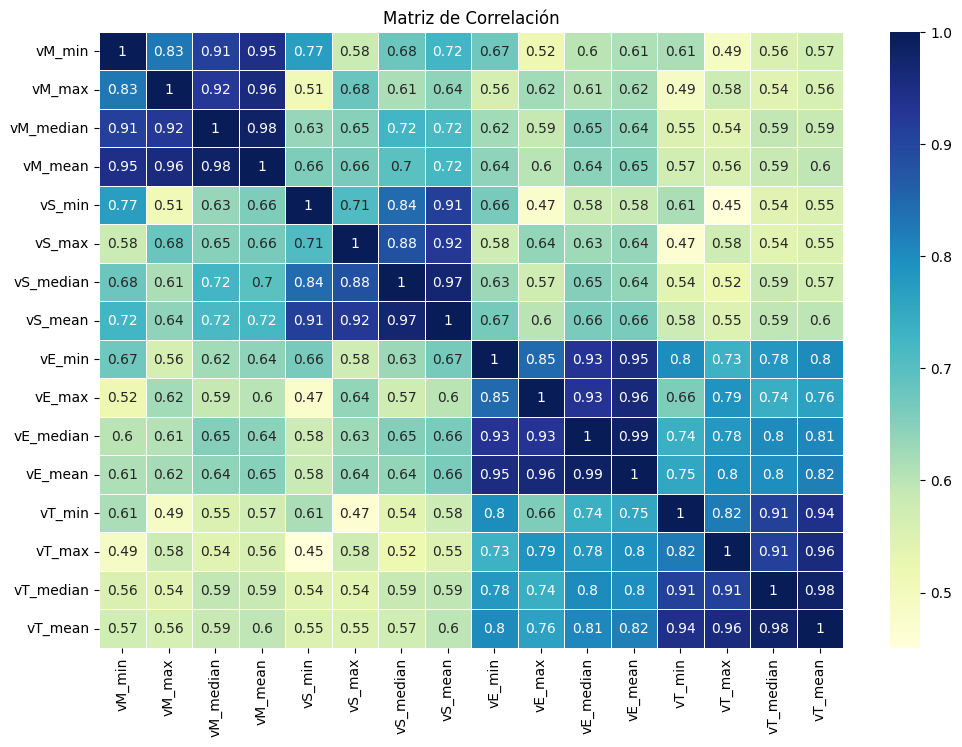

In [ ]:
X = filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean']] #variables predictoras
y = filtered_data['target']  #variable objetivo

#matriz de correlación entre las variables predictoras
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#parejas de variables altamente correlacionadas
highly_correlated_vars = set()  # Conjunto para almacenar variables altamente correlacionadas

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:  # Se va justando el umbrallo cual se concluye este humbral
            colname = correlation_matrix.columns[i]
            highly_correlated_vars.add(colname)

In [ ]:
highly_correlated_vars

{'vE_mean',
 'vE_median',
 'vM_mean',
 'vM_median',
 'vS_mean',
 'vS_median',
 'vT_mean',
 'vT_median'}

In [ ]:
X.columns

Index(['vM_min', 'vM_max', 'vM_median', 'vM_mean', 'vS_min', 'vS_max',
       'vS_median', 'vS_mean', 'vE_min', 'vE_max', 'vE_median', 'vE_mean',
       'vT_min', 'vT_max', 'vT_median', 'vT_mean'],
      dtype='object')

dataset dataf tiene variables predictoras que no presentan multicolinealidad

In [ ]:
X

vM_min     vM_max  vM_median    vM_mean       vS_min       vS_max  \
0      6.419286   9.200968   8.959412   8.193222   950.500000  1088.000000   
1      8.632308   9.747692   8.956500   9.112167  1103.325000  1269.346154   
2      3.588193   5.203151   5.105300   4.632214   835.759036  1179.671233   
3     11.330526  12.562105  12.245833  12.046155  1632.263158  1976.105263   
4      5.468438   8.757451   8.227209   7.484366  1289.390625  1691.901961   
...         ...        ...        ...        ...          ...          ...   
2910   0.000000   0.520000   0.000000   0.173333     0.000000   277.000000   
2911   0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
2912   0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
2913   0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
2914   0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   

        vS_median      vS_mean    vE_min    vE_max  vE_median   vE_mean  \
0     1073.500000  1037.333333  1.910714  2.250000   2.080645  2.080453   
1     1132.038462  1168.236538  2.525000  2.903846   2.692308  2.707051   
2     1057.150000  1024.193423  0.156627  0.198630   0.180000  0.178419   
3     1685.916667  1764.761696  2.657895  3.763158   3.312500  3.244518   
4     1627.767442  1536.353343  1.328125  2.383721   1.950980  1.887609   
...           ...          ...       ...       ...        ...       ...   
2910     0.000000    92.333333  0.000000  2.200000   0.000000  0.733333   
2911     0.000000     0.000000  0.000000  0.000000   0.000000  0.000000   
2912     0.000000     0.000000  0.000000  0.000000   0.000000  0.000000   
2913     0.000000     0.000000  0.000000  0.000000   0.000000  0.000000   
2914     0.000000     0.000000  0.000000  0.000000   0.000000  0.000000   

        vT_min    vT_max  vT_median   vT_mean  
0     4.014643  4.581176   4.140323  4.245381  
1     3.893462  4.541923   4.364750  4.266712  
2     1.359300  2.069589   1.705783  1.711557  
3     3.956667  5.006842   4.065789  4.343099  
4     2.326563  3.481163   3.282353  3.030026  
...        ...       ...        ...       ...  
2910  0.000000  0.000000   0.000000  0.000000  
2911  0.000000  0.000000   0.000000  0.000000  
2912  0.000000  0.000000   0.000000  0.000000  
2913  0.000000  0.000000   0.000000  0.000000  
2914  0.000000  0.000000   0.000000  0.000000  

[2537 rows x 16 columns]

In [ ]:
#eliminacion de variables altamente correlacionadas
X = X.drop(columns=highly_correlated_vars)

In [ ]:
# constante al conjunto de datos
X = sm.add_constant(X)

In [ ]:
X.columns

Index(['const', 'vM_min', 'vM_max', 'vS_min', 'vS_max', 'vE_min', 'vE_max',
       'vT_min', 'vT_max'],
      dtype='object')

In [ ]:
#VIF para las variables restantes
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

Variable        VIF
0    const  13.367680
1   vM_min  13.653675
2   vM_max  10.408796
3   vS_min   7.680008
4   vS_max   5.288918
5   vE_min   8.403510
6   vE_max   7.213631
7   vT_min   6.291342
8   vT_max   6.228927

In [ ]:
highly_correlated_vars

{'vE_mean',
 'vE_median',
 'vM_mean',
 'vM_median',
 'vS_mean',
 'vS_median',
 'vT_mean',
 'vT_median'}

In [ ]:
X.columns

Index(['const', 'vM_min', 'vM_max', 'vS_min', 'vS_max', 'vE_min', 'vE_max',
       'vT_min', 'vT_max'],
      dtype='object')

In [ ]:
filtered_data

Taxi_ID     target     vM_min     vM_max  vM_median    vM_mean  \
0           0  19.499545   6.419286   9.200968   8.959412   8.193222   
1           1  25.860667   8.632308   9.747692   8.956500   9.112167   
2           2  20.750702   3.588193   5.203151   5.105300   4.632214   
3           3  28.750000  11.330526  12.562105  12.245833  12.046155   
4           4  20.127551   5.468438   8.757451   8.227209   7.484366   
...       ...        ...        ...        ...        ...        ...   
2910     3222  39.105333   0.000000   0.520000   0.000000   0.173333   
2911     3224  23.775588   0.000000   0.000000   0.000000   0.000000   
2912     3225   8.250000   0.000000   0.000000   0.000000   0.000000   
2913     3233   4.250000   0.000000   0.000000   0.000000   0.000000   
2914     3234  30.250000   0.000000   0.000000   0.000000   0.000000   

           vS_min       vS_max    vS_median      vS_mean    vE_min    vE_max  \
0      950.500000  1088.000000  1073.500000  1037.333333  1.910714  2.250000   
1     1103.325000  1269.346154  1132.038462  1168.236538  2.525000  2.903846   
2      835.759036  1179.671233  1057.150000  1024.193423  0.156627  0.198630   
3     1632.263158  1976.105263  1685.916667  1764.761696  2.657895  3.763158   
4     1289.390625  1691.901961  1627.767442  1536.353343  1.328125  2.383721   
...           ...          ...          ...          ...       ...       ...   
2910     0.000000   277.000000     0.000000    92.333333  0.000000  2.200000   
2911     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2912     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2913     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   
2914     0.000000     0.000000     0.000000     0.000000  0.000000  0.000000   

      vE_median   vE_mean    vT_min    vT_max  vT_median   vT_mean  
0      2.080645  2.080453  4.014643  4.581176   4.140323  4.245381  
1      2.692308  2.707051  3.893462  4.541923   4.364750  4.266712  
2      0.180000  0.178419  1.359300  2.069589   1.705783  1.711557  
3      3.312500  3.244518  3.956667  5.006842   4.065789  4.343099  
4      1.950980  1.887609  2.326563  3.481163   3.282353  3.030026  
...         ...       ...       ...       ...        ...       ...  
2910   0.000000  0.733333  0.000000  0.000000   0.000000  0.000000  
2911   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2912   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2913   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  
2914   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  

[2537 rows x 18 columns]

#Modelos

## Regresión lineal

In [ ]:
# Divicion los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = filtered_data[['vM_min', 'vM_max', 'vS_min', 'vS_max', 'vE_min', 'vE_max', 'vT_min', 'vT_max']]
y = filtered_data['target']
## Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()

Con el fin de evitar una diferencia significativa entre los datos de nuestras variables, decidimos utilizar MinMaxScaler para estandarizar.

In [ ]:
scaler = StandardScaler()

#scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred_test)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')
# modelo no tiene un sobreajuste evidente ni un subajuste extremo,
#ya que los errores y los R2 son bastante similares entre los conjuntos
# de prueba y entrenamiento. Sin embargo, el rendimiento del modelo podría mejorarse,
#ya que los valores de R2 son relativamente bajos.

RMSE test: 6.15467571376142
RMSE train: 6.120119570163833
R2 Score test: 0.48340656530661974
R2 Score train 0.484461097529137


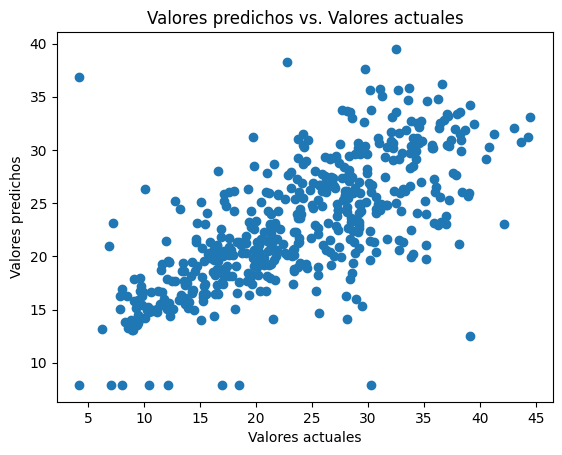

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales')
plt.show()


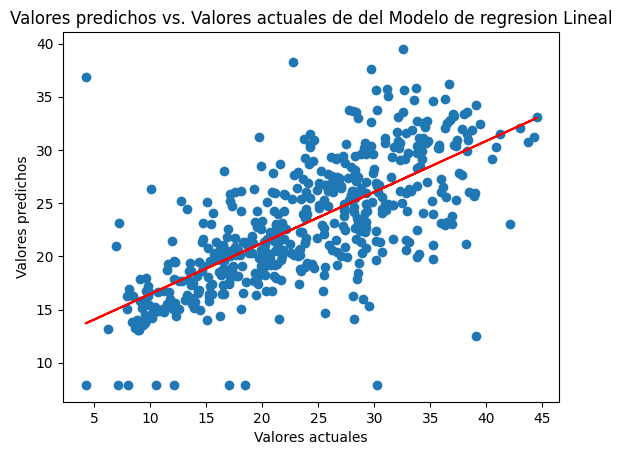

In [ ]:
# línea de regresión
z = np.polyfit(y_test.values.flatten(), y_pred_test.flatten(), 1)
p = np.poly1d(z)

plt.scatter(y_test, y_pred_test)
plt.plot(y_test, p(y_test), color='red')  # Línea de regresión
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales de del Modelo de regresion Lineal')
plt.show()

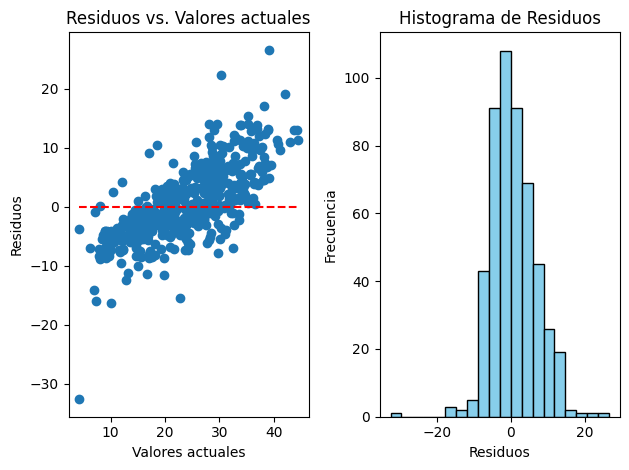

In [ ]:
residuos = y_test - y_pred_test

plt.subplot(121)
plt.scatter(y_test, residuos)
plt.hlines(0, y_test.min(), y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores actuales')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores actuales')

plt.subplot(122)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

plt.tight_layout()
plt.show()
#"error" del modelo en predicciones


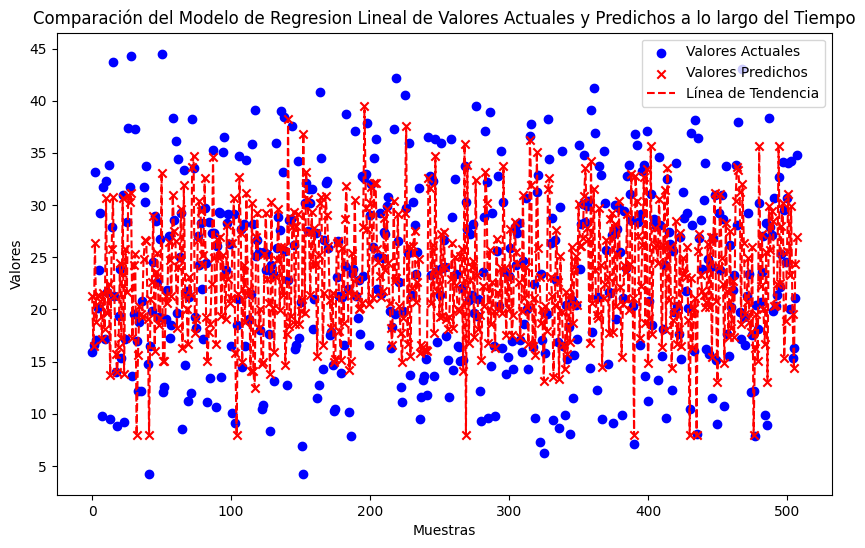

In [ ]:
import matplotlib.pyplot as plt

# Grafica de los valores actuales y los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Actuales', color='b')
plt.scatter(range(len(y_test)), y_pred_test, label='Valores Predichos', color='r', marker='x')

#línea de tendencia para los valores predichos
plt.plot(range(len(y_test)), y_pred_test, linestyle='--', color='r', label='Línea de Tendencia')

plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Comparación del Modelo de Regresion Lineal de Valores Actuales y Predichos a lo largo del Tiempo')
plt.legend()
plt.show()

#línea de tendencia representa la relación matemática entre las variables independientes y la variable dependiente. En otras palabras, es la relación que el modelo ha aprendido a partir de los datos de entrenamiento.
#Si los puntos de datos predichos están cerca de la línea de tendencia, indica que el modelo está haciendo buenas predicciones,  si están dispersos o lejos de la línea, puede indicar que el modelo no se ajusta bien a los datos de prueba.

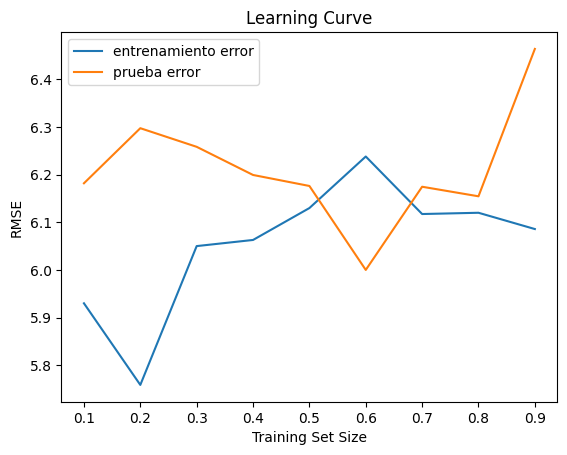

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir una función para calcular el error de entrenamiento y prueba en diferentes tamaños de conjunto de entrenamiento
def plot_learning_curve(model, X, y):
    train_errors, test_errors = [], []
    train_sizes = np.arange(0.1, 1.0, 0.1)

    for size in train_sizes:
        X_train, X_partial, y_train, y_partial = train_test_split(X, y, test_size=1-size, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_partial)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_partial, y_test_pred))

    plt.plot(train_sizes, np.sqrt(train_errors), label="entrenamiento error")
    plt.plot(train_sizes, np.sqrt(test_errors), label="prueba error")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve")
    plt.show()

# Llamar a la función con tu modelo y datos
plot_learning_curve(model, X, y)


## Rndom Forest

In [ ]:
#final_data2 = final_data
final_data2=filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean','target']]


In [ ]:
features = ['vM_min', 'vM_max', 'vS_min', 'vS_max', 'vE_min', 'vE_max', 'vT_min', 'vT_max']
target = ['target']

In [ ]:
X = final_data2[features]
y = final_data2[target]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
 #Crear y entrenar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
            n_estimators = 300,                   #número de árboles incluidos en el modelo.
            criterion    = 'squared_error',       #métrica para dividir
            max_depth    = 10,
            min_samples_split=10,
            min_samples_leaf= 4 ,                 #profundidad máxima que pueden alcanzar los árboles.
            max_features = 'auto',                #número de predictores considerados a en cada división
            oob_score    = False,
            n_jobs       = -1,                    #número de cores empleados para el entrenamiento, con -1 se usan todos los disponibles
            random_state = 123                    #semilla para que los resultados sean reproducibles.
         )


rf_model.fit(X_train, y_train)

<ipython-input-239-fbf8a480441d>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=300, n_jobs=-1,
                      random_state=123)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obteniendo el mejor modelo con la mejor combinación de hiperparámetros
best_rf_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWa

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')
# mejor capacidad de predicción y ajuste del modelo a los datos
# Además tiene valores más altos de R2 Score en ambos conjuntos, lo que sugiere que el modelo Random Forest explica mejor la variabilidad en los datos.
#sin embargoLa diferencia significativa entre el RMSE en el conjunto de entrenamiento y el to y el RMSE en el conjunto de prueba es un indicio de que
# el modelo puede estar sobreajustado, tambien la diferencia entre en r2 en el conjunto de prueba es mucho mas bajo que el de entrenamiento por lo que tambien da inicios a un sobre ajuste

RMSE test: 5.365734076249561
RMSE train: 3.9593662094124253
R2 Score test: 0.6073579369201302
R2 Score train 0.7842290503199526


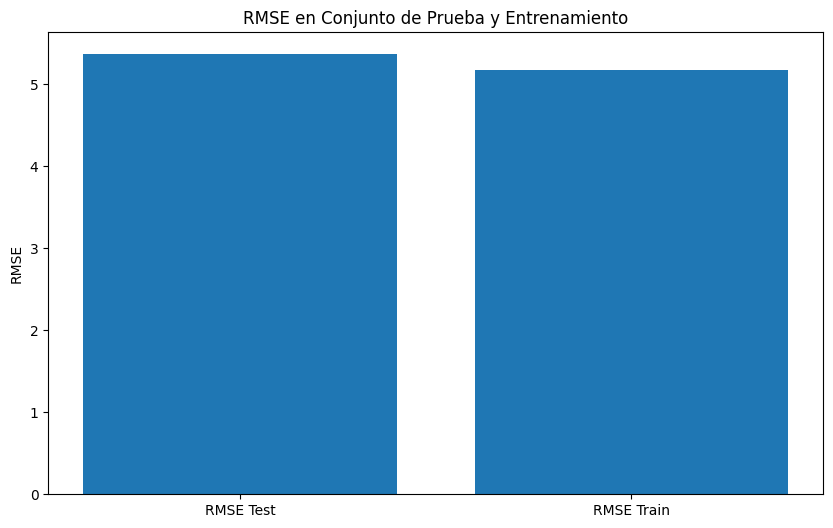

In [ ]:
#  RMSE en el conjunto de prueba y entrenamiento
plt.figure(figsize=(10, 6))
plt.bar(['RMSE Test', 'RMSE Train'], [rmse_test, rmse_train])
plt.ylabel('RMSE')
plt.title('RMSE en Conjunto de Prueba y Entrenamiento')
plt.show()

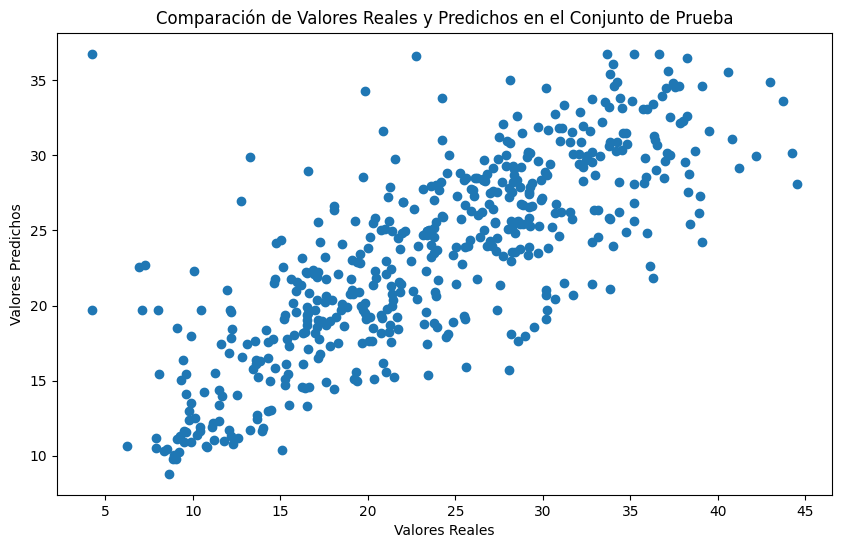

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales y Predichos en el Conjunto de Prueba')
plt.show()

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo individual
individual_model = RandomForestRegressor(n_estimators=100, random_state=42)
individual_model.fit(X_train, y_train)

# Hacer predicciones con el modelo individual
y_pred_individual = individual_model.predict(X_test)
y_pred_individual_train = individual_model.predict(X_train)

# Entrenamiento del modelo de ensamblado (Random Forest para hacer comparacion)
ensemble_model = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100), n_estimators=10, random_state=42)
ensemble_model.fit(X_train, y_train)

# Hacer predicciones con el modelo de ensamblado
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_ensemble_train = ensemble_model.predict(X_train)

# Calcular métricas de rendimiento para el modelo individual y el ensamblado en prueba
rmse_individual = np.sqrt(mean_squared_error(y_test, y_pred_individual))
r2_individual = r2_score(y_test, y_pred_individual)

rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Calculo de métricas de rendimiento para el modelo individual y el ensamblado en entrenamiento
rmse_individual_train = np.sqrt(mean_squared_error(y_train, y_pred_individual_train))
r2_individual_train = r2_score(y_train, y_pred_individual_train)

rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_ensemble_train))
r2_ensemble_train = r2_score(y_train, y_pred_ensemble_train)

print("Rendimiento del modelo individual en prueba:")
print(f"RMSE: {rmse_individual}")
print(f"R^2 Score: {r2_individual}")

print("Rendimiento del modelo de ensamblado (Random Forest) en prueba:")
print(f"RMSE: {rmse_ensemble}")
print(f"R^2 Score: {r2_ensemble}")

print("Rendimiento del modelo individual en entrenamiento:")
print(f"RMSE: {rmse_individual_train}")
print(f"R^2 Score: {r2_individual_train}")

print("Rendimiento del modelo de ensamblado (Random Forest) en entrenamiento:")
print(f"RMSE: {rmse_ensemble_train}")
print(f"R^2 Score: {r2_ensemble_train}")


In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales')
plt.show()

In [ ]:
# línea de regresión
z = np.polyfit(y_test.values.flatten(), y_pred.flatten(), 1)
p = np.poly1d(z)

plt.scatter(y_test, y_pred)
plt.plot(y_test, p(y_test), color='red')  # Línea de regresión
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales del Modelo de Random Forest')
plt.show()

In [ ]:
# Graficar las predicciones del modelo individual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_individual, label="Modelo Individual", alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones del Modelo Individual")
plt.legend()
plt.grid()

# Graficar las predicciones del modelo de ensamble
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, label="Modelo de Ensamble", alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones del Modelo de Ensamble")

plt.legend()
plt.grid()

plt.show()

finalmente las 3 formas que se hicieron en el modelo Random Forest, se observo, en términos de rendimiento en el conjunto de prueba, el enfoque con mejores hiperparámetros es la mejor opción, seguido por el modelo de ensamblado. El modelo individual sin ajuste de hiperparámetros queda en el último lugar en este caso, aun asi se tiene que buscar otros modelos que me den mejores resultados.



**Rendimiento del modelo individual**:
* RMSE (Entrenamiento): 2.359334879310653
* R^2 (Entrenamiento): 0.923383765321164

* RMSE (prueba): 5.440386576978602
* R^2(prueba): 0.5963564166101403

**Rendimeinto con mejores hiperparametros con grid_search**
* RMSE train: 3.9593662094124253
* R2 Score train 0.7842290503199526

* RMSE test: 5.365734076249561
* R2 Score test: 0.6073579369201302


**Rendimiento del modelo de ensamblado**
* RMSE (Entrenamiento): 3.484020194670122
* R^2 (Entrenamiento): 0.8329282753740601

* RMSE (prueba):5.385968212120499
* R^2(prueba):0.6043910538901232



##K-Nearest Neighbors (KNN)

con el modelo de KNN no vimos mejoras asi que proseguimos con Modelos de redes neuronales

In [ ]:
#final_data2 = final_data
final_data3=filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean','target']]


In [ ]:
features = ['vM_min', 'vM_max', 'vS_min', 'vS_max', 'vE_min', 'vE_max', 'vT_min', 'vT_max']
target = ['target']

In [ ]:
X = final_data3[features]
y = final_data3[target]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#divicon de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creacion del modelo
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el valor de "n_neighbors"

# entrenar el modelo
knn_model.fit(X_train, y_train)

# realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# calcular métricas de rendimiento
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# realizar predicciones en el conjunto de entrenamiento
y_pred_train = knn_model.predict(X_train)

# RMSE y R2 para el conjunto de entrenamiento
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE (Entrenamiento): {rmse_train}")
print(f"R^2 Score (Entrenamiento): {r2_train}")
print(f"RMSE (prueba): {rmse}")
print(f"R^2 Score (prueba): {r2}")

RMSE (Entrenamiento): 5.313065027805705
R^2 Score (Entrenamiento): 0.6114634396647458
RMSE (prueba): 6.687545372089026
R^2 Score (prueba): 0.39008120686909986


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#optimización de hiperparámetros con validación cruzada
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]}
knn = KNeighborsRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Validación cruzada con 5 divisiones
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

#obtencion del mejor modelo después de la optimización
best_knn_model = grid_search.best_estimator_

#Selección de características
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# entrenar el modelo final en las características seleccionadas
best_knn_model.fit(X_train_selected, y_train)

# realizar predicciones en el conjunto de prueba
y_pred = best_knn_model.predict(X_test_selected)

#métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Prueba): {rmse}")
print(f"R^2 Score (Prueba): {r2}")


RMSE (Prueba): 5.715642206722225
R^2 Score (Prueba): 0.5544785674216274


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


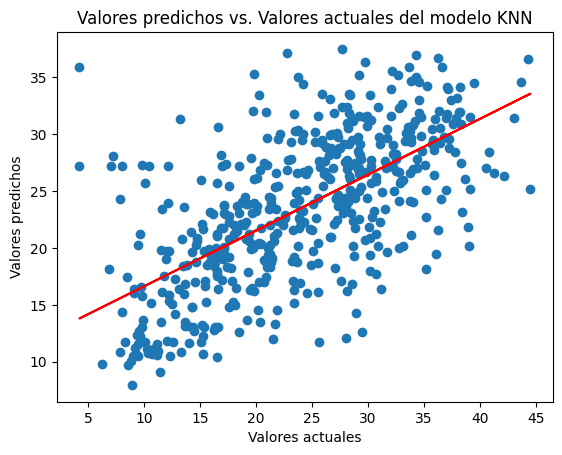

In [ ]:

z = np.polyfit(y_test.values.flatten(), y_pred.flatten(), 1)
p = np.poly1d(z)

plt.scatter(y_test, y_pred)
plt.plot(y_test, p(y_test), color='red')  # Línea de regresión
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales del modelo KNN')
plt.show()

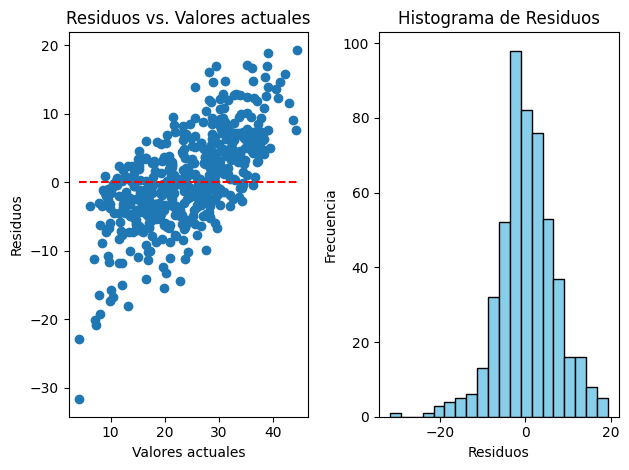

In [ ]:
residuos = y_test - y_pred

plt.subplot(121)
plt.scatter(y_test, residuos)
plt.hlines(0, y_test.min(), y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores actuales')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores actuales')

plt.subplot(122)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

plt.tight_layout()
plt.show()
#"error" del modelo en predicciones

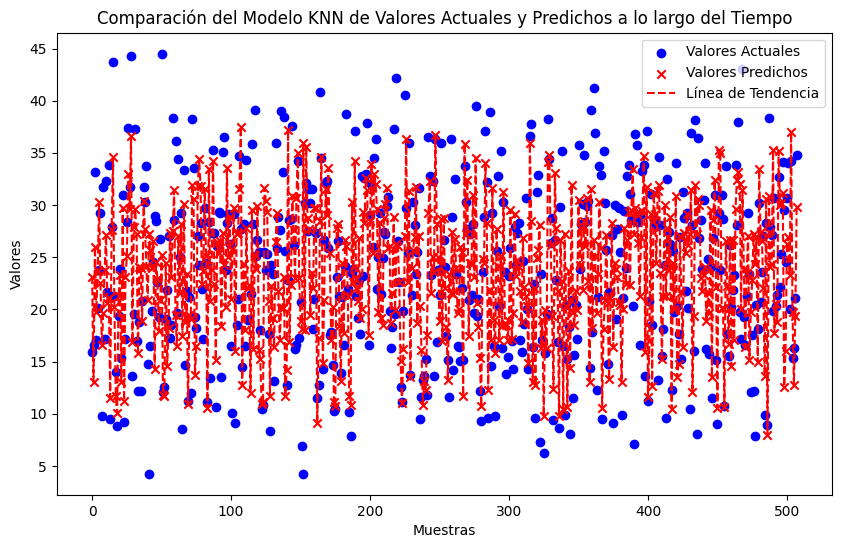

In [ ]:
import matplotlib.pyplot as plt

# Grafica de los valores actuales y los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Actuales', color='b')
plt.scatter(range(len(y_test)), y_pred, label='Valores Predichos', color='r', marker='x')

#línea de tendencia para los valores predichos
plt.plot(range(len(y_test)), y_pred, linestyle='--', color='r', label='Línea de Tendencia')

plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Comparación del Modelo KNN de Valores Actuales y Predichos a lo largo del Tiempo')
plt.legend()
plt.show()

#línea de tendencia representa la relación matemática entre las variables independientes y la variable dependiente. En otras palabras, es la relación que el modelo ha aprendido a partir de los datos de entrenamiento.
#Si los puntos de datos predichos están cerca de la línea de tendencia, indica que el modelo está haciendo buenas predicciones,  si están dispersos o lejos de la línea, puede indicar que el modelo no se ajusta bien a los datos de prueba.

## Red Neuronal base

In [ ]:
from tensorflow import keras

In [ ]:
#final_data2 = final_data
final_data4=filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean','target']]

In [ ]:
features = ['vM_min', 'vM_max', 'vS_min', 'vS_max', 'vS_median', 'vE_min', 'vE_max', 'vT_min', 'vT_max']
target = ['target']

In [ ]:
X = final_data4[features]
y = final_data4[target]

In [ ]:
#Divicion de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para la regresión
])

# eompilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')













In [ ]:
%%time
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
64/64 [==============================] - 0s 6ms/step - loss: 24.8243 - val_loss: 33.7724
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 24.7311 - val_loss: 33.3577
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 24.6219 - val_loss: 33.1678
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 24.4347 - val_loss: 33.7331
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 24.3409 - val_loss: 32.8929
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 24.1835 - val_loss: 32.8837
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 24.1020 - val_loss: 32.9004
Epoch 8/200
64/64 [==============================] - 0s 4ms/step - loss: 24.5773 - val_loss: 33.1916
Epoch 9/200
64/64 [==============================] - 0s 3ms/step - loss: 24.2687 - val_loss: 33.0561
Epoch 10/200
64/64 [==============================] - 0s 3ms/step - loss: 24.3134 - val_los

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


16/16 [==============================] - 0s 2ms/step
RMSE: 5.595096343956512
R^2 Score: 0.5730729518512094


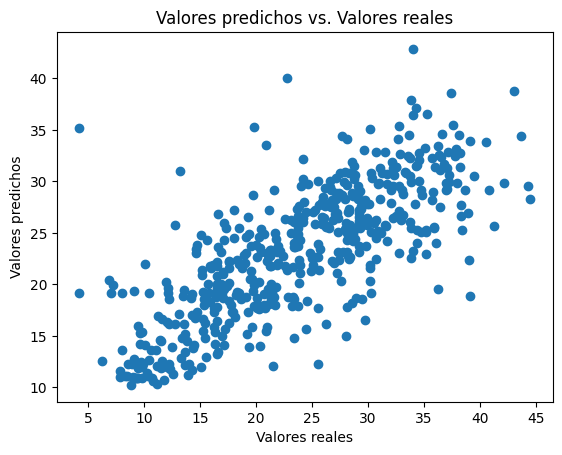

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores reales')
plt.show()

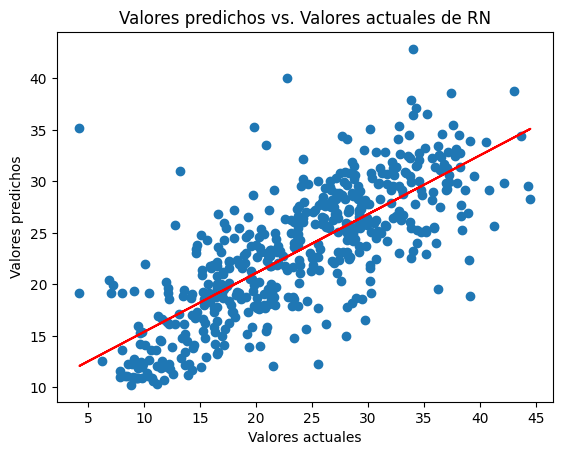

In [ ]:


#se agraga una línea de regresión
z = np.polyfit(y_test.values.flatten(), y_pred.flatten(), 1)
p = np.poly1d(z)

plt.scatter(y_test, y_pred)
plt.plot(y_test, p(y_test), color='red')  # Línea de regresión
plt.xlabel('Valores actuales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs. Valores actuales de RN')
plt.show()


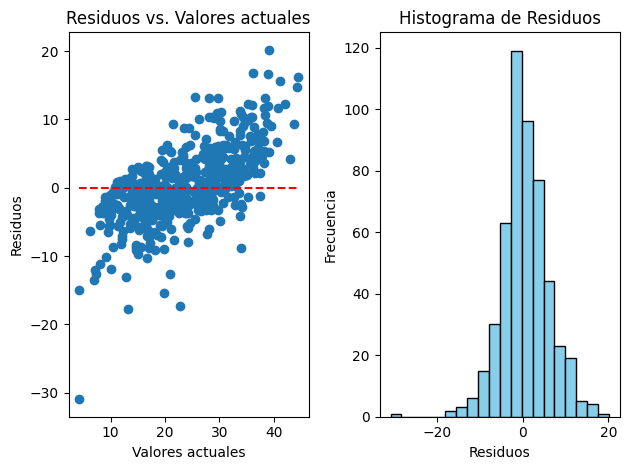

In [ ]:
residuos = y_test - y_pred

plt.subplot(121)
plt.scatter(y_test, residuos)
plt.hlines(0, y_test.min(), y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores actuales')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores actuales')

plt.subplot(122)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

plt.tight_layout()
plt.show()
#"error" del modelo en predicciones

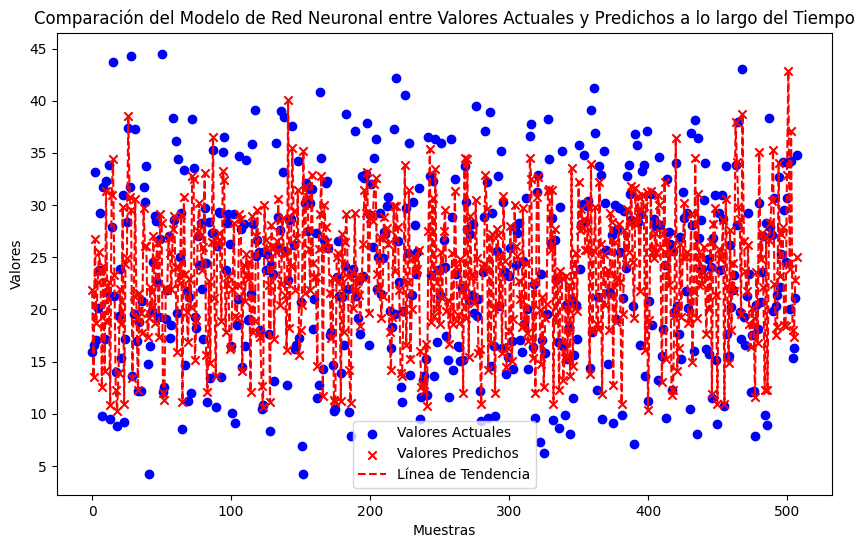

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Actuales', color='b')
plt.scatter(range(len(y_test)), y_pred, label='Valores Predichos', color='r', marker='x')

#línea de tendencia para los valores predichos
plt.plot(range(len(y_test)), y_pred, linestyle='--', color='r', label='Línea de Tendencia')

plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Comparación del Modelo de Red Neuronal entre Valores Actuales y Predichos a lo largo del Tiempo')
plt.legend()
plt.show()

#línea de tendencia representa la relación matemática entre las variables independientes y la variable dependiente. En otras palabras, es la relación que el modelo ha aprendido a partir de los datos de entrenamiento.
#Si los puntos de datos predichos están cerca de la línea de tendencia, indica que el modelo está haciendo buenas predicciones,  si están dispersos o lejos de la línea, puede indicar que el modelo no se ajusta bien a los datos de prueba.

### Evaluacion

In [ ]:
keys = history.history.keys()

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


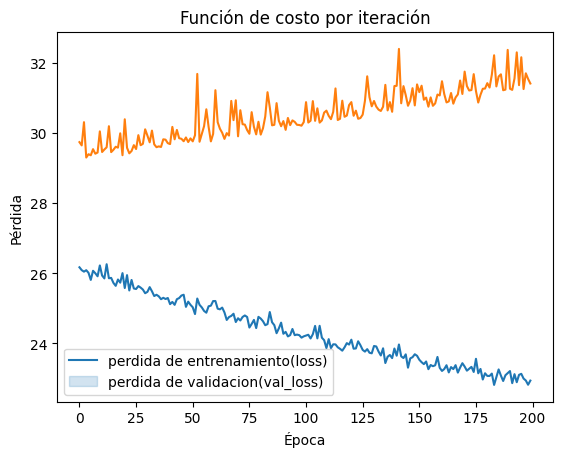

In [ ]:
#curvas de pérdida
sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(val_loss)), y=val_loss)
plt.legend(['perdida de entrenamiento(loss)', 'perdida de validacion(val_loss)'])
plt.title("Función de costo por iteración")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.show()







In [ ]:
!pip install keras-tuner


### Analisis de resultados

In [ ]:
y_test

target
1812  15.902750
200   16.625000
518   33.123913
2691  17.078696
2426  20.130000
...         ...
1193  34.250000
898   15.363538
2322  16.268125
91    21.052000
485   34.750000

[508 rows x 1 columns]

In [ ]:
y_test = np.array(y_test).ravel()  # se convierte a un array unidimensional
y_pred = np.array(y_pred).ravel()

#dataFrame para combinar los valores reales y las predicciones
df = pd.DataFrame({'Valor_Real': y_test, 'Valor_Predicho': y_pred})

#se guarda este dataFrame como un archivo CSV
df.to_csv('dataset_predicciones.csv', index=False)

In [ ]:
df

Valor_Real  Valor_Predicho
0     15.902750       21.815344
1     16.625000       13.471357
2     33.123913       26.717119
3     17.078696       18.660782
4     20.130000       22.612024
..          ...             ...
503   34.250000       37.067944
504   15.363538       18.015043
505   16.268125       17.306320
506   21.052000       22.822683
507   34.750000       25.066450

[508 rows x 2 columns]

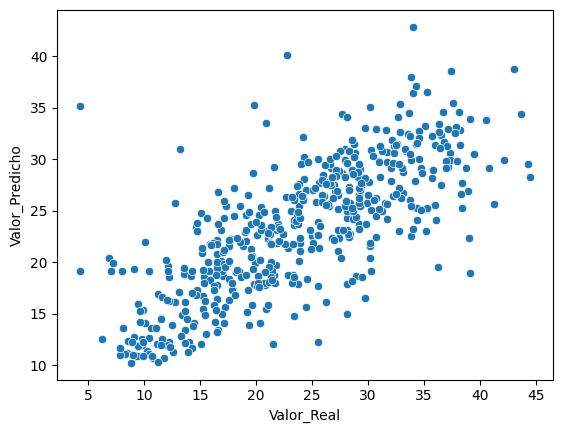

In [ ]:

sns.scatterplot(x='Valor_Real', y='Valor_Predicho', data=df);

##Modelo 2 de RN

Este segundo modelo se hizo algunas mejorar respecto al modelo prueba como por ejemplo usar Kerastuner para realizar una búsqueda de hiperparámetros de forma automática esto significa que ajusta automáticamente los valores de los hiperparámetros, como la cantidad de unidades en las capas ocultas y la función de activación, para encontrar la combinación que minimice la pérdida en el conjunto de validación, esta forma podria ser mejor que hacerlo de forma manual como el modelo prueba ya que es mas más eficiente y menos propenso a errores, pero claramnete se tiene que ir ajustando deacuerdo a las necesidades que queremos llegar y los resultados que me de al fianl el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#función para crear un modelo con hiperparámetros ajustables
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=64, step=16), activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Configuracion del optimizador de hiperparámetros
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  #se puede ir ajustando
    directory='keras-tuner',
    project_name='your_project_name')

# búsqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

# se obtienen los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# se entrena el mejor modelo en el conjunto de entrenamiento
model = build_model(best_hps)
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# se realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mejores hiperparámetros: {best_hps.get_config()}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


Trial 10 Complete [00h 00m 44s]
val_loss: 34.578338623046875

Best val_loss So Far: 29.287431716918945
Total elapsed time: 00h 06m 12s
24/24 [==============================] - 0s 2ms/step
Mejores hiperparámetros: {'space': [{'class_name': 'Int', 'config': {'name': 'units', 'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'activation', 'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}}], 'values': {'units': 48, 'activation': 'relu'}}
RMSE: 6.1452025155145735
R^2 Score: 0.5066431371420635


## Modelo 3 de NR

En este modelo se vulve a retomar la busqueda de hiperparamtros de forma automatica pero haciendo uso de la función GridSearchCVde scikit-learn para realizar la búsqueda en lugar de Kerastuner. Esto permite ajustar automáticamente los valores de los hiperparámetros dentro de rangos específicos pero haciendo uso de scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# crear el modelo
def create_model(units=64, activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# se define una clase personalizada para el modelo Keras
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, units=64, activation='relu', dropout_rate=0.2, epochs=100, batch_size=32):
        self.units = units
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        model = create_model(
            units=self.units,
            activation=self.activation,
            dropout_rate=self.dropout_rate
        )
        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

# se define el espacio de búsqueda de hiperparámetros
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4]
}

# se realiza la búsqueda de hiperparámetros con GridSearchCV de scikit-learn
model = KerasRegressorWrapper()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtiencion de  los mejores hiperparámetros
best_params = grid_search.best_params_

#  mejor modelo en el conjunto de entrenamiento
best_model = KerasRegressorWrapper(**best_params)
best_model.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# se calcula las métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mejores hiperparámetros: {best_params}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


Se truncaron las últimas líneas 5000 del resultado de transmisión.
41/41 [==============================] - 0s 5ms/step - loss: 48.0159 - val_loss: 40.9453
Epoch 15/100
41/41 [==============================] - 0s 5ms/step - loss: 43.5942 - val_loss: 37.6160
Epoch 16/100
41/41 [==============================] - 0s 5ms/step - loss: 41.0521 - val_loss: 36.0625
Epoch 17/100
41/41 [==============================] - 0s 6ms/step - loss: 39.9574 - val_loss: 35.3364
Epoch 18/100
41/41 [==============================] - 0s 5ms/step - loss: 39.5154 - val_loss: 35.2520
Epoch 19/100
41/41 [==============================] - 0s 5ms/step - loss: 39.2995 - val_loss: 34.9730
Epoch 20/100
41/41 [==============================] - 0s 4ms/step - loss: 39.1142 - val_loss: 34.8301
Epoch 21/100
41/41 [==============================] - 0s 5ms/step - loss: 38.9901 - val_loss: 34.6935
Epoch 22/100
41/41 [==============================] - 0s 4ms/step - loss: 38.9009 - val_loss: 34.6261
Epoch 23/100
41/41 [========

In [ ]:
pip install tensorflow scikit-learn


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.6 MB/s eta 0:00:00


## Modelo 4 de RN

 se vulve a hacer uso de la biblioteca Keras Tuner para realizar una búsqueda automatizada de hiperparámetros, similar al segundo modelo. Esto permite explorar diferentes combinaciones de hiperparámetros de manera eficiente pero ahora se podra configurar la estructura de la red neuronal, incluido el número de capas ocultas y sus tamaños, utilizando hiperparámetros ajustables.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


# estandarizacion de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# función que crear el modelo
def build_model(hp):
    model = Sequential()
    # se añaden más capas ocultas para aumentar la complejidad del modelo
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dense(1))

    # Compilar el modelo con un optimizador y función de pérdida
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# se inicializa el sintonizador
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # numero de combinaciones de hiperparámetros a probar
    directory='my_dir2',  # directorio donde se almacenan los resultados
    project_name='my_project2'  # nombre del proyecto
)

# se realiza la busqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# obtencion del mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# realiza predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# se calcula las métricas de rendimiento
rmse_test = tf.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

rmse_train = tf.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"Mejor modelo: {best_model.summary()}")
print(f"RMSE (Prueba): {rmse_test}")
print(f"R^2 Score (Prueba): {r2_test}")
print(f"RMSE (Entrenamiento): {rmse_train}")
print(f"R^2 Score (Entrenamiento): {r2_train}")


Trial 8 Complete [00h 00m 42s]
val_loss: 29.17322540283203

Best val_loss So Far: 29.17322540283203
Total elapsed time: 00h 04m 55s
64/64 [==============================] - 0s 3ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1120      
                                                                 
 dense_1 (Dense)             (None, 112)               12656     
                                                                 
 dense_2 (Dense)             (None, 1)                 113       
                                                                 
Total params: 13889 (54.25 KB)
Trainable params: 13889 (54.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Mejor modelo: None
RMSE (Prueba): 5.401224557720936
R^2 Score (Prueba): 0.6021466682047512
RMSE (En

## Modelo 5 de RN

Con este modelo mas se intento hacer mas complejo y observo un mayor sobre ajuste debido a que entre mas complejo podria llevarnos al camino del sobre ajuste asi que se implemento un dropout, la opcion de aumentar mas datos podria ser el camino sin embargo se pidio trabajar solo con estos rangos de fechas, entonces por ultimo se intentaro hacer una regularizacion mas fuerte y optimizacion de hiperparametros mas exhaustiva y asi sacar conclusiones de estos modelos de RN.

Finalmente se llego a esta conclusion de los modelos de redes neuronales: El modelo de la opción 5 tiene el mejor desempeño en el conjunto de prueba, ya que tiene el RMSE más bajo y el R^2 Score más alto. También tiene un buen rendimiento en el conjunto de entrenamiento, lo que sugiere que generaliza bien. En términos de R^2 Score en el conjunto de prueba, la opción 5 es la mejor con un valor de aproximadamente 0.602

In [ ]:
#final_data2 = final_data
final_data4=filtered_data[['vM_min', 'vM_max', 'vM_median', 'vM_mean',
       'vS_min', 'vS_max', 'vS_median', 'vS_mean', 'vE_min', 'vE_max',
       'vE_median', 'vE_mean', 'vT_min', 'vT_max', 'vT_median', 'vT_mean','target']]

In [ ]:
features = ['vM_min', 'vM_max', 'vS_min', 'vS_max', 'vS_median', 'vE_min', 'vE_max', 'vT_min', 'vT_max']
target = ['target']

In [ ]:
X = final_data4[features]
y = final_data4[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install keras-tuner

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#función para crear el modelo
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dense(1))

    # Compilacion del modelo con un optimizador y función de pérdida
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# se inicializa el sintonizador
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # numero de combinaciones de hiperparámetros a probar
    directory='my_dir3',
    project_name='my_project3'
)

# busqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# se obtiene el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# se realiza predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# se calcula las métricas de rendimiento
rmse_test = tf.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

rmse_train = tf.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"Mejor modelo: {best_model.summary()}")
print(f"RMSE (Prueba): {rmse_test}")
print(f"R^2 Score (Prueba): {r2_test}")
print(f"RMSE (Entrenamiento): {rmse_train}")
print(f"R^2 Score (Entrenamiento): {r2_train}")


Reloading Tuner from my_dir3/my_project3/tuner0.json
64/64 [==============================] - 0s 1ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17921 (70.00 KB)
Trainable params: 17921 (70.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Mejor modelo: None
RMSE (Prueba): 5.3952123401

In [ ]:
import pandas as pd

# se convierten las columnas de DataFrame en listas
y_test_list = y_test['target'].tolist()
y_pred_test_list = y_pred_test.flatten().tolist()

# se crea un nuevo DataFrame con las listas
results_test_df = pd.DataFrame({'Real': y_test_list, 'Predichos': y_pred_test_list})

y_train_list = y_train['target'].tolist()
y_pred_train_list = y_pred_train.flatten().tolist()

results_train_df = pd.DataFrame({'Real': y_train_list, 'Predichos': y_pred_train_list})


**métricas de rendimiento del modelo en ambos conjuntos: prueba y entrenamiento**

In [ ]:
results_train_df

Real  Predichos
0     12.767213  13.792150
1     27.971333  24.377434
2     17.744857  17.520006
3     15.043103  15.891008
4     21.273810  27.815992
...         ...        ...
2024  37.266667  31.326103
2025  17.425532  19.180136
2026  31.291667  25.866011
2027  25.317727  28.241369
2028  32.846154  33.104824

[2029 rows x 2 columns]

In [ ]:
results_test_df

Real  Predichos
0    15.902750  20.739628
1    16.625000  14.831349
2    33.123913  26.746220
3    17.078696  18.373943
4    20.130000  23.406792
..         ...        ...
503  34.250000  32.366020
504  15.363538  18.255909
505  16.268125  18.466967
506  21.052000  23.860970
507  34.750000  26.009481

[508 rows x 2 columns]

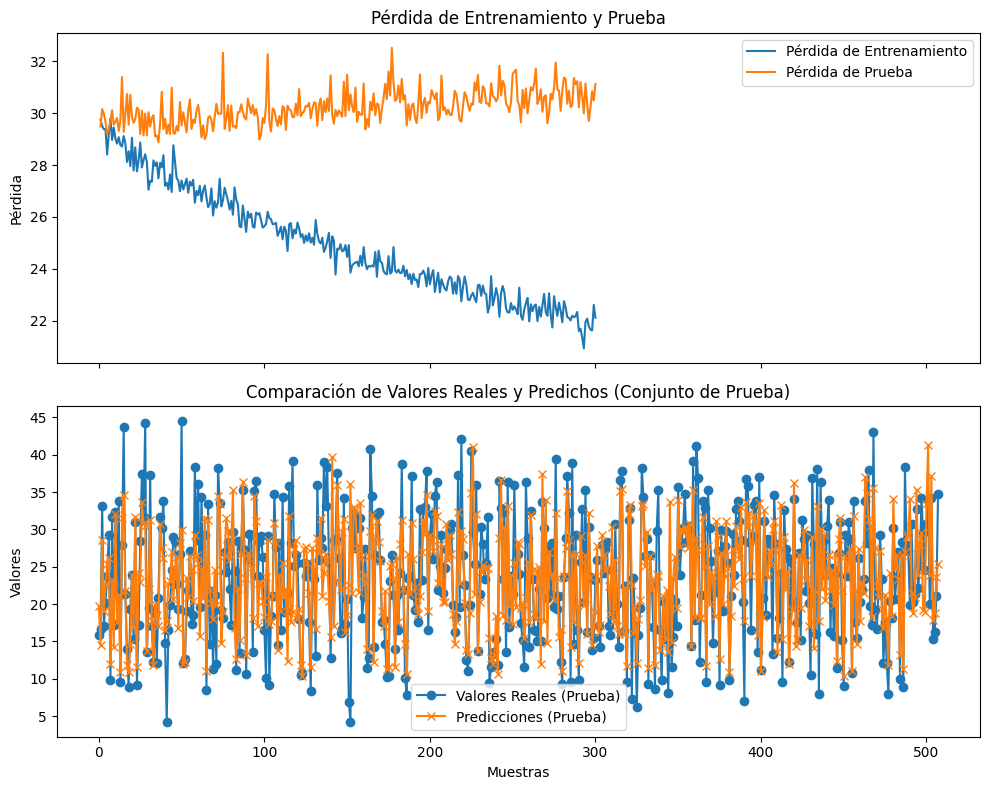

In [ ]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# función de pérdida durante el entrenamiento en el primer cuadrante
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, label='Pérdida de Entrenamiento')
ax1.plot(epochs, val_loss, label='Pérdida de Prueba')
ax1.set_ylabel('Pérdida')
ax1.set_title('Pérdida de Entrenamiento y Prueba')
ax1.legend()

#valores reales y predichos en el segundo cuadrante
ax2.plot(range(len(y_test)), y_test, label='Valores Reales (Prueba)', marker='o')
ax2.plot(range(len(y_pred_test)), y_pred_test, label='Predicciones (Prueba)', marker='x')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Valores')
ax2.set_title('Comparación de Valores Reales y Predichos (Conjunto de Prueba)')
ax2.legend()
plt.tight_layout()
plt.show()


## Conclusion

**Modelo de Random Forest(Rendimeinto con mejores hiperparametros con grid_search):**

RMSE de prueba: 5.365734076249561
R2 Score de prueba: 0.6073579369201302
RMSE de entrenamiento: 3.9593662094124253
R2 Score de entrenamiento: 0.7842290503199526

**Modelo 5 de RN**:

RMSE de prueba: 5.3952123401311205
R2 Score de prueba: 0.6030318932094747
RMSE de entrenamiento: 5.207796633835063
R2 Score de entrenamiento: 0.6267071587060571


Ambas opciones tienen valores de RMSE y R2 Score razonablemente buenos, lo que indica que los dos modelos pueden hacer buenas predicciones. Sin embargo, la opcion del modelo de Random Forest(Rendimeinto con mejores hiperparametros con grid_search) parece ser ligeramente mejor, ya que tiene un RMSE de prueba ligeramente menor y un R2 Score de prueba ligeramente mayor en comparación con el modelo 6 de RN. Además, el modelo de la opción 1 tiene un R2 Score de entrenamiento más alto, lo que sugiere que puede haber un poco menos de sobreajuste en ese modelo en comparación con el modelo de la opcion 2 de RN.

En resumen, wl model de Rnadom forest(Rendimeinto con mejores hiperparametros con grid_search) parece ser la mejor elección en función de los valores de RMSE y R2 Score.

Mejorar las predicciones en problemas va más allá de la arquitectura del modelo. hay algunas otras formas de mejorar las predicciones las cuales se podrian considerar en este problema:

* ingeniería de características, crear nuevas características a partir de las existentes

*  contar con más datos puede mejorar el rendimiento de los modelos

